In [123]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from collections import Counter
from textwrap import wrap, fill

from matplotlib import rc
rc('text', usetex=True)

In [2]:
df = pd.read_csv('2019_Departmental_Self-Assessment.csv', index_col=[1,0])
df.fillna("I don't know", inplace=True)
df.replace("I don't know.", "I don't know", inplace=True)
df.sort_index(inplace=True)
df

Recruiting members of underrepresented groups  \
What is your role in the department? Timestamp                                                               
Faculty                              1/19/2019 10:18:54                                       I don't know   
                                     1/19/2019 14:27:04  Emerging: Departmental website encourages wome...   
                                     1/20/2019 13:43:20  Transforming: Department hosts or participates...   
                                     1/23/2019 12:16:06  Transforming: Department hosts or participates...   
                                     1/23/2019 22:32:27  Developing: Department members attend conferen...   
                                     1/24/2019 16:26:16                                       I don't know   
                                     1/24/2019 18:44:26  Transforming: Department hosts or participates...   
Graduate Student                     1/19/2019 10:48:46  Transforming: Department hosts or participates...   
                                     1/19/2019 11:43:29  Emerging: Departmental website encourages wome...   
                                     1/19/2019 12:18:51                                       I don't know   
                                     1/19/2019 13:41:36  Emerging: Departmental website encourages wome...   
                                     1/19/2019 18:37:22                                       I don't know   
                                     1/21/2019 11:10:03  Emerging: Departmental website encourages wome...   
                                     1/21/2019 12:12:12  Developing: Department members attend conferen...   
                                     1/21/2019 8:46:11   Transforming: Department hosts or participates...   
                                     1/22/2019 14:12:31                                       I don't know   
                                     1/22/2019 22:52:29  Emerging: Departmental website encourages wome...   
                                     1/22/2019 7:37:00   Transforming: Department hosts or participates...   
                                     1/23/2019 11:53:11  Transforming: Department hosts or participates...   
                                     1/23/2019 12:45:31  Developing: Department members attend conferen...   
                                     1/23/2019 12:48:56  Transforming: Department hosts or participates...   
                                     1/23/2019 13:20:21                                       I don't know   
                                     1/23/2019 14:07:38  Emerging: Departmental website encourages wome...   
                                     1/23/2019 19:15:10  Transforming: Department hosts or participates...   
                                     1/23/2019 7:49:04   Emerging: Departmental website encourages wome...   
Post-doc                             1/20/2019 9:42:29   Developing: Department members attend conferen...   
                                     1/22/2019 9:37:53                                        I don't know   
                                     1/23/2019 12:29:01  Emerging: Departmental website encourages wome...   
                                     1/23/2019 17:39:56  Developing: Department members attend conferen...   
Staff Scientist                      1/23/2019 11:51:19  Emerging: Departmental website encourages wome...   
                                     1/23/2019 12:14:15                                       I don't know   
                                     1/23/2019 14:46:29                                       I don't know   

                                                                                  Non-cognitive assessment  \
What is your role in the department? Timestamp                                                               
Faculty                              1/19/2019 10:18:54  Transforming: Interviewers are trained in n

In [3]:
questions = df.keys()[:-1]
print(questions)

Index(['Recruiting members of underrepresented groups',
       'Non-cognitive assessment', 'Use of GRE', 'Letters of recommendation',
       'Unconscious bias', 'Assignment', 'Guidelines and training',
       'Evaluation and feedback', 'Students with marginalized identities',
       'Professional development', 'Mentoring networks', 'Financial support',
       'Teaching experience', 'Fostering equitable teaching practice',
       'Conference participation', 'Family-friendly policies',
       'Communications', 'Training',
       'Ending workplace harassment and bullying',
       'Creating welcoming environments', 'Community dialogues',
       'Faculty hiring', 'Department internal review',
       'Department external review', 'Individual performance review',
       'Data collection', 'Strategic planning and response',
       'Internal reporting', 'Public reporting', 'Certification',
       'Sustainability'],
      dtype='object')


In [76]:
df.index

MultiIndex(levels=[['Faculty', 'Graduate Student', 'Post-doc', 'Staff Scientist'], ['1/19/2019 10:18:54', '1/19/2019 10:48:46', '1/19/2019 11:43:29', '1/19/2019 12:18:51', '1/19/2019 13:41:36', '1/19/2019 14:27:04', '1/19/2019 18:37:22', '1/20/2019 13:43:20', '1/20/2019 9:42:29', '1/21/2019 11:10:03', '1/21/2019 12:12:12', '1/21/2019 8:46:11', '1/22/2019 14:12:31', '1/22/2019 22:52:29', '1/22/2019 7:37:00', '1/22/2019 9:37:53', '1/23/2019 11:51:19', '1/23/2019 11:53:11', '1/23/2019 12:14:15', '1/23/2019 12:16:06', '1/23/2019 12:29:01', '1/23/2019 12:45:31', '1/23/2019 12:48:56', '1/23/2019 13:20:21', '1/23/2019 14:07:38', '1/23/2019 14:46:29', '1/23/2019 17:39:56', '1/23/2019 19:15:10', '1/23/2019 22:32:27', '1/23/2019 7:49:04', '1/24/2019 16:26:16', '1/24/2019 18:44:26']],
           labels=[[0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 3, 3, 3], [0, 5, 7, 19, 28, 30, 31, 1, 2, 3, 4, 6, 9, 10, 11, 12, 13, 14, 17, 21, 22, 23, 24, 27, 29, 8, 15,

In [77]:
# grads = df.loc['Graduate Student']
# faculty = df.loc['Faculty']
# postdocs = df.loc['Post-doc']
# staff = df.loc['Staff Scientist']

In [78]:
# grads

Recruiting members of underrepresented groups  \
Timestamp                                                               
1/19/2019 10:48:46  Transforming: Department hosts or participates...   
1/19/2019 11:43:29  Emerging: Departmental website encourages wome...   
1/19/2019 12:18:51                                       I don't know   
1/19/2019 13:41:36  Emerging: Departmental website encourages wome...   
1/19/2019 18:37:22                                       I don't know   
1/21/2019 11:10:03  Emerging: Departmental website encourages wome...   
1/21/2019 12:12:12  Developing: Department members attend conferen...   
1/21/2019 8:46:11   Transforming: Department hosts or participates...   
1/22/2019 14:12:31                                       I don't know   
1/22/2019 22:52:29  Emerging: Departmental website encourages wome...   
1/22/2019 7:37:00   Transforming: Department hosts or participates...   
1/23/2019 11:53:11  Transforming: Department hosts or participates...   
1/23/2019 12:45:31  Developing: Department members attend conferen...   
1/23/2019 12:48:56  Transforming: Department hosts or participates...   
1/23/2019 13:20:21                                       I don't know   
1/23/2019 14:07:38  Emerging: Departmental website encourages wome...   
1/23/2019 19:15:10  Transforming: Department hosts or participates...   
1/23/2019 7:49:04   Emerging: Departmental website encourages wome...   

                                             Non-cognitive assessment  \
Timestamp                                                               
1/19/2019 10:48:46  Developing: Department interviews women and mi...   
1/19/2019 11:43:29  Developing: Department interviews women and mi...   
1/19/2019 12:18:51                                       I don't know   
1/19/2019 13:41:36                                       I don't know   
1/19/2019 18:37:22                                       I don't know   
1/21/2019 11:10:03  Developing: Department interviews women and mi...   
1/21/2019 12:12:12  Developing: Department interviews women and mi...   
1/21/2019 8:46:11   Developing: Department interviews women and mi...   
1/22/2019 14:12:31                                       I don't know   
1/22/2019 22:52:29  Developing: Department interviews women and mi...   
1/22/2019 7:37:00   Transforming: Interviewers are trained in non-...   
1/23/2019 11:53:11  Developing: Department interviews women and mi...   
1/23/2019 12:45:31  Developing: Department interviews women and mi...   
1/23/2019 12:48:56                                       I don't know   
1/23/2019 13:20:21  Developing: Department interviews women and mi...   
1/23/2019 14:07:38  Emerging: Faculty recognize the importance of ...   
1/23/2019 19:15:10  Developing: Department interviews women and mi...   
1/23/2019 7:49:04   Emerging: Faculty recognize the importance of ...   

                                                           Use of GRE  \
Timestamp                                                               
1/19/2019 10:48:46  Transforming: Department has studied predictiv...   
1/19/2019 11:43:29  Developing: Physics GRE is optional, and commi...   
1/19/2019 12:18:51  Developing: Physics GRE is optional, and commi...   
1/19/2019 13:41:36  Developing: Physics GRE is optional, and commi...   
1/19/2019 18:37:22                                       I don't know   
1/21/2019 11:10:03  Developing: Physics GRE is optional, and commi...   
1/21/2019 12:12:12  Developing: Physics GRE is optional, and commi...   
1/21/2019 8:46:11   Developing: Physics GRE is optional, and commi...   
1/22/2019 14:12:31  Developing: Physics GRE is optional, and commi...   
1/22/2019 22:52:29  Developing: Physics GRE is optional, and commi...   
1/22/2019 7:37:00   Transforming: Department has studied predictiv...   
1/23/2019 11:53:11  Developing: Physics GRE is optional, and commi...   
1/23/2019 12:45:31  Developing: Physics GRE is optional, and commi...   
1/23/20

In [86]:
# grads.shape

In [4]:
def dataframe_values(df):
    
    dictionary = dict()

    for question in df.keys():
        dictionary[question] = dict()
        
#         possible_answers = set(df[question])
        
        possible_answers = ['Emerging', 'Developing', 'Transforming', "I don't know"]
        
        for answer in possible_answers:
            value = np.sum(df[question].str.startswith(answer))
            dictionary[question][answer] = value
        
    
    return dictionary

In [88]:
# grads1 = grad_values['Recruiting members of underrepresented groups']
# grads1.values()

# faculty1 = faculty_values['Recruiting members of underrepresented groups']
# faculty1.values()

# total1 = total_values['Recruiting members of underrepresented groups']
# total1.values()

In [109]:
def func(pct, allvals):
    if pct == 0:
        return
    allvals = np.array(list(allvals))
#     absolute = int(round(pct/100.*np.sum(allvals)))
#     return "{:.0f}%\n({:d} votes)".format(pct, absolute)
    pct = int(pct)
    return r"\boldmath $"+str(pct)+ "\%$"

In [6]:
def labels_in_order(old_dictionary):
    new_dictionary={}
    new_dictionary['Emerging'] = old_dictionary['Emerging']
    new_dictionary['Developing'] = old_dictionary['Developing']
    new_dictionary['Transforming'] = old_dictionary['Transforming']
    new_dictionary["I don't know"] = old_dictionary["I don't know"]
    
    return new_dictionary
                   

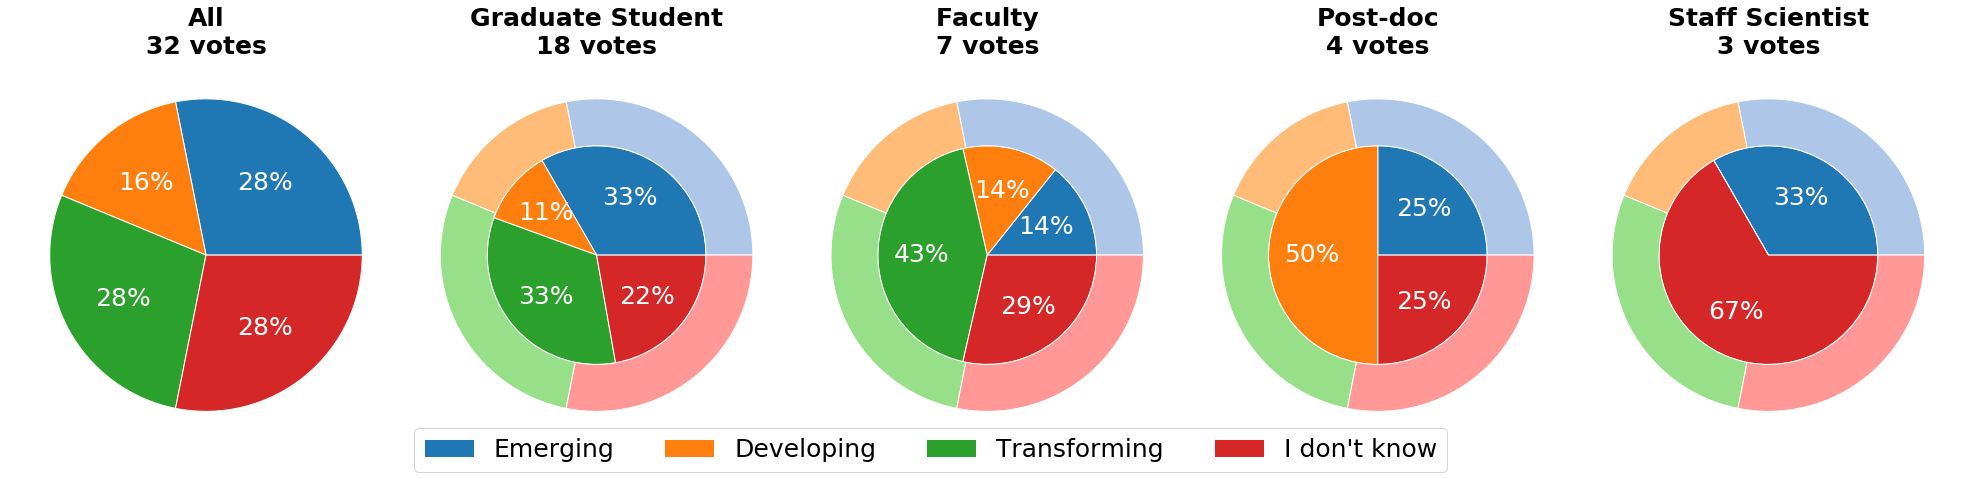

In [10]:
size=0.3
cmap = plt.get_cmap("tab20")
inner_colors = cmap(np.arange(4)*2)
outer_colors = cmap((np.arange(4)*2)+1)


fig, axes = plt.subplots(1,5, figsize=[35,10], gridspec_kw=dict(wspace=0))

question = 'Recruiting members of underrepresented groups'

for ax, label in zip(axes,['All', 'Graduate Student', 'Faculty', 'Post-doc', 'Staff Scientist']):
    
    if label == 'All':
        df_group = df
        df_values_all = dataframe_values(df_group)[question]
        
        ax.pie(df_values_all.values(), autopct=lambda pct: func(pct, df_values_all.values()),
            radius=1, colors=inner_colors,
            wedgeprops=dict(edgecolor='w'),  textprops=dict(color="w", fontsize=25))
        ax.set(aspect="equal")
        ax.set_title(label+'\n{0} votes'.format(sum(df_values_all.values())), fontsize=25, fontweight='bold')
        
    else:
        df_group = df.loc[label]
        
        
        df_group_values = dataframe_values(df_group)[question]
        
        ax.pie(df_group_values.values(), autopct=lambda pct: func(pct, df_group_values.values()),
            radius=1-size, colors=inner_colors,
            wedgeprops=dict(edgecolor='w'), textprops=dict(color="w", fontsize=25))
        ax.pie(df_values_all.values(), radius=1, colors=outer_colors,
               wedgeprops=dict(width=size, edgecolor='w'))
        ax.set(aspect="equal")
        ax.set_title(label+'\n{0} votes'.format(sum(df_group_values.values())), fontsize=25, fontweight='bold')



plt.legend(labels = ['Emerging', 'Developing', 'Transforming', "I don't know"], ncol=4,
              bbox_to_anchor=(0.7, 0.28), bbox_transform=plt.gcf().transFigure, fontsize=25)
# fig.tight_layout()

# plt.savefig('plots/{0}.png'.format(question), bbox_inches='tight')

plt.show()

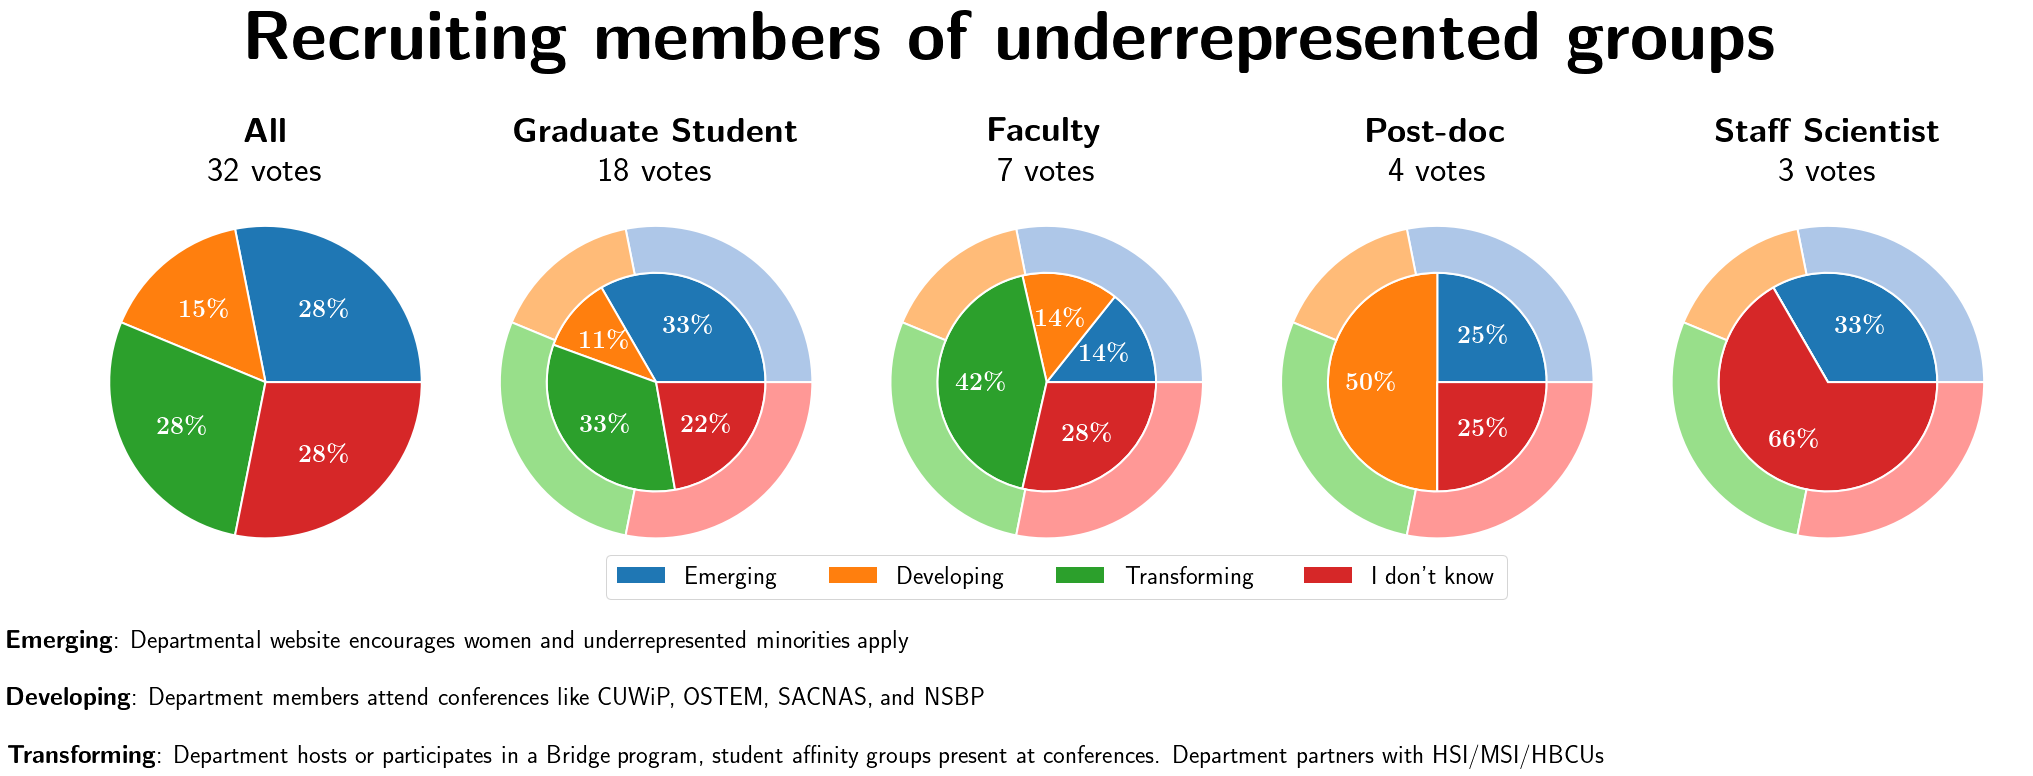

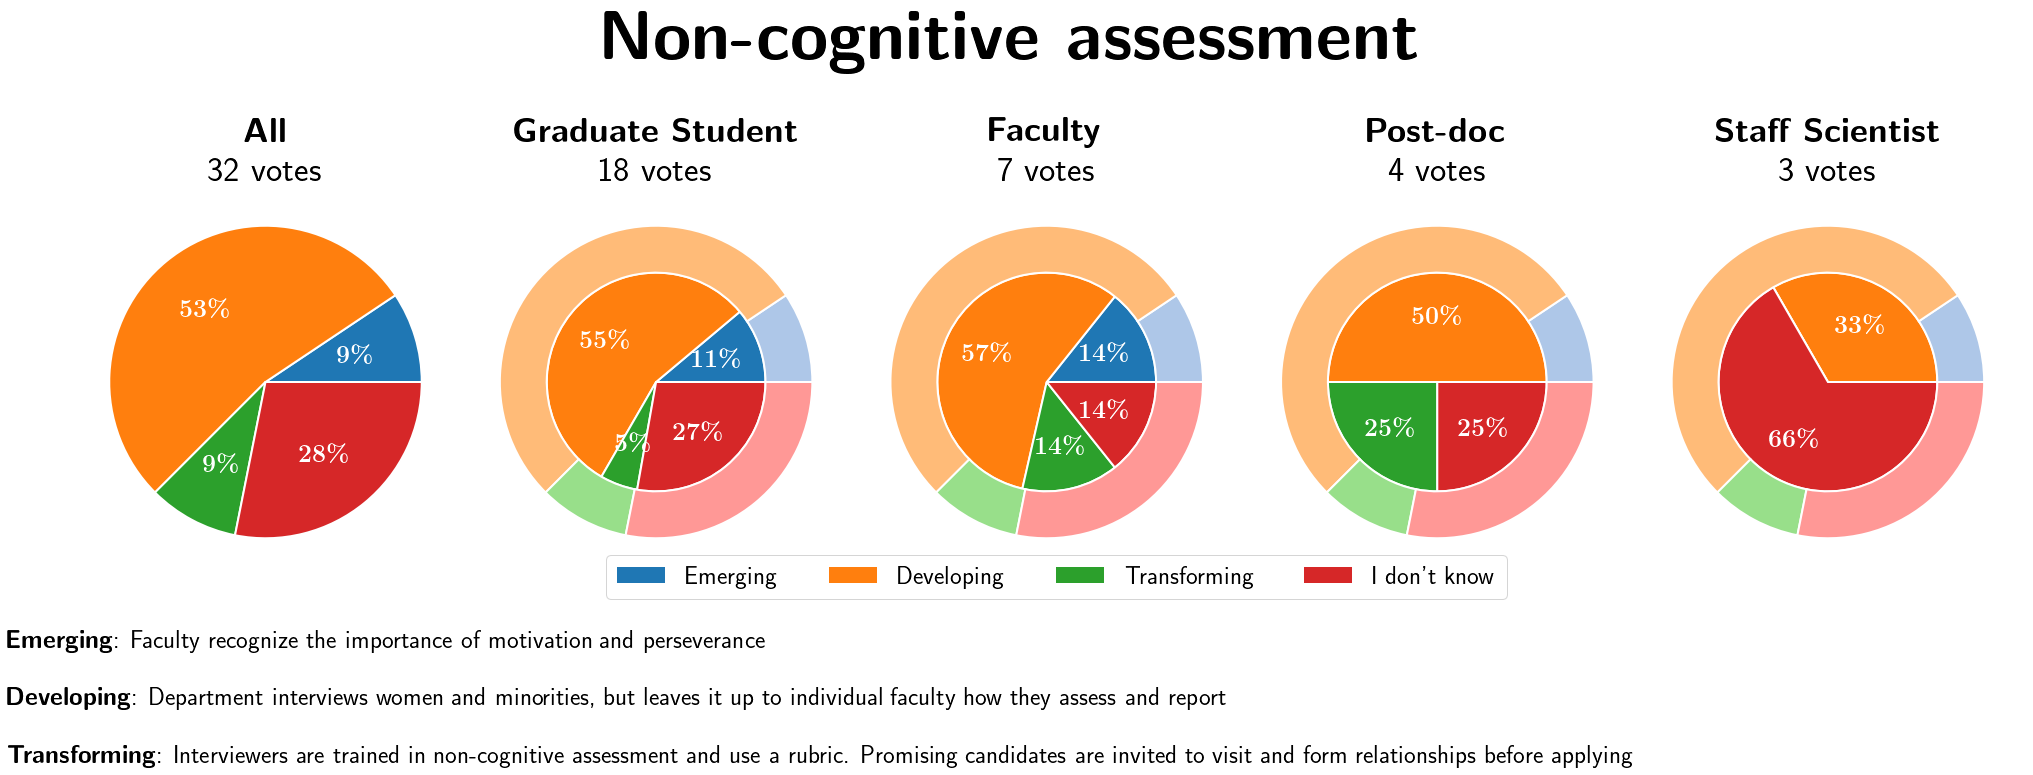

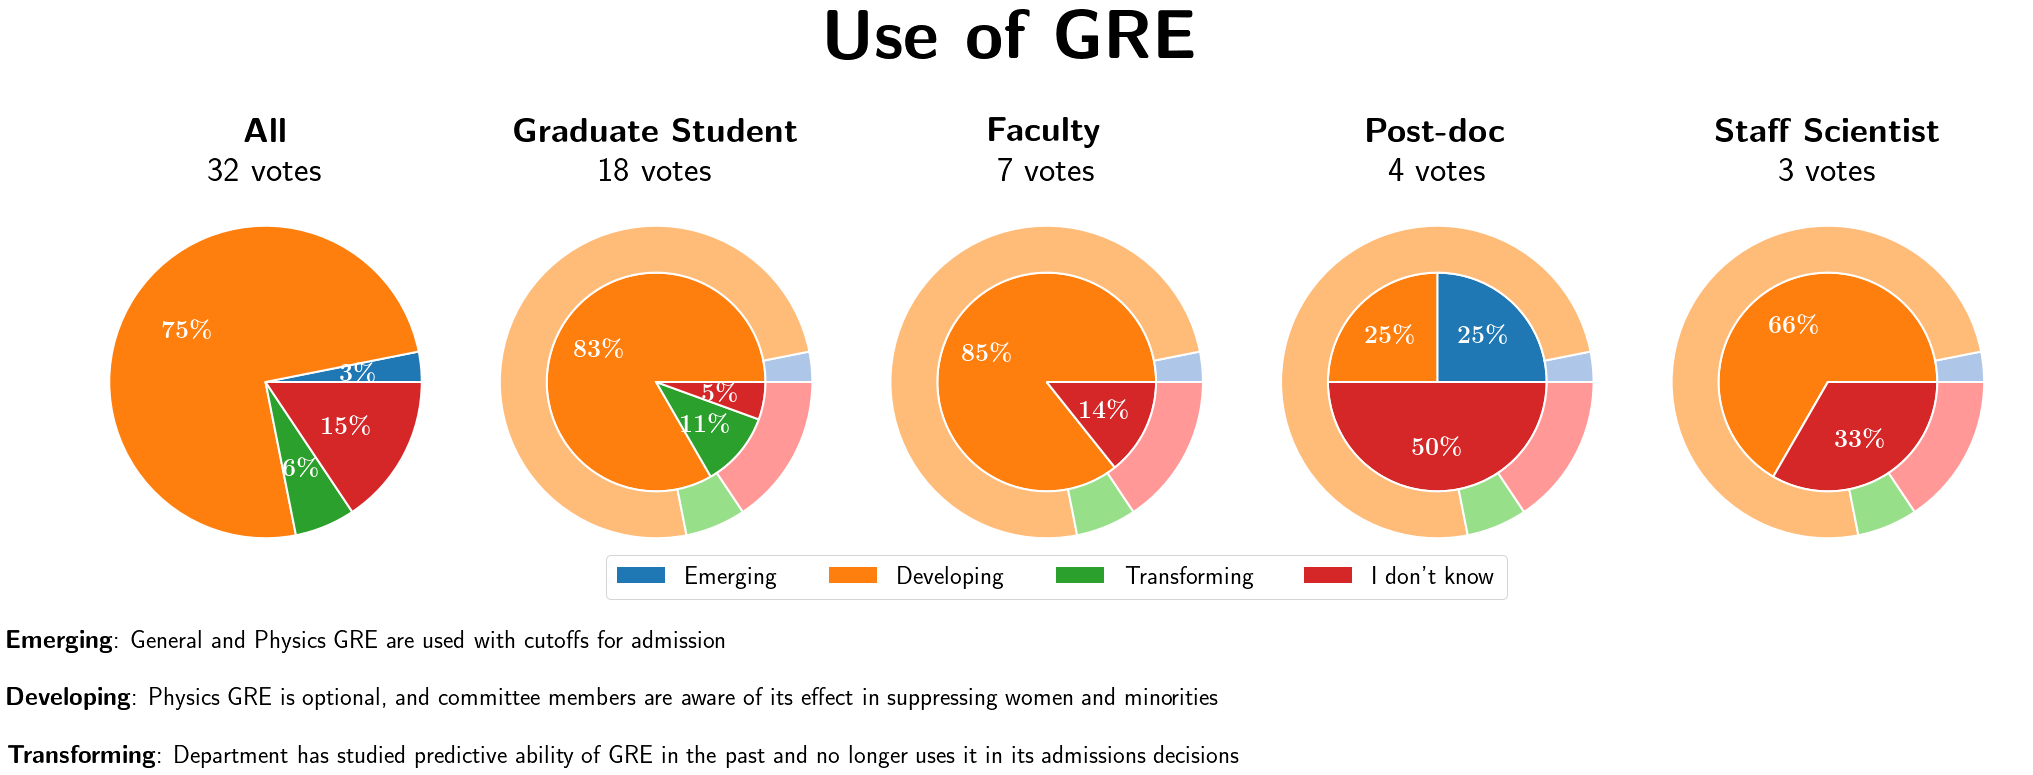

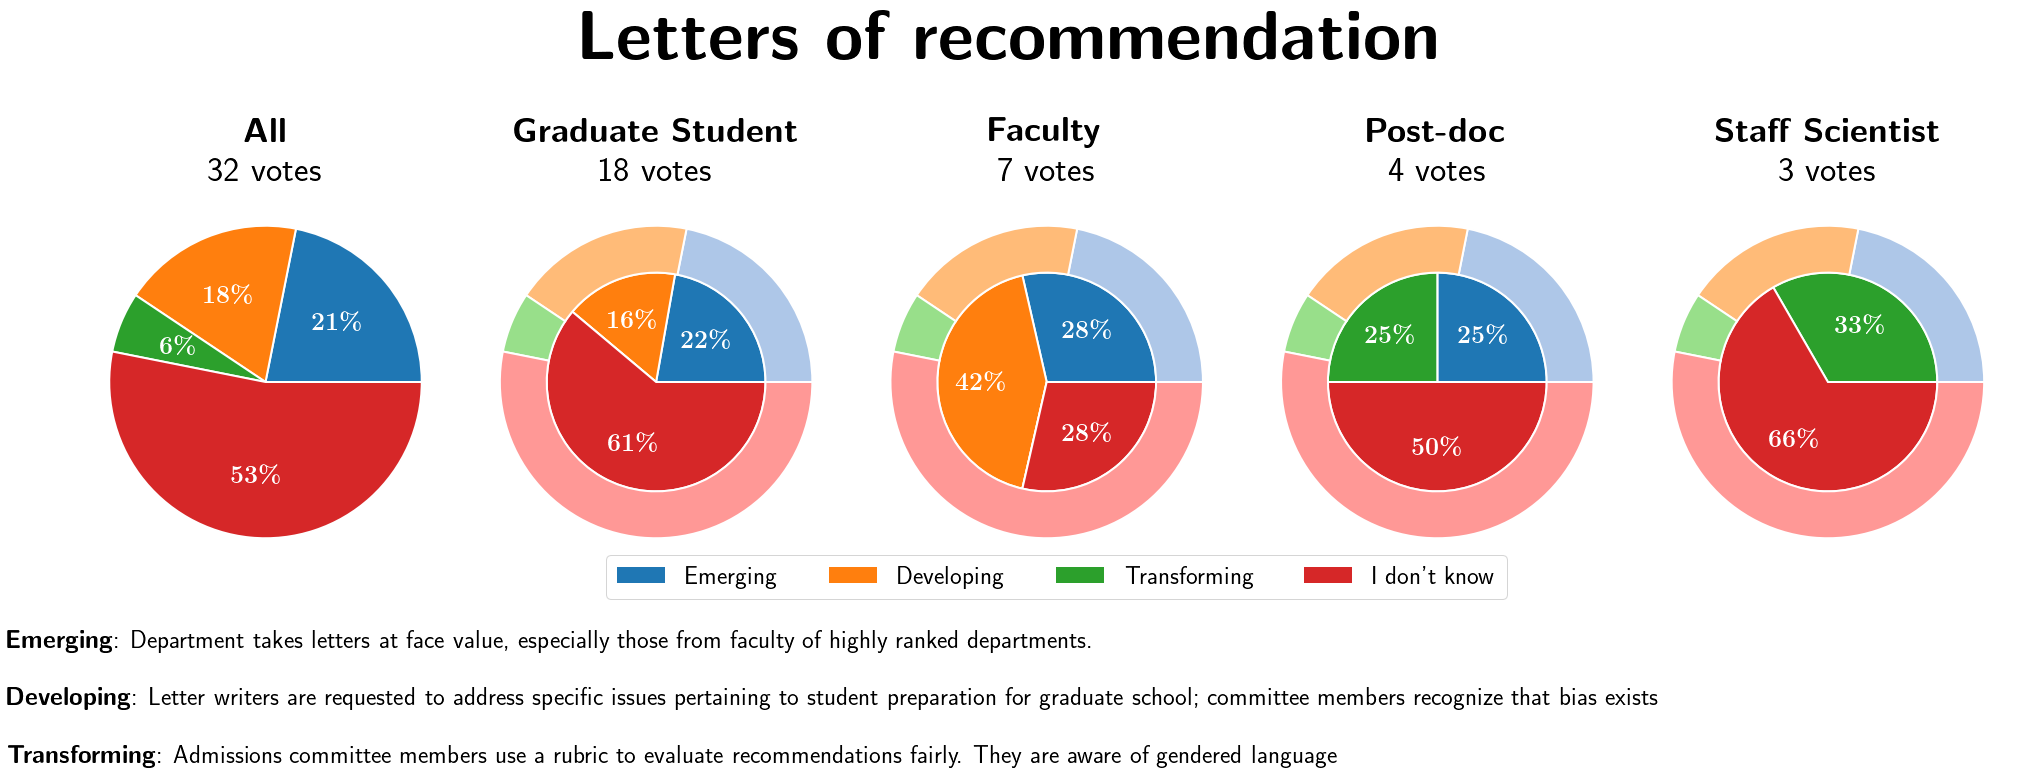

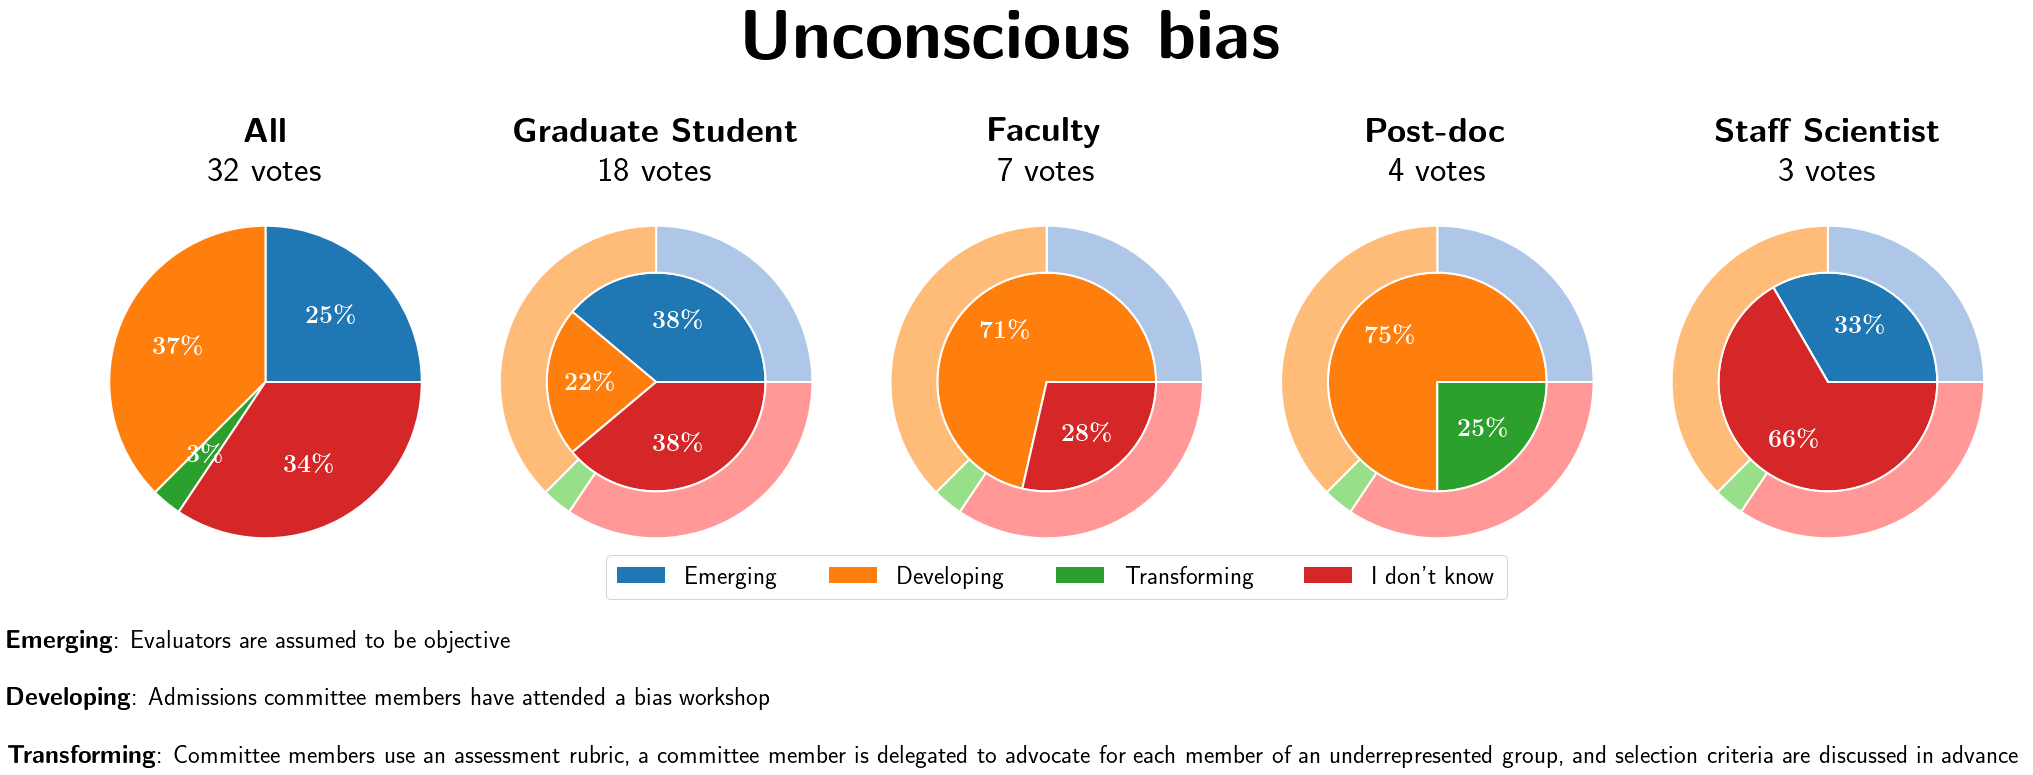

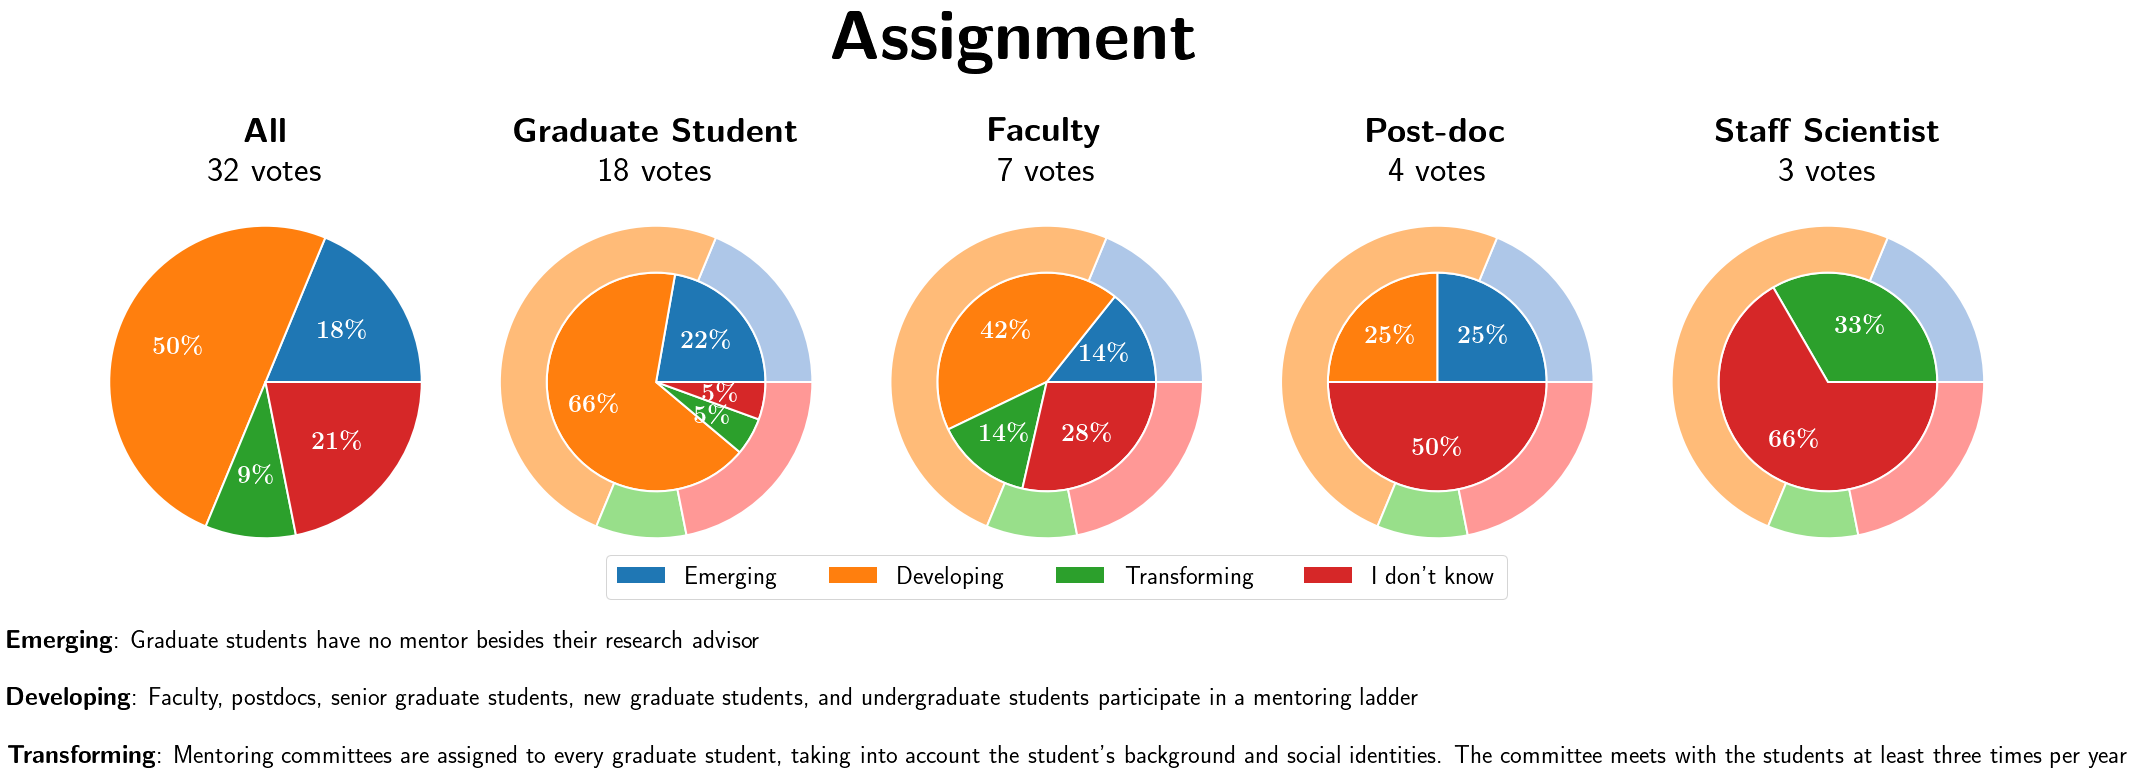

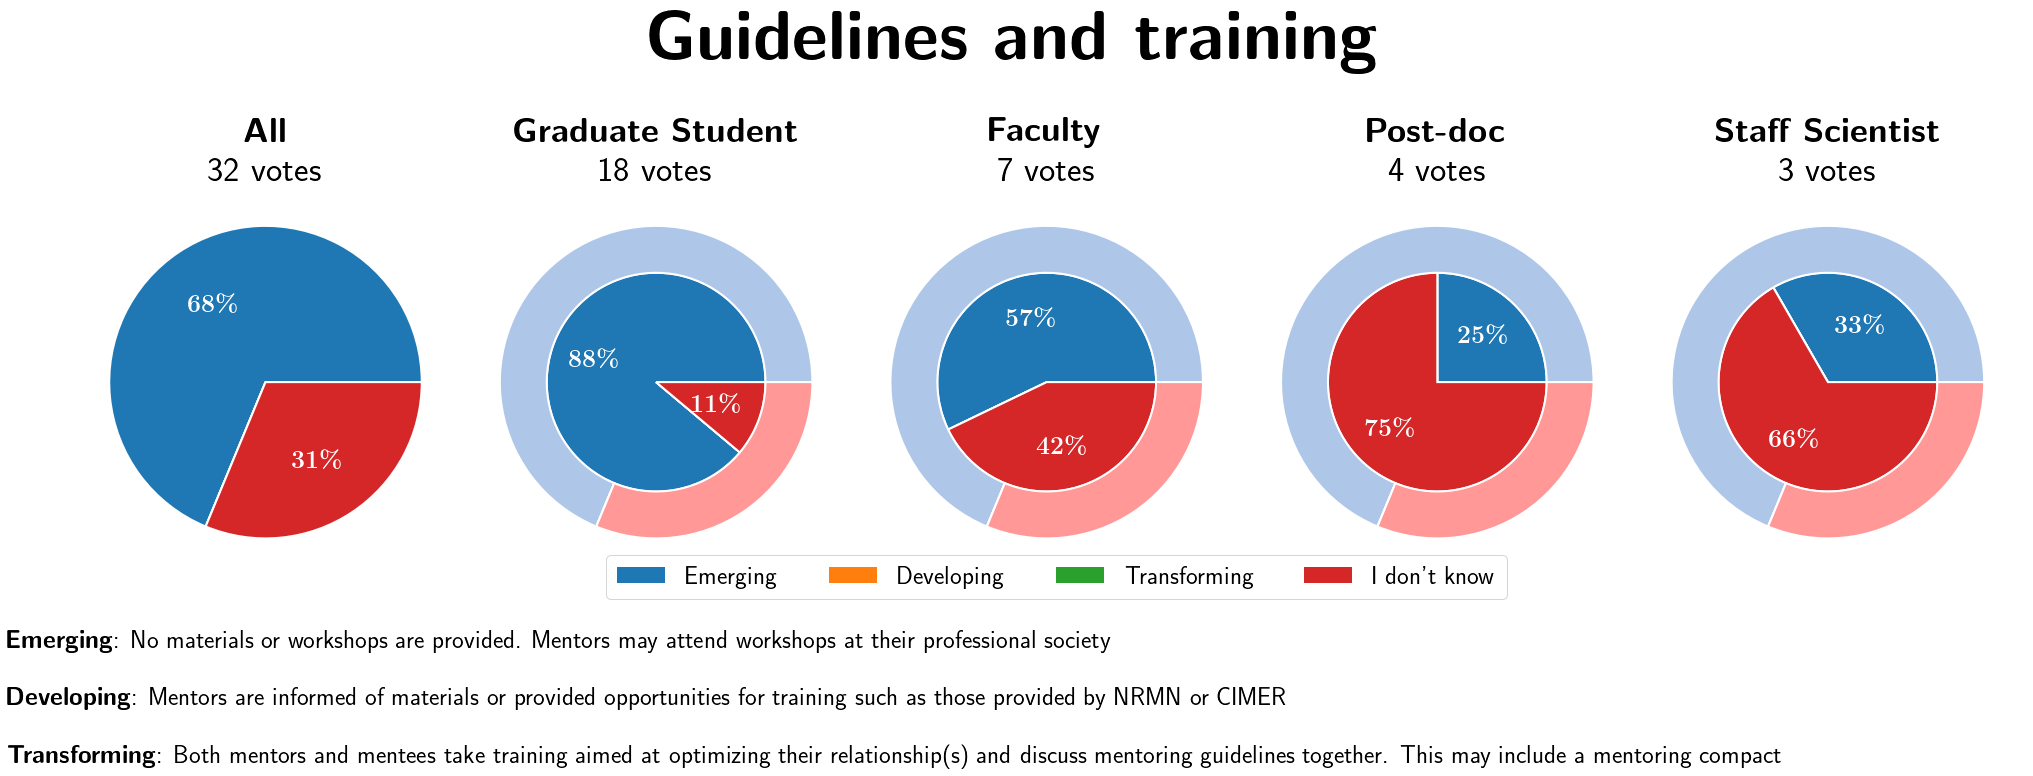

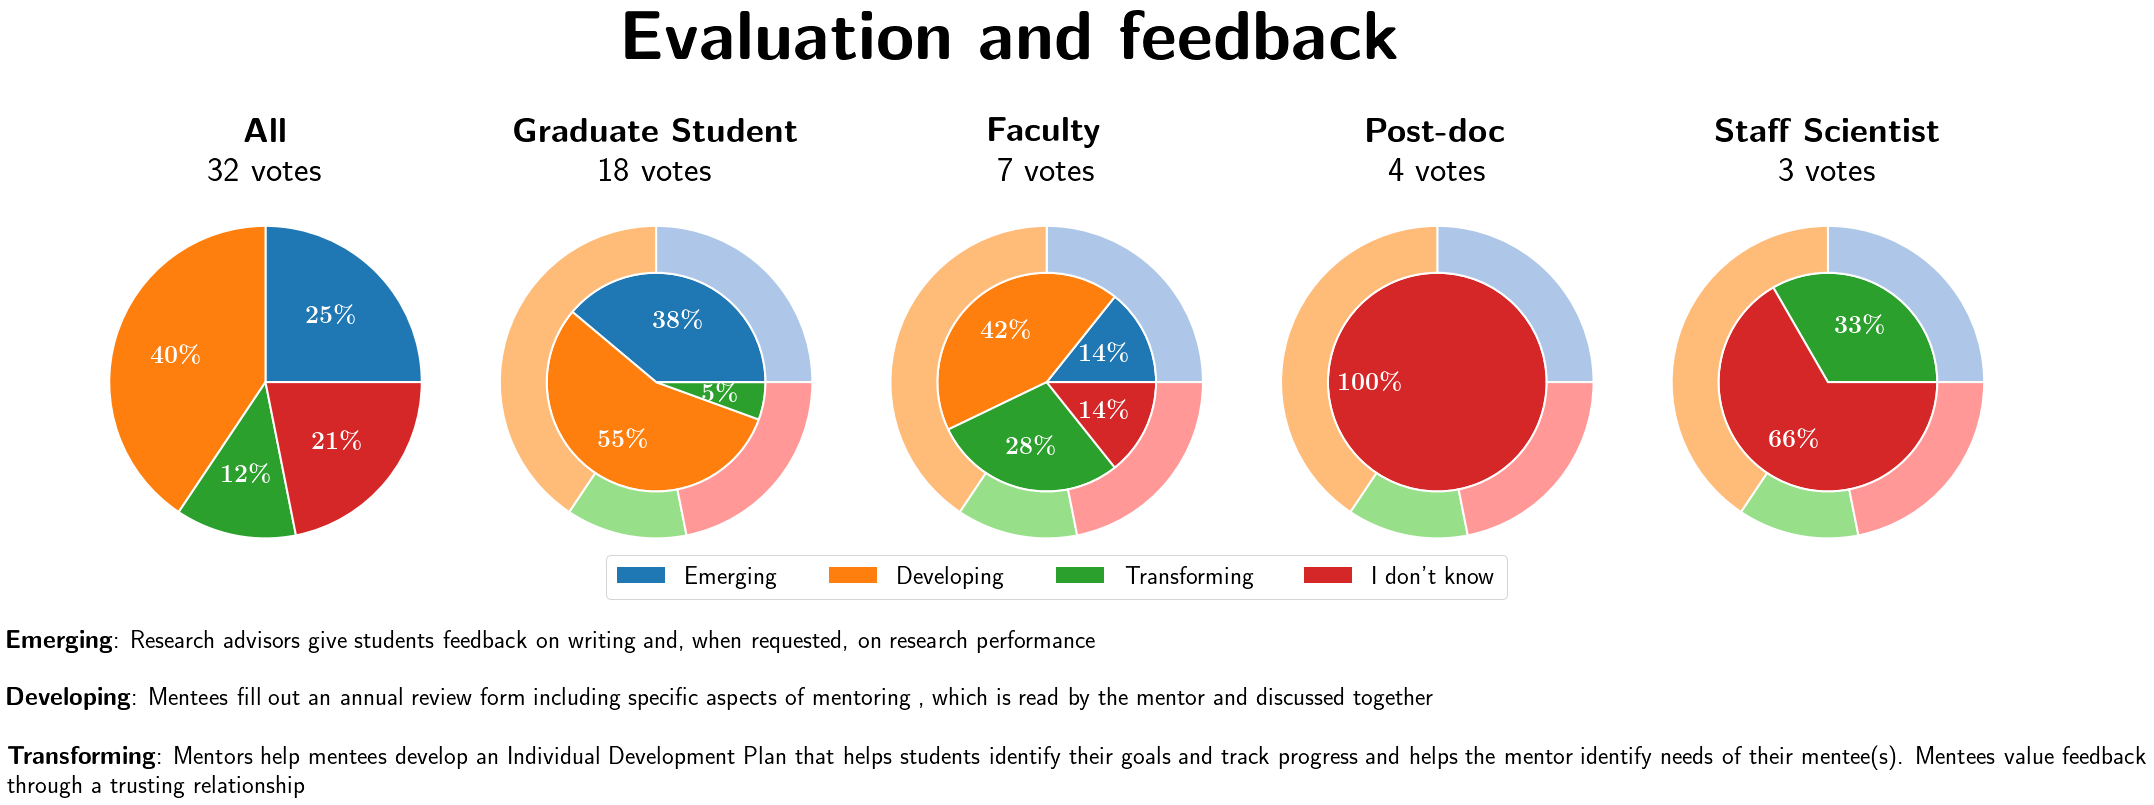

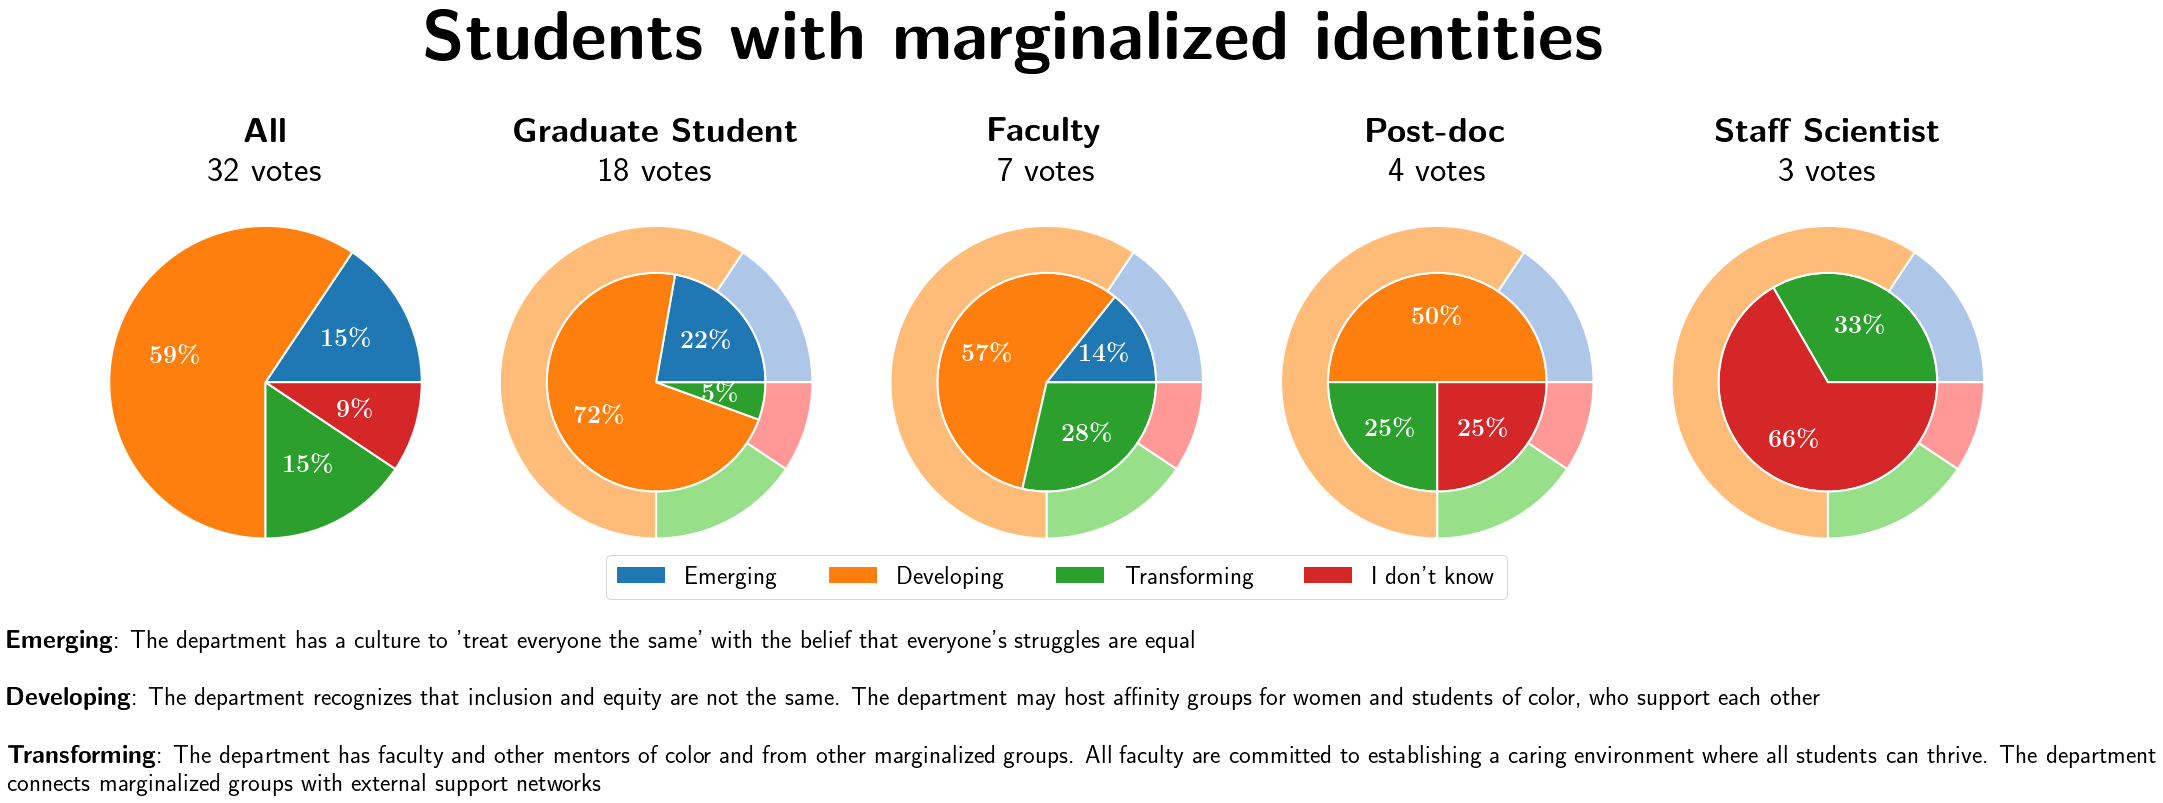

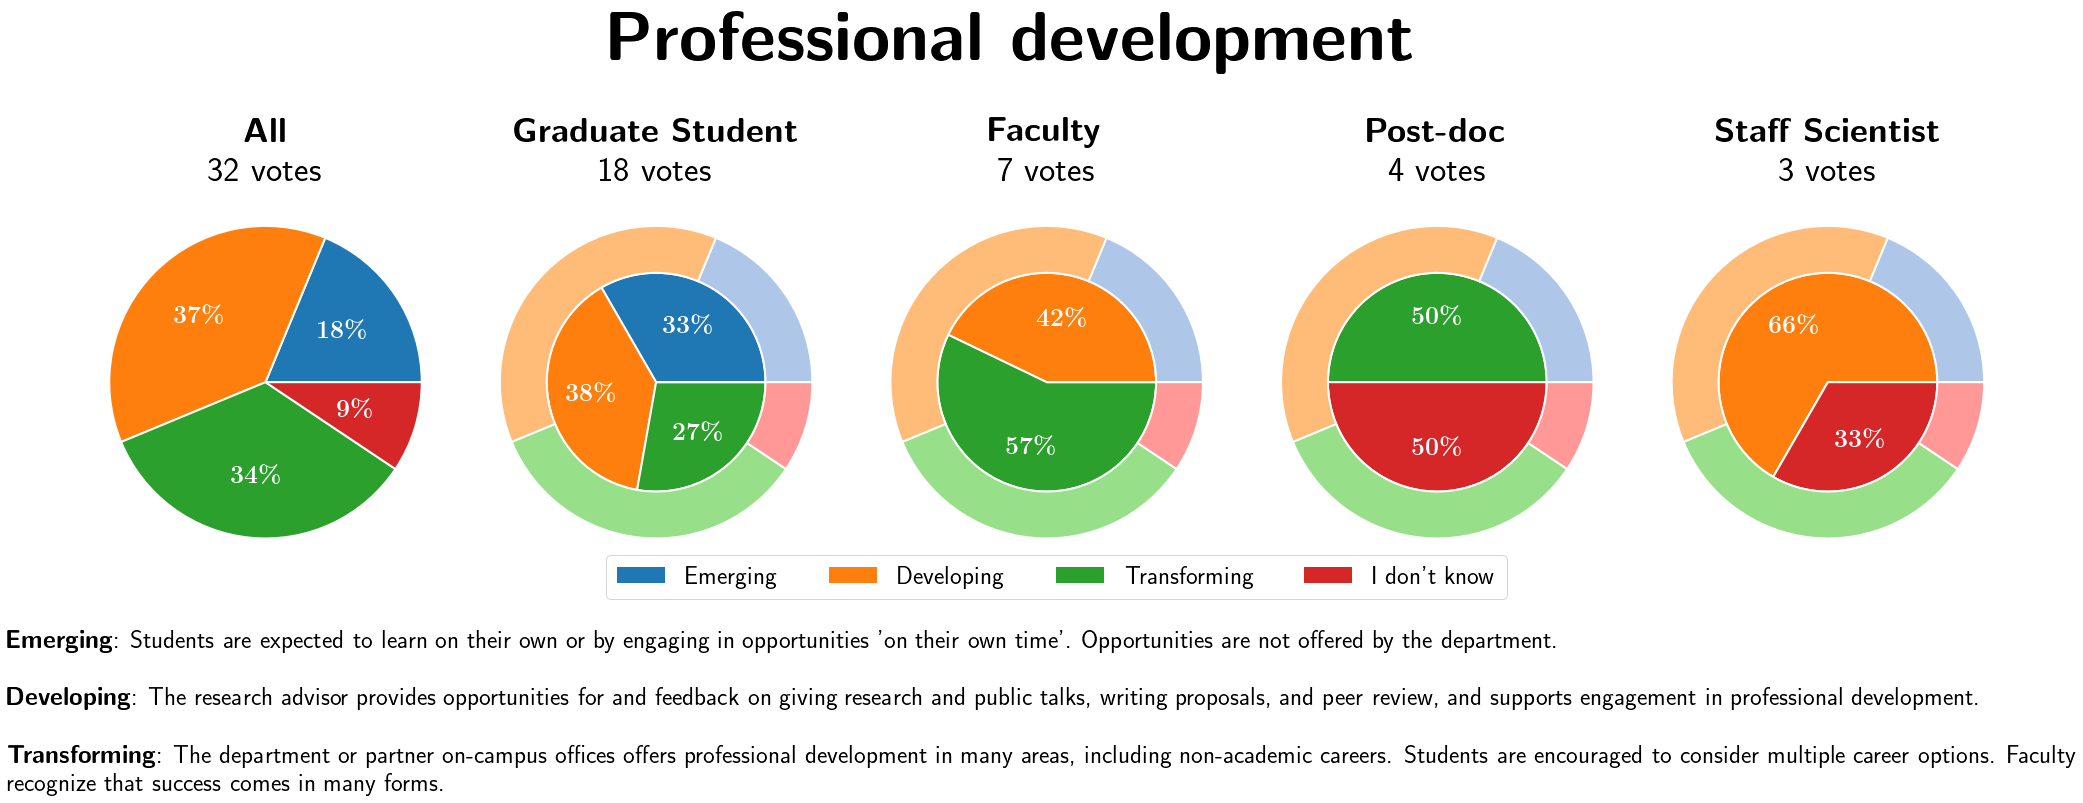

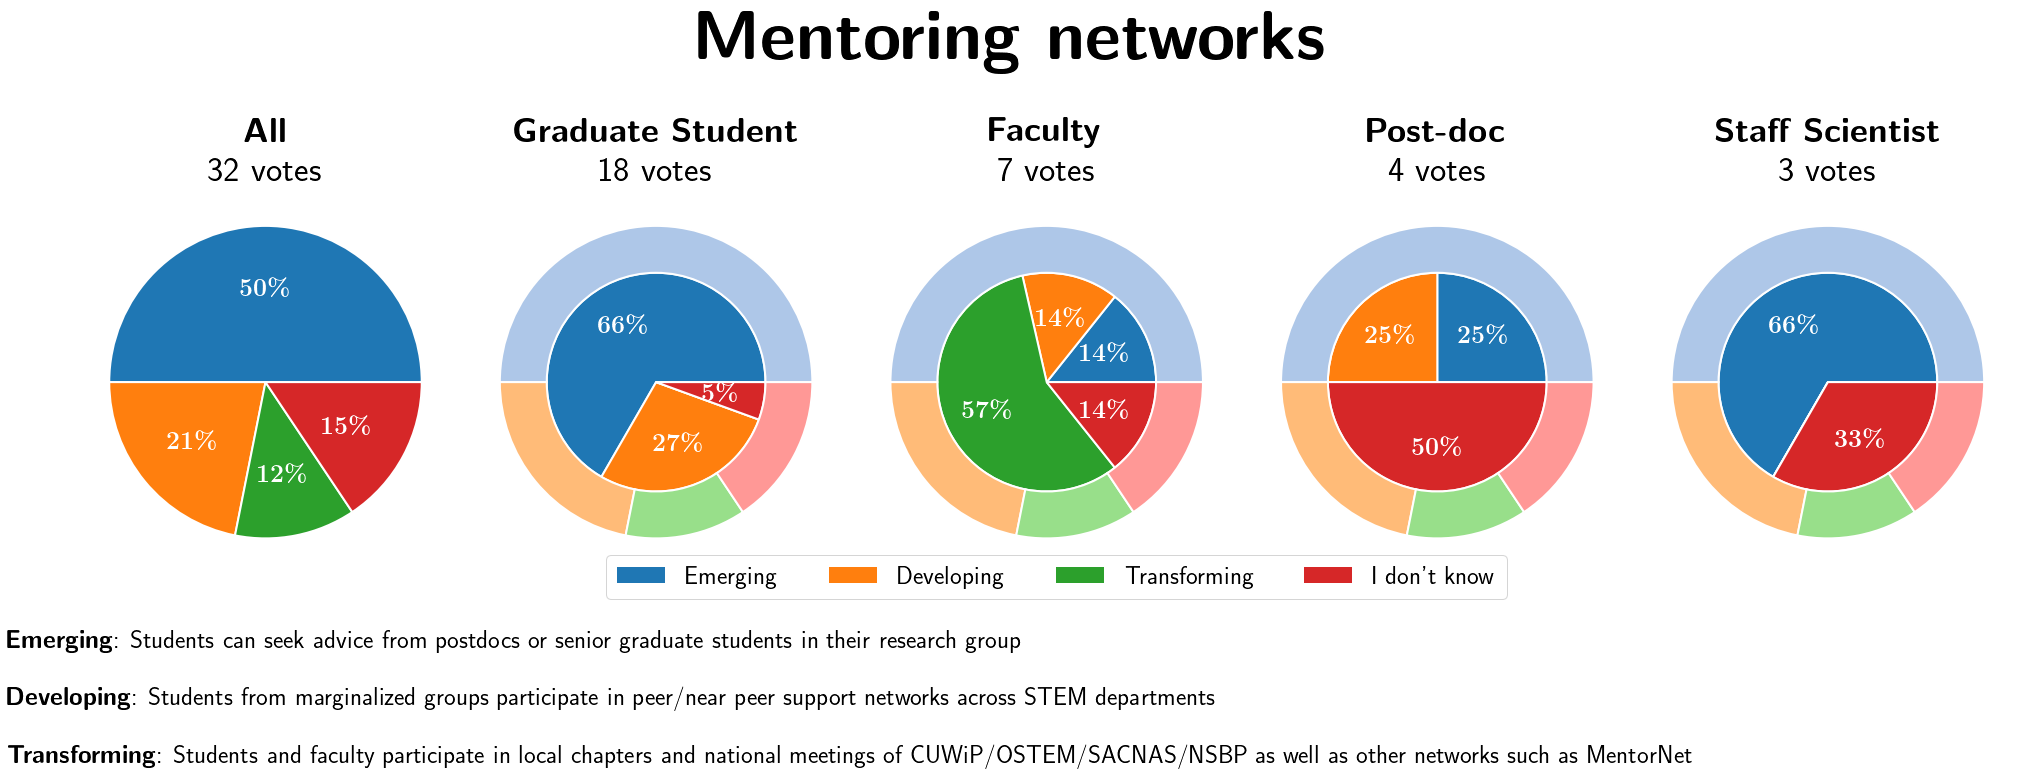

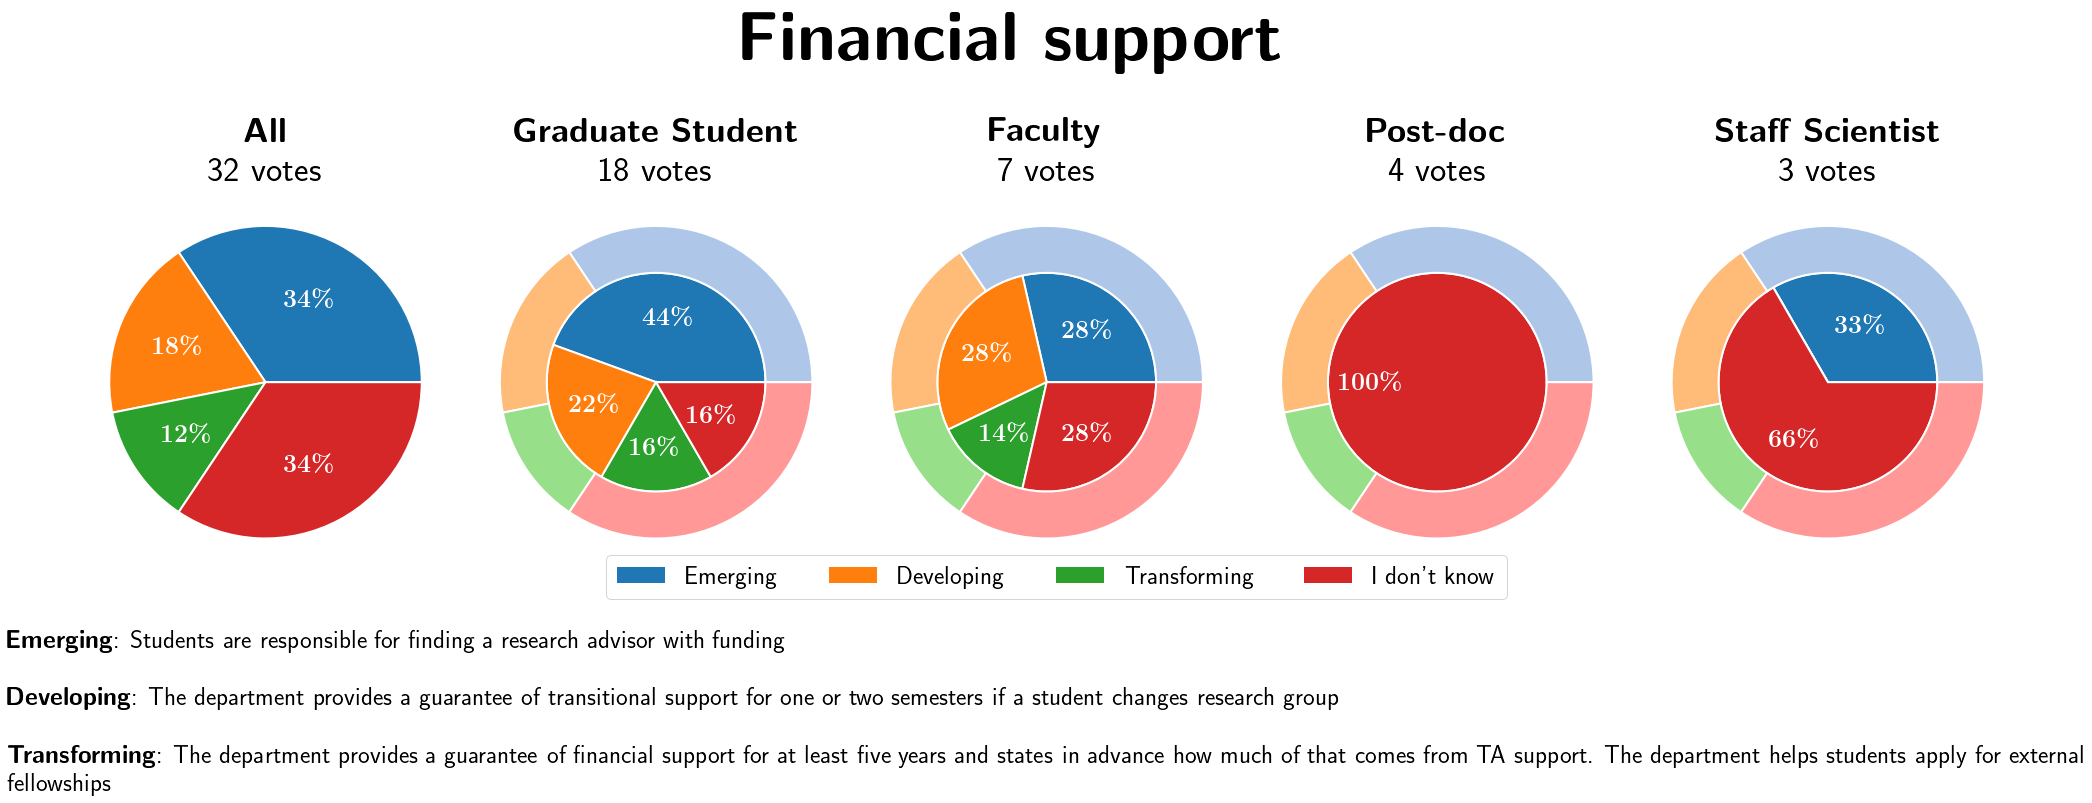

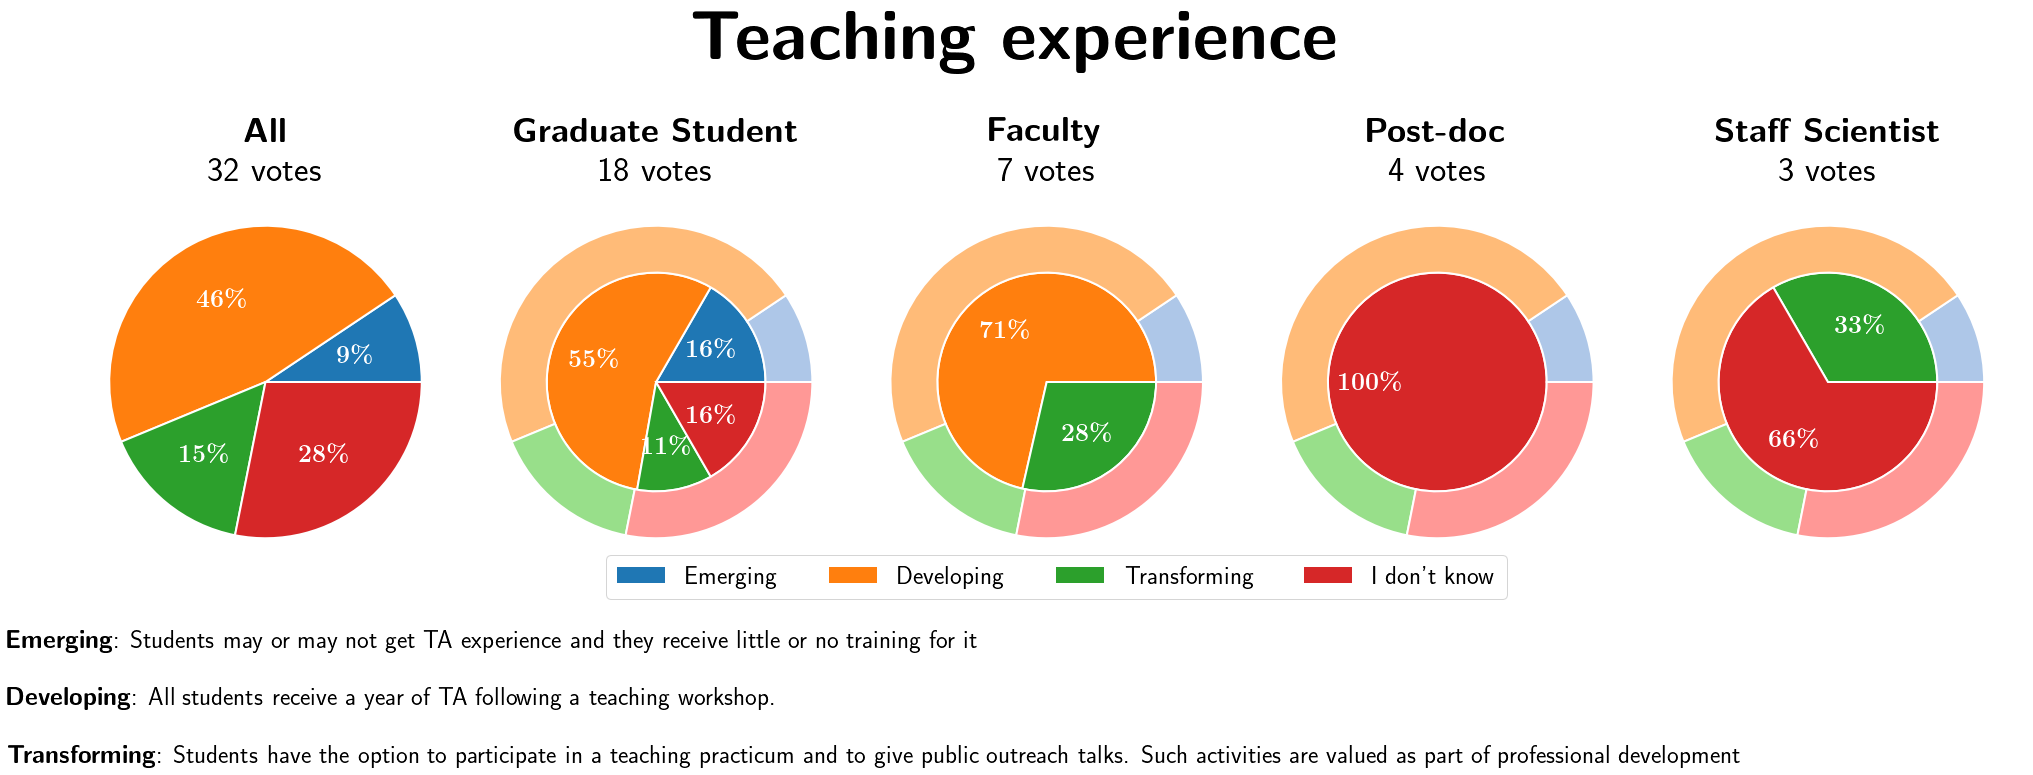

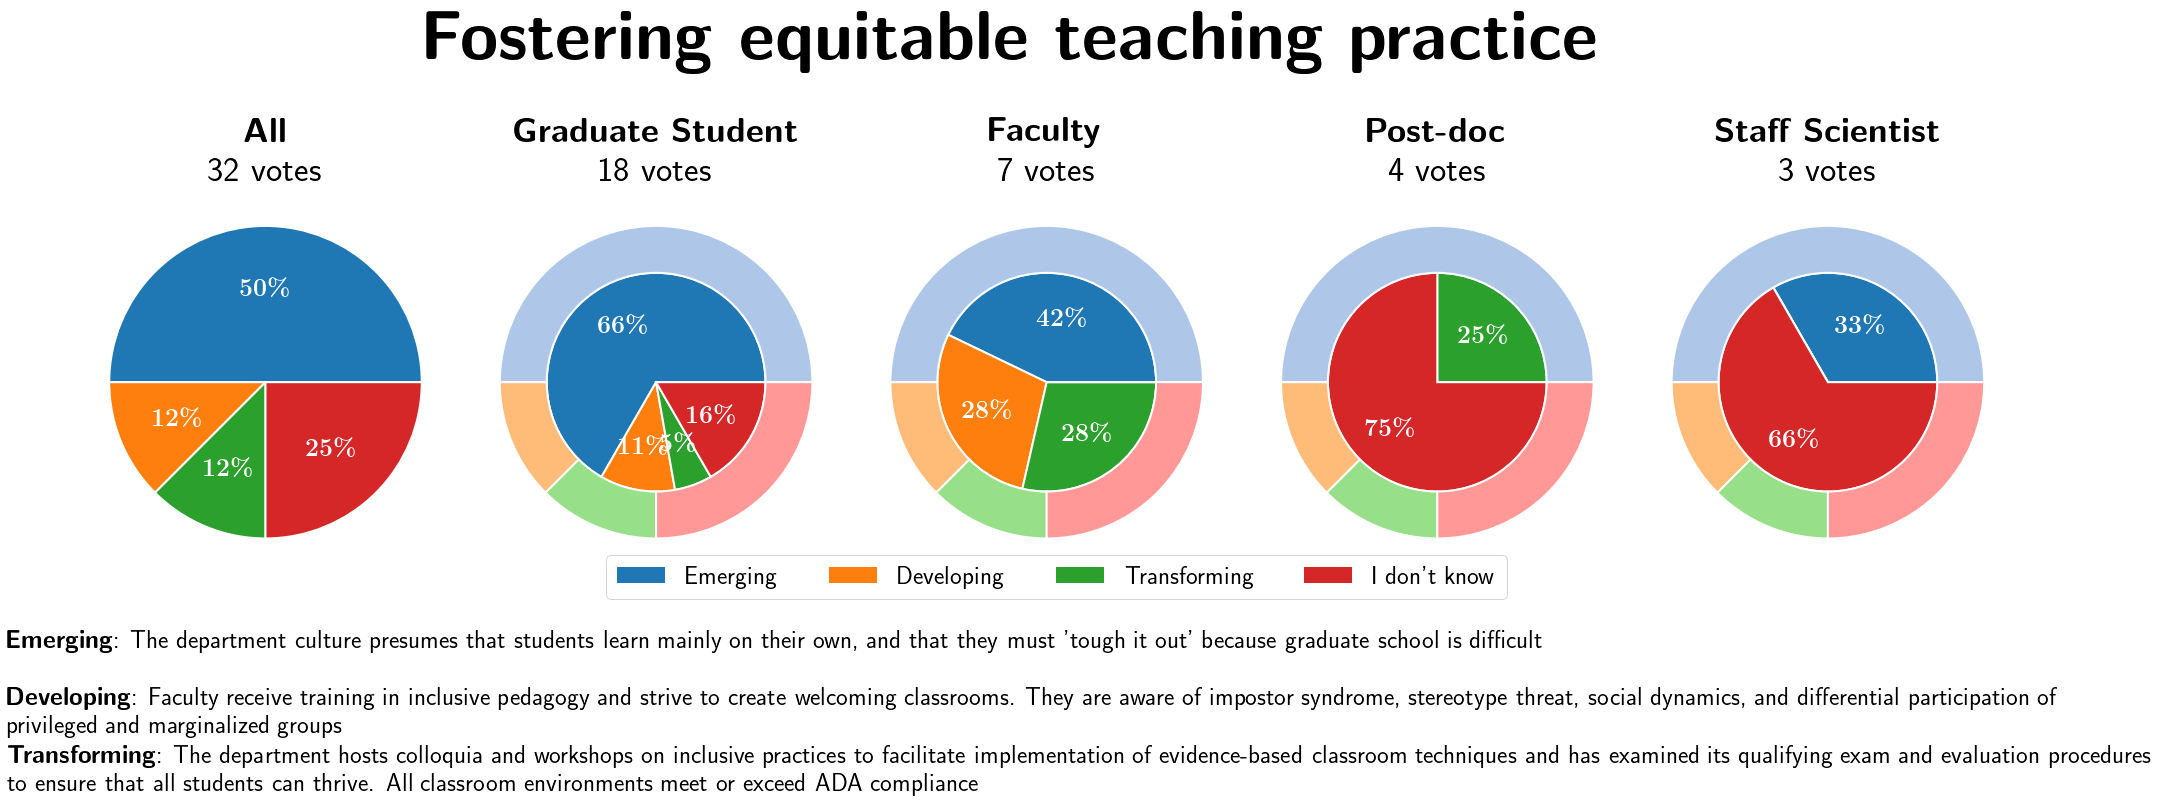

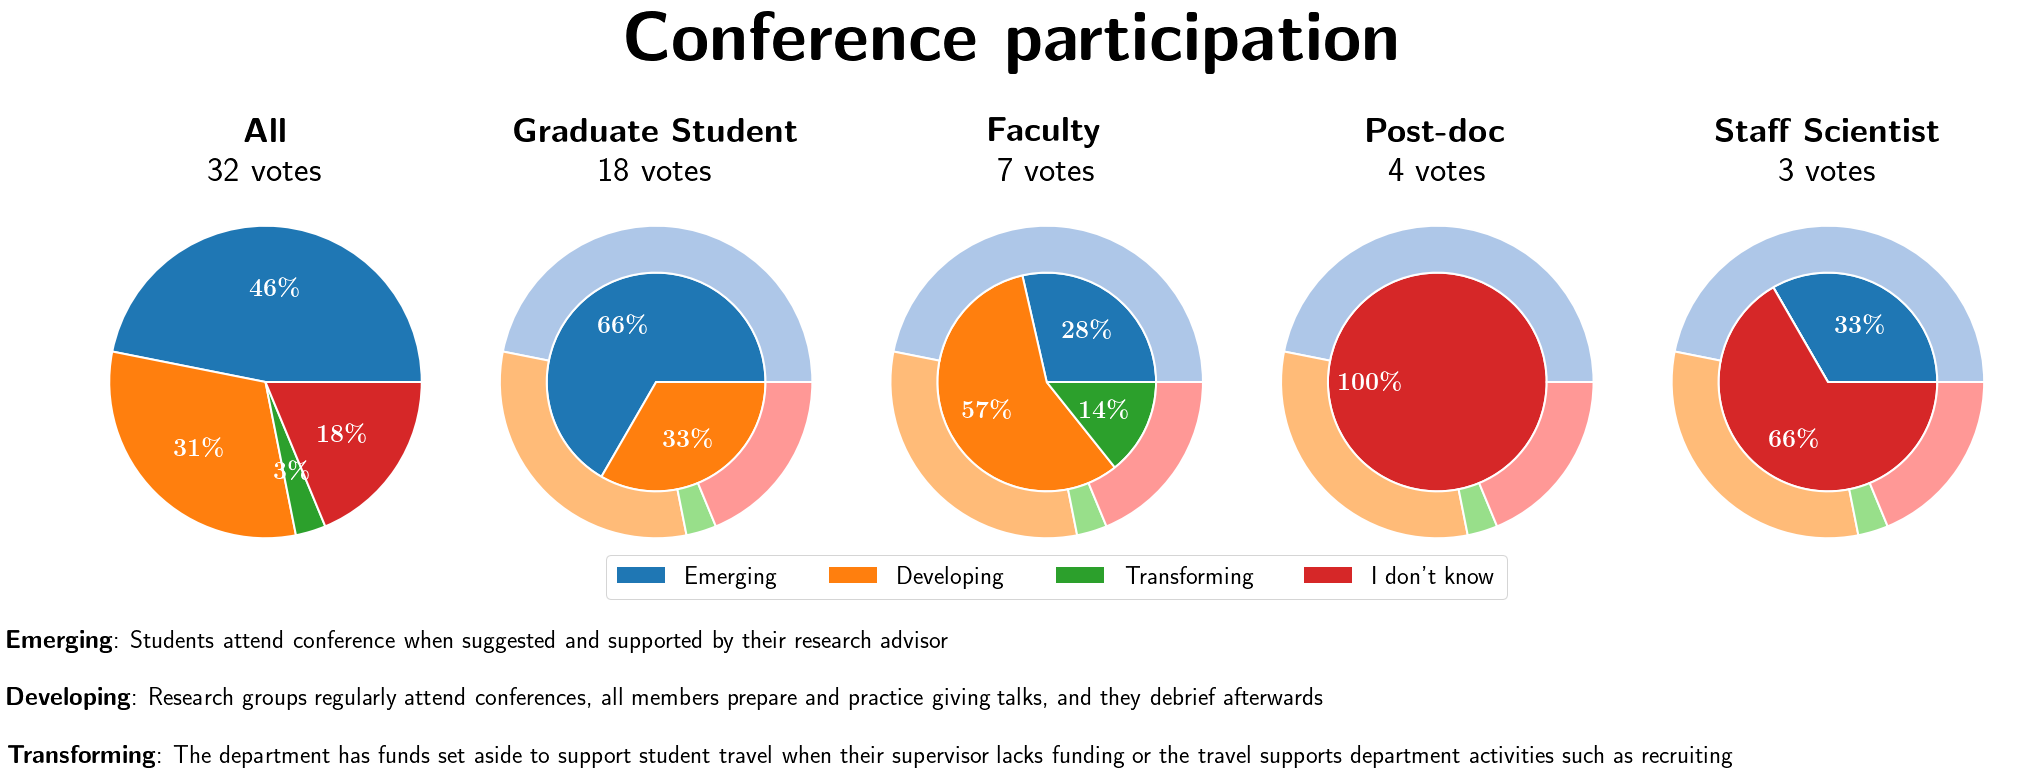

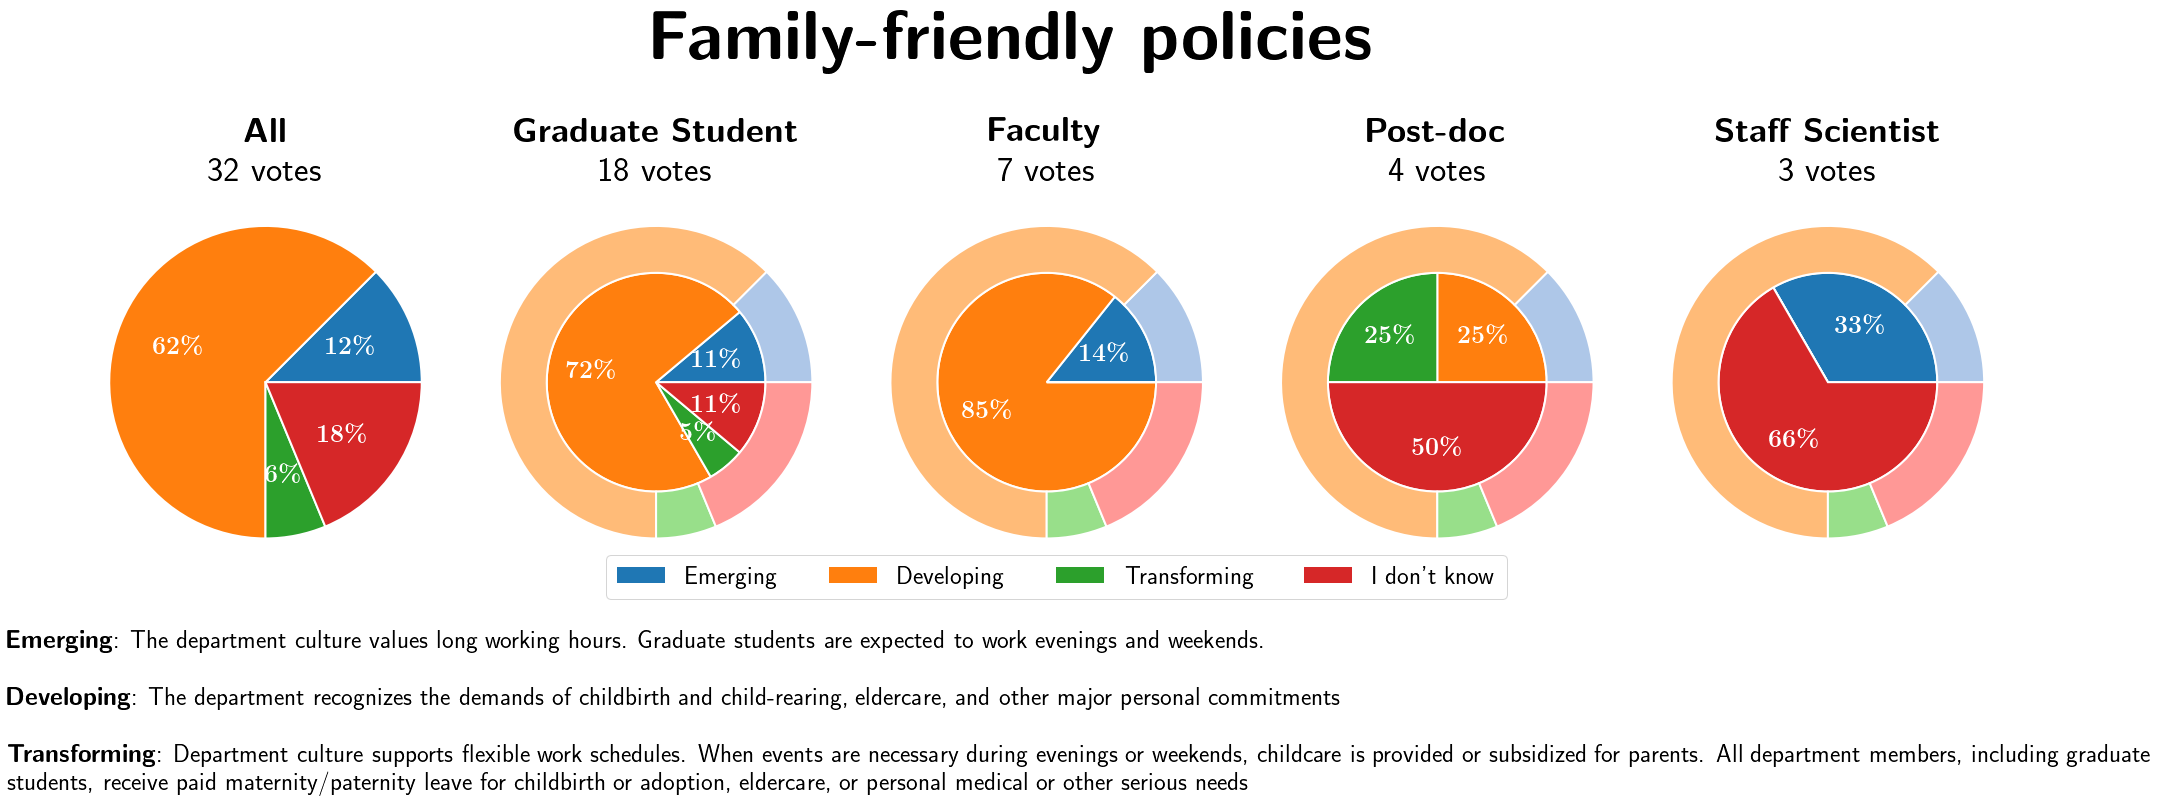

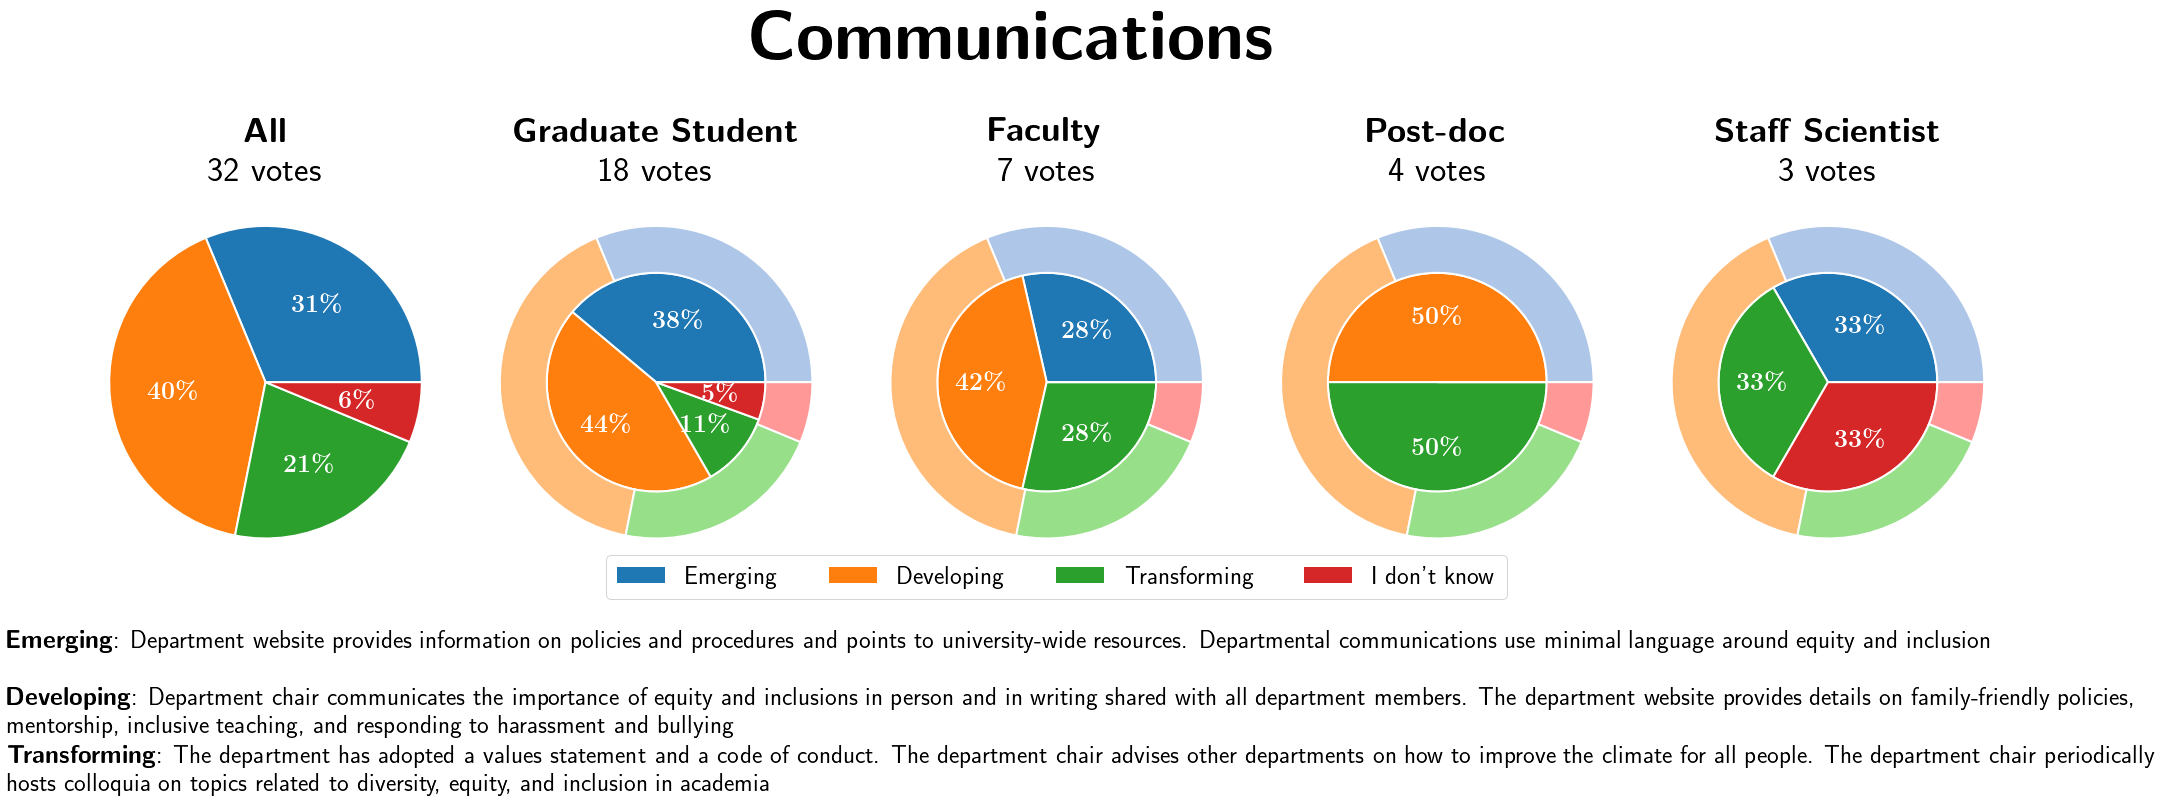

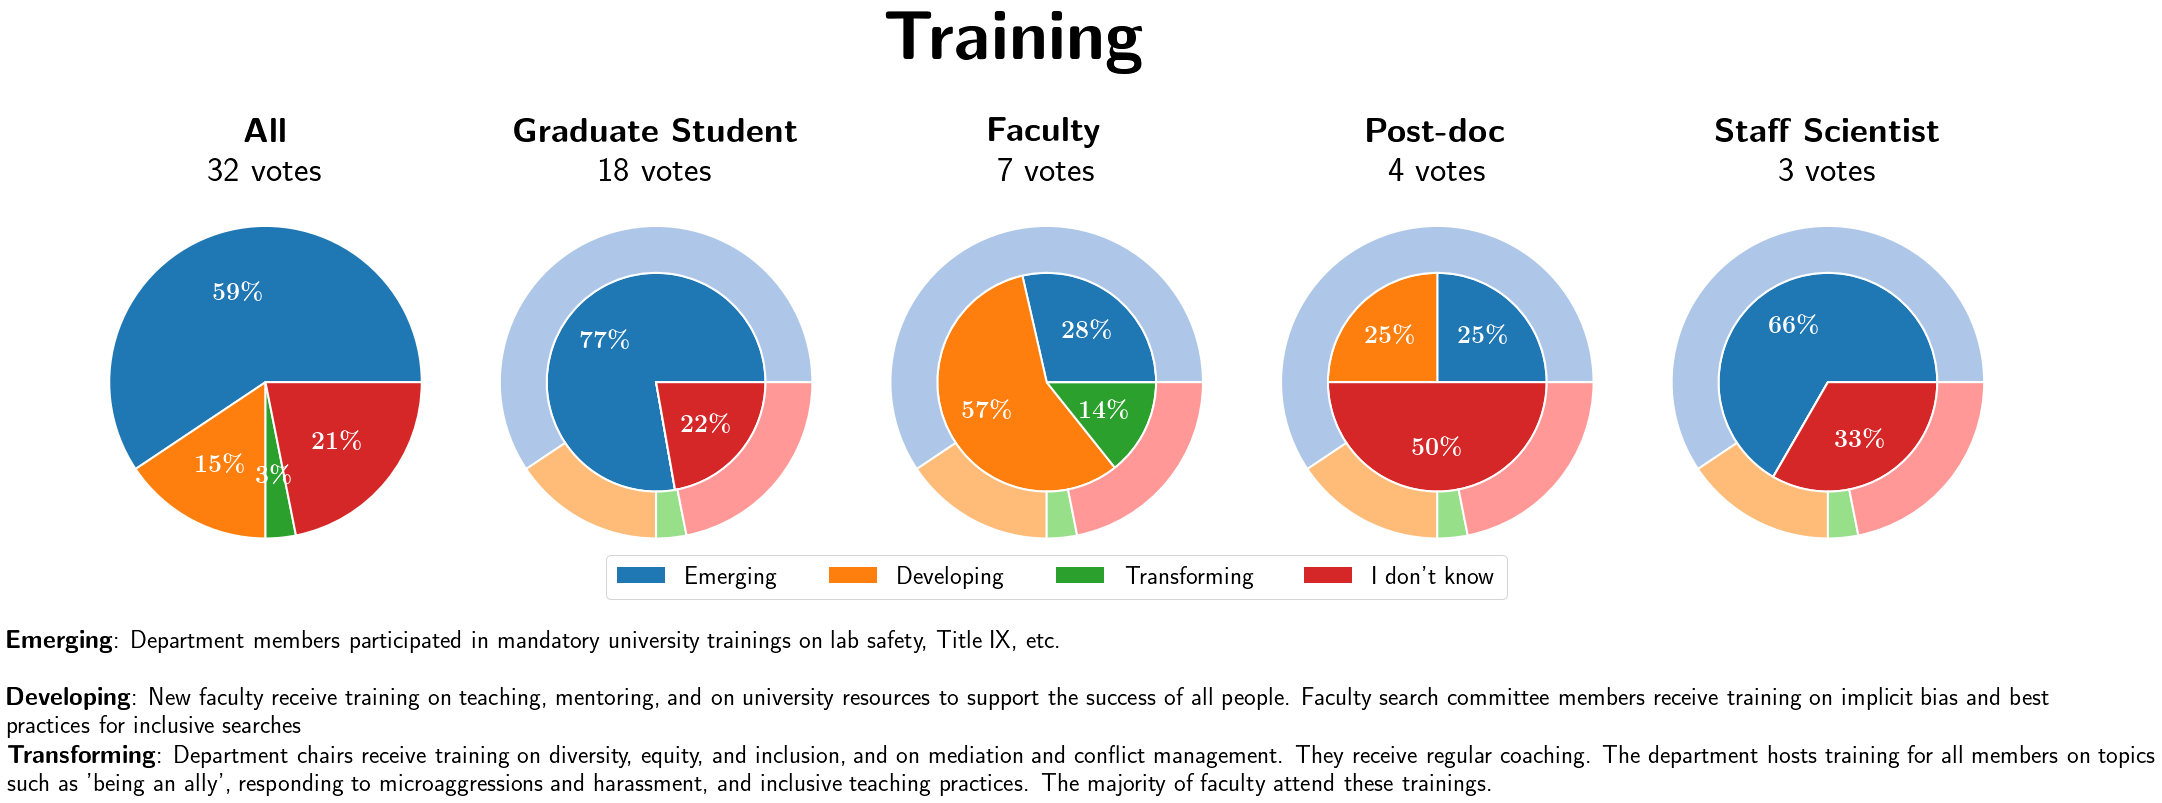

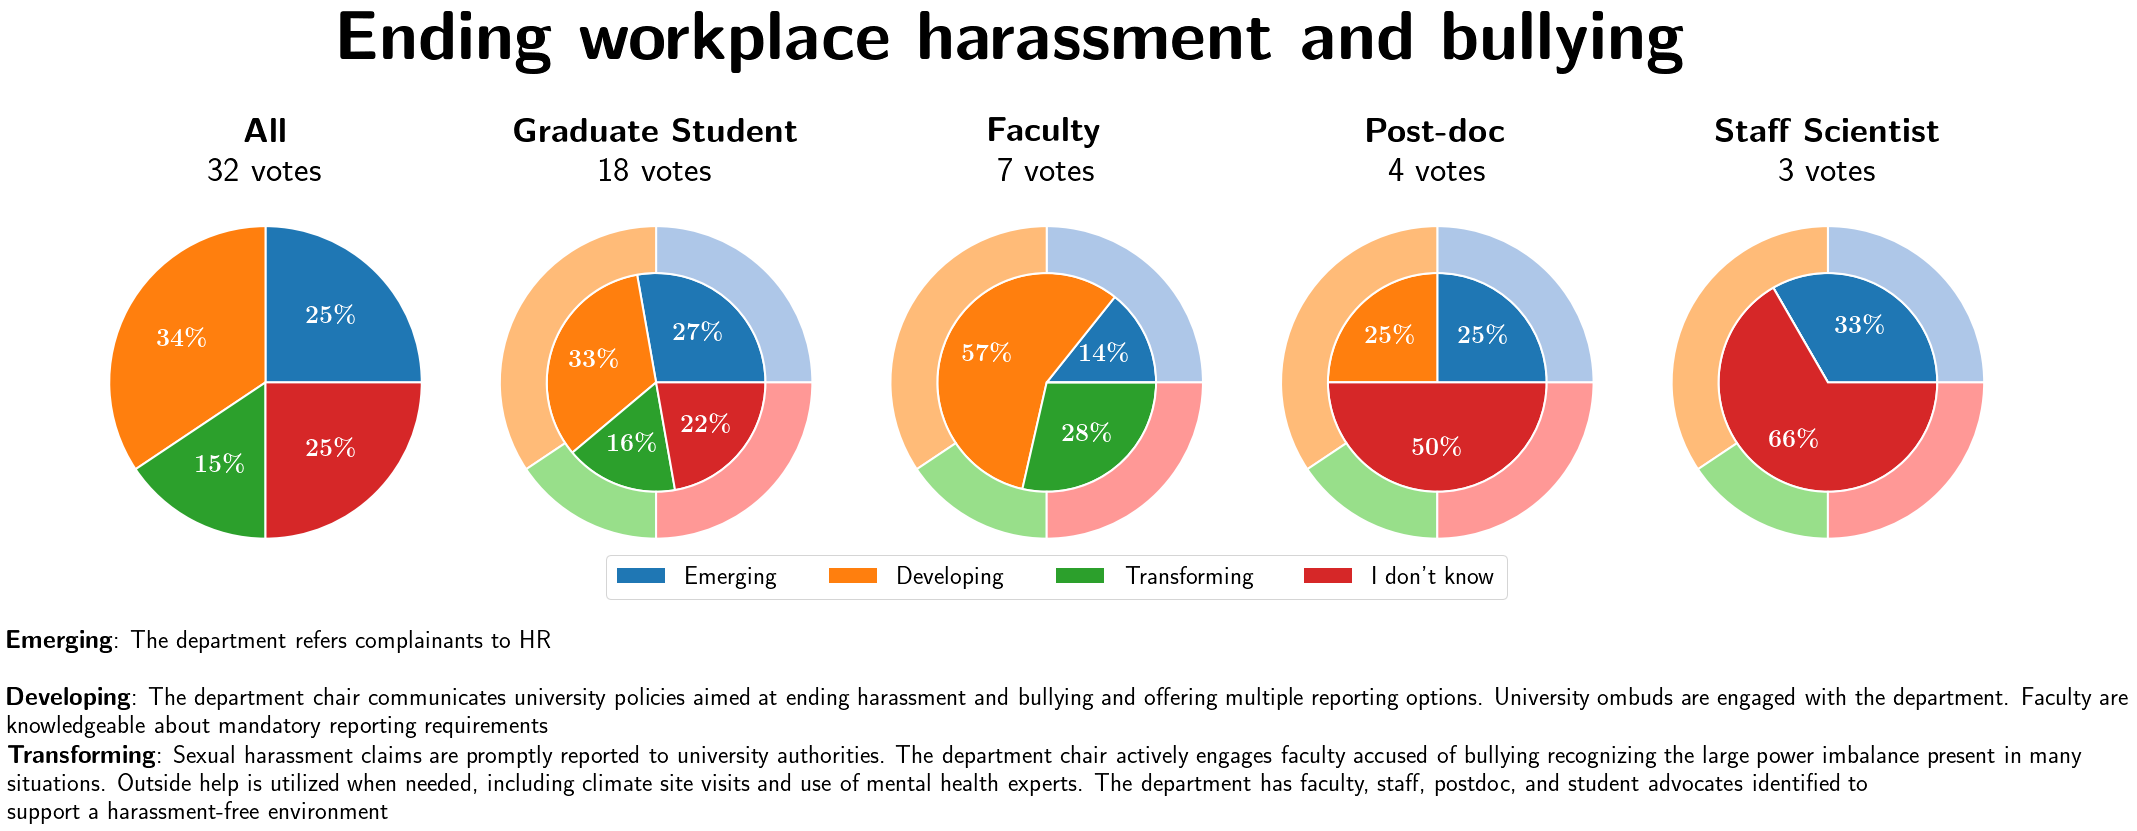

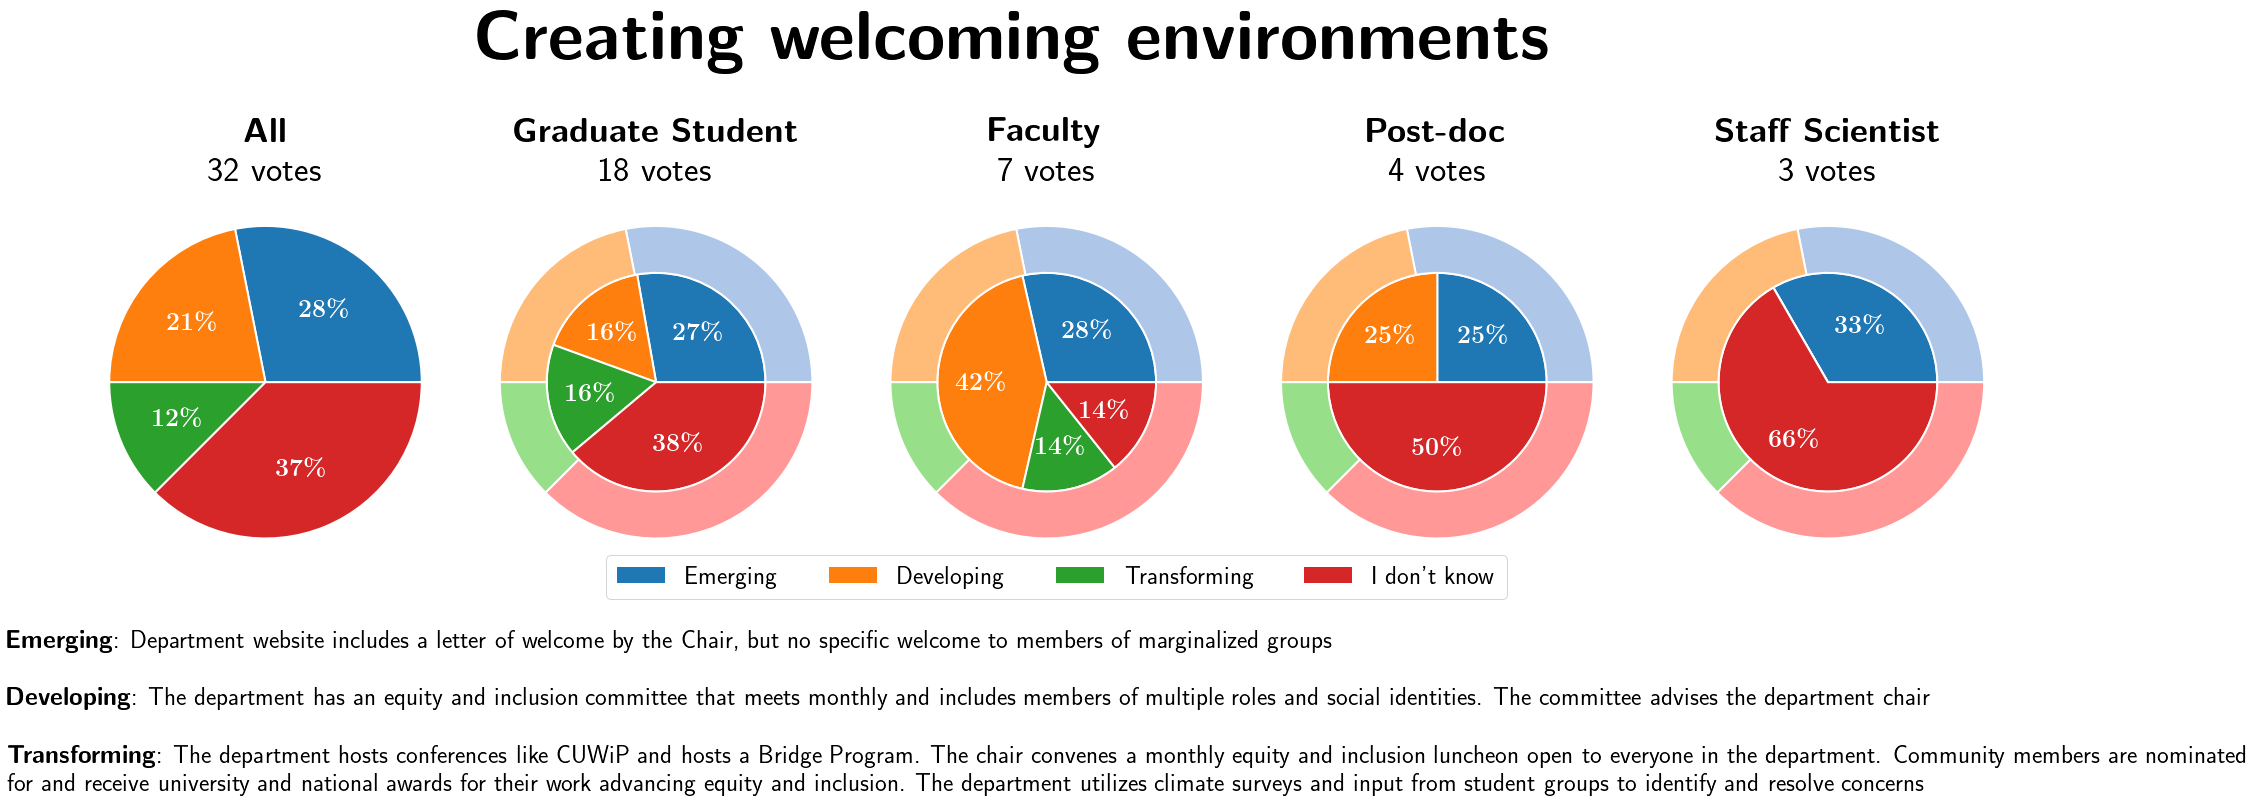

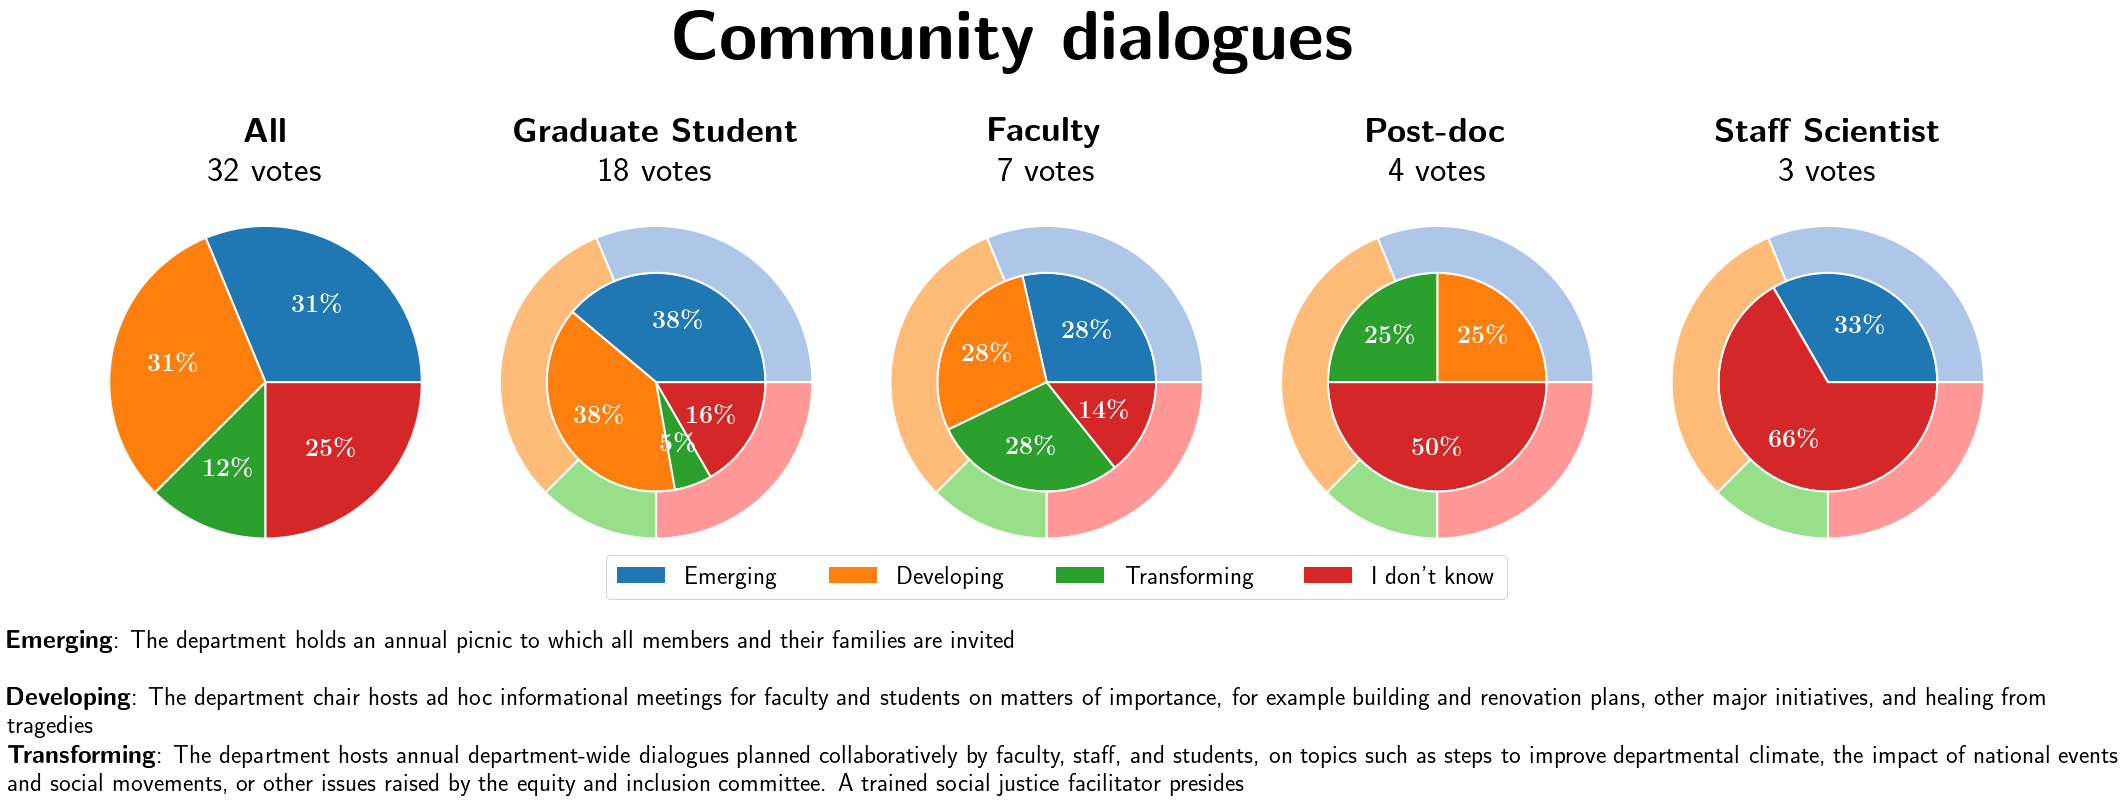

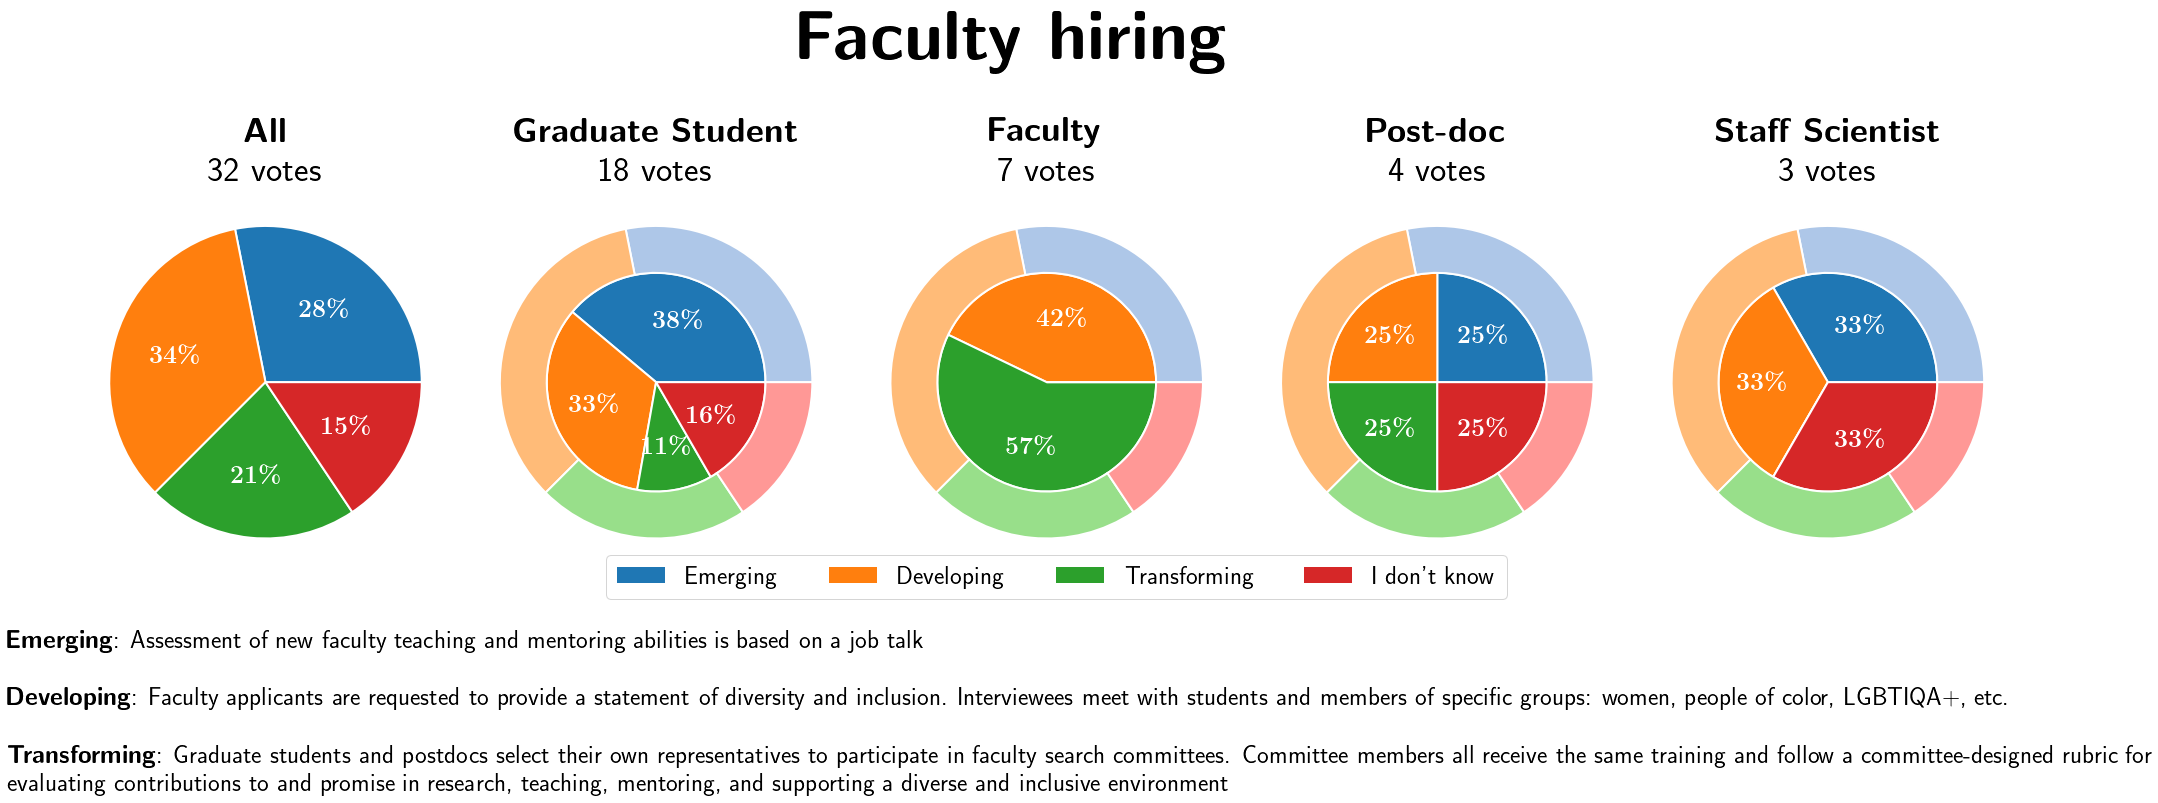

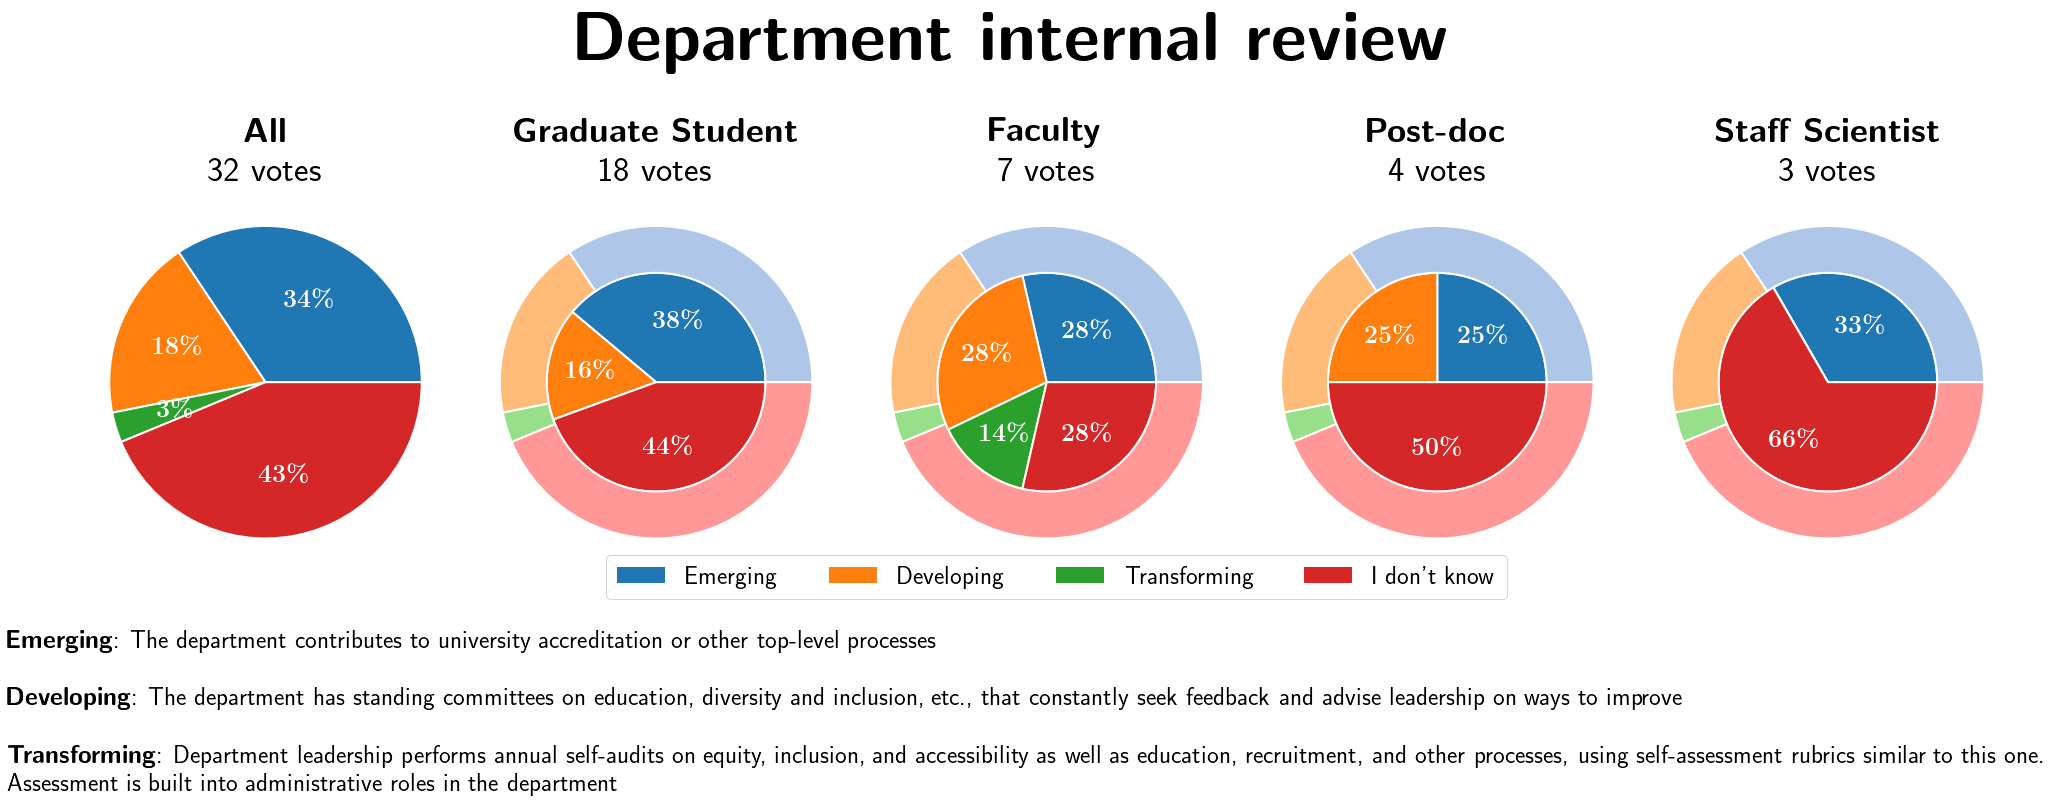

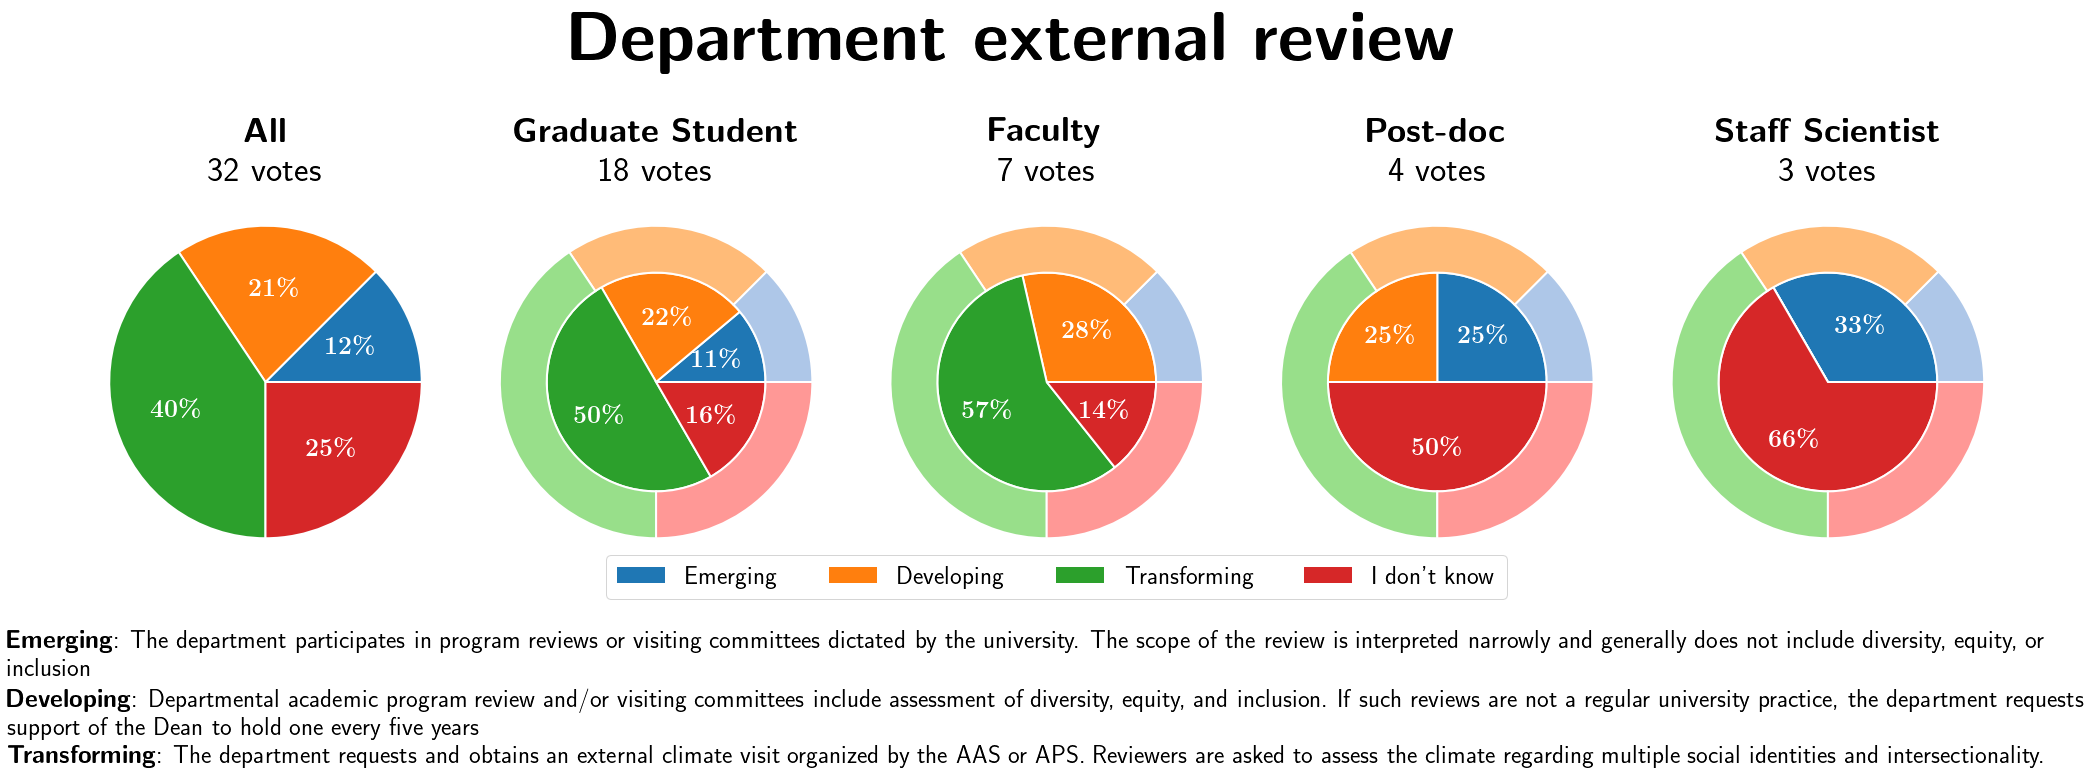

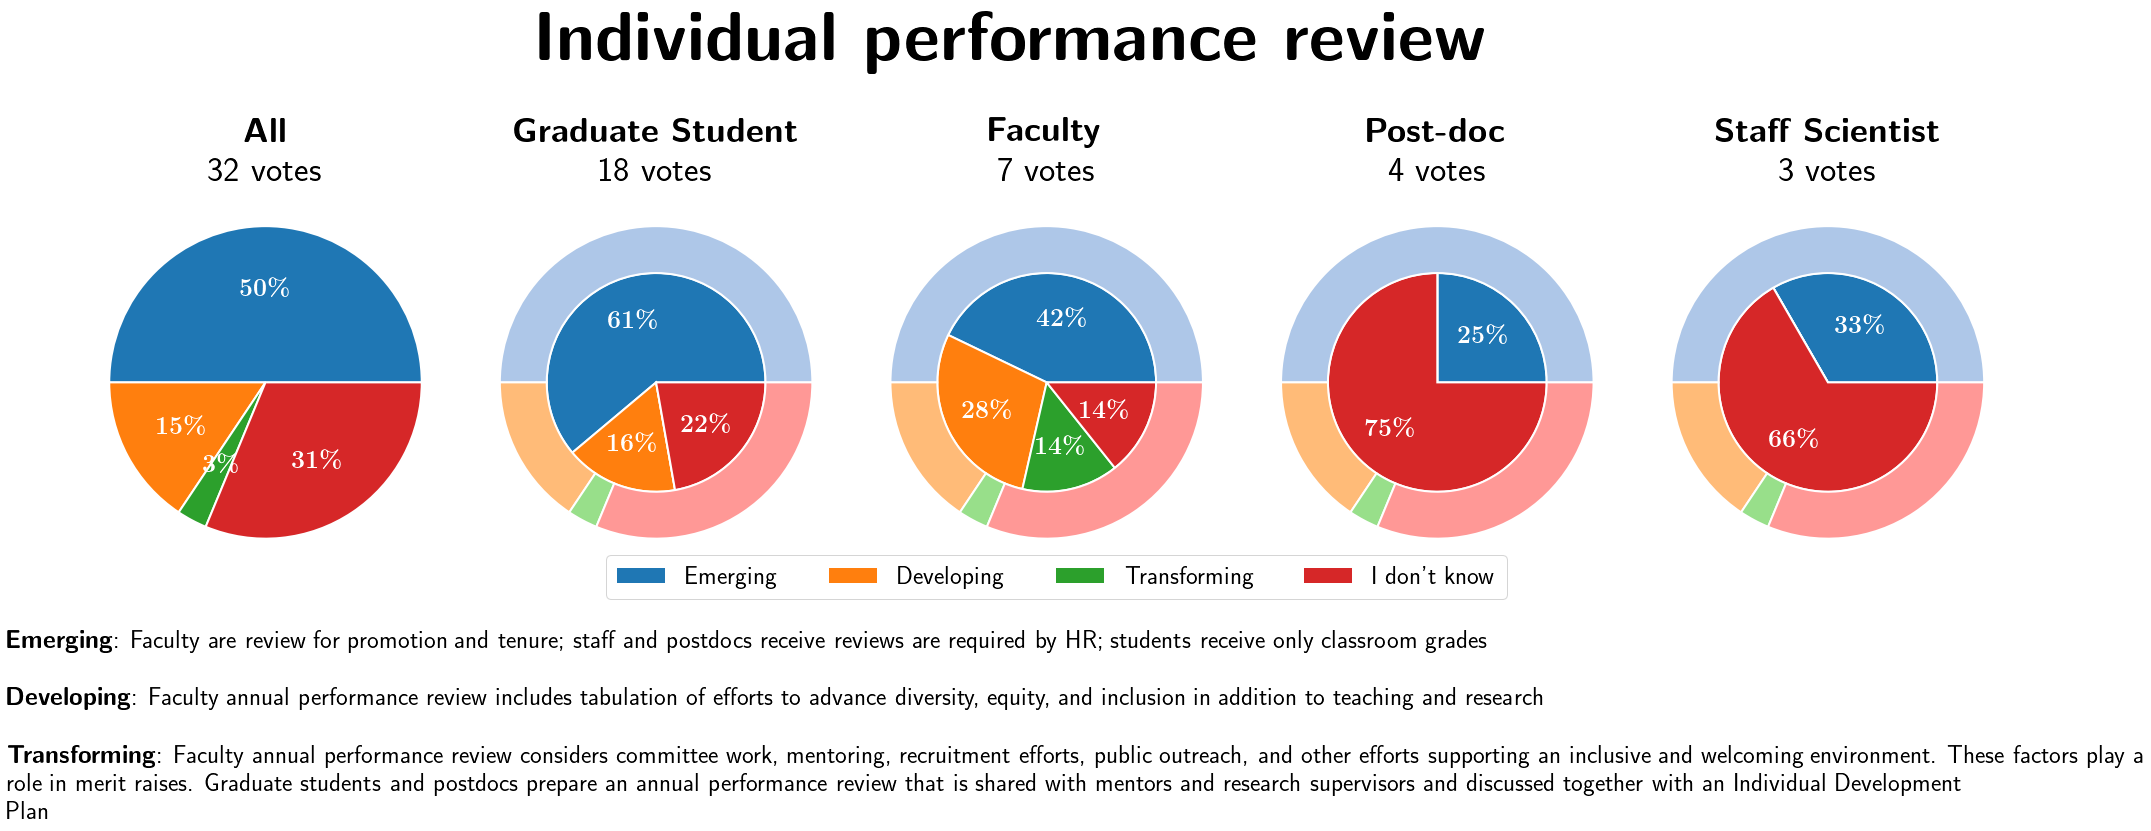

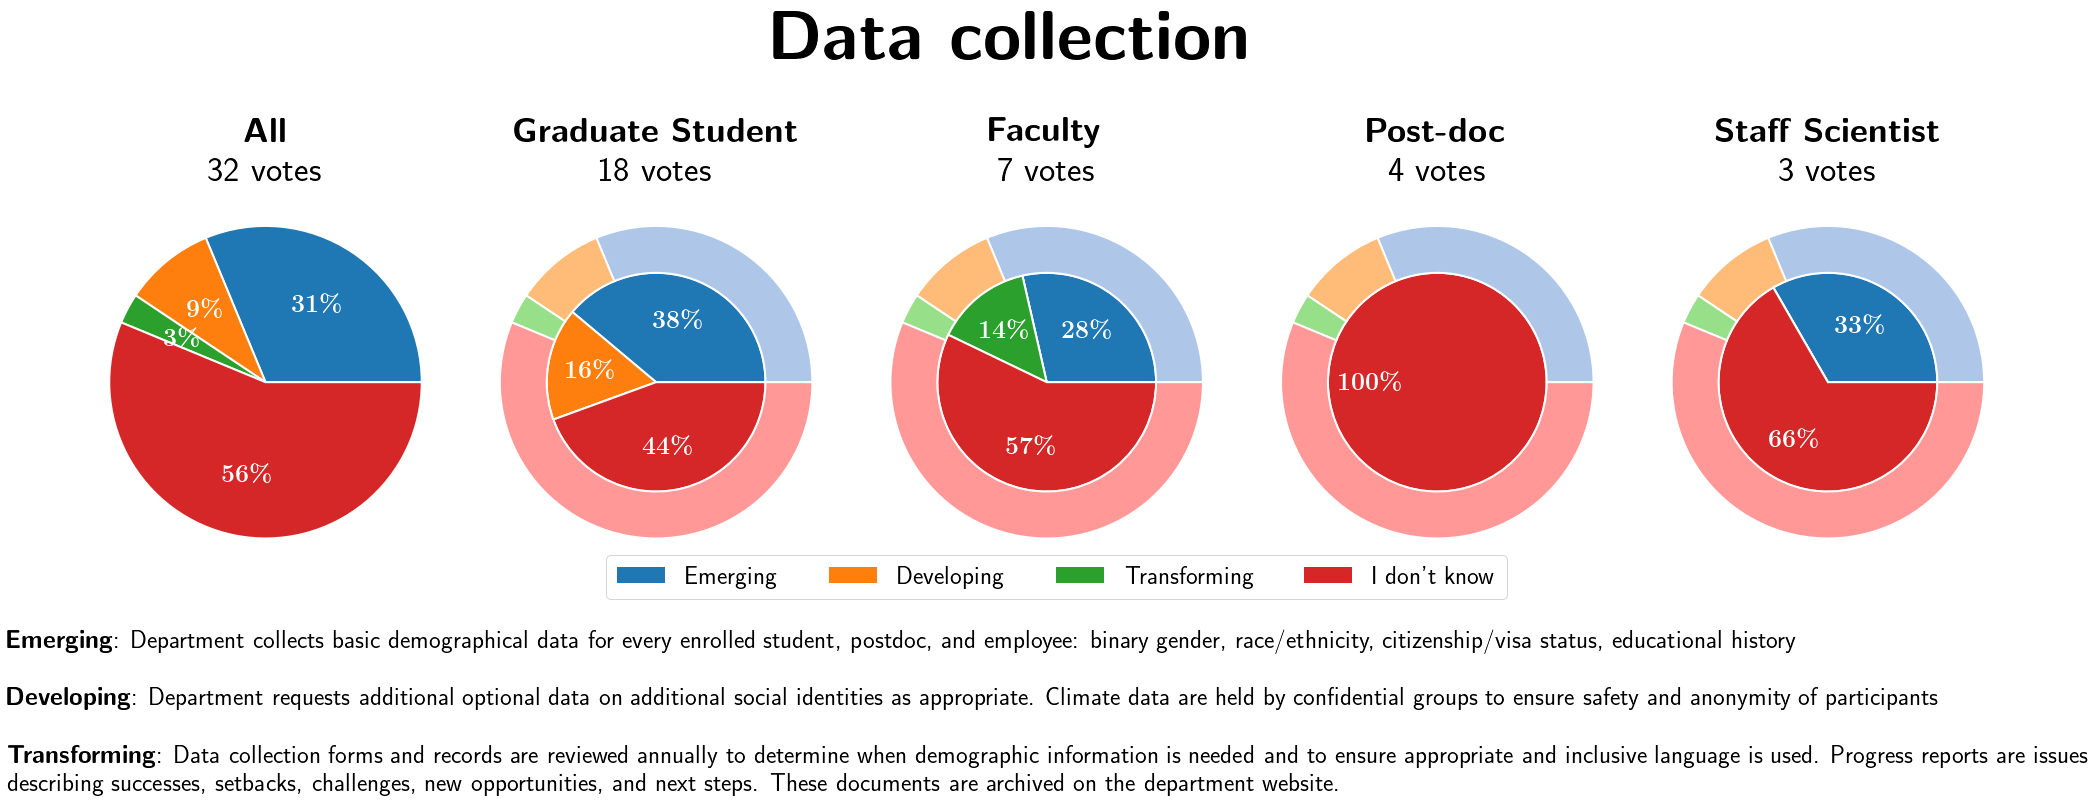

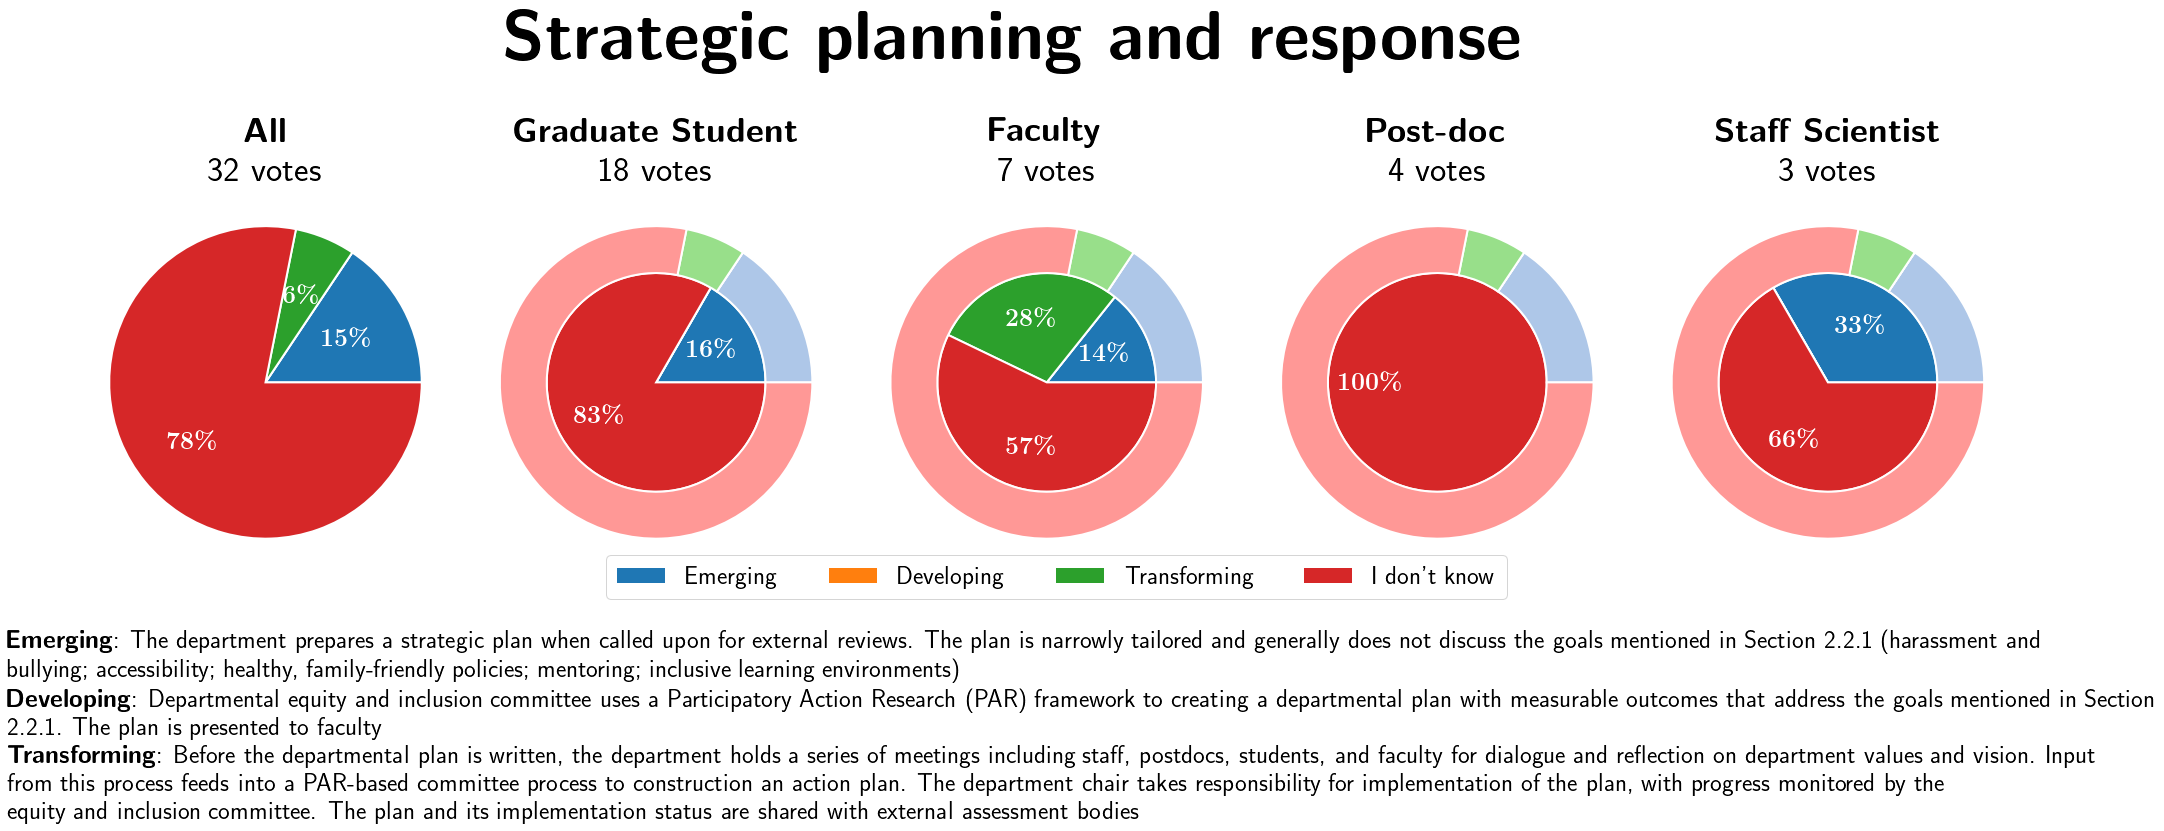

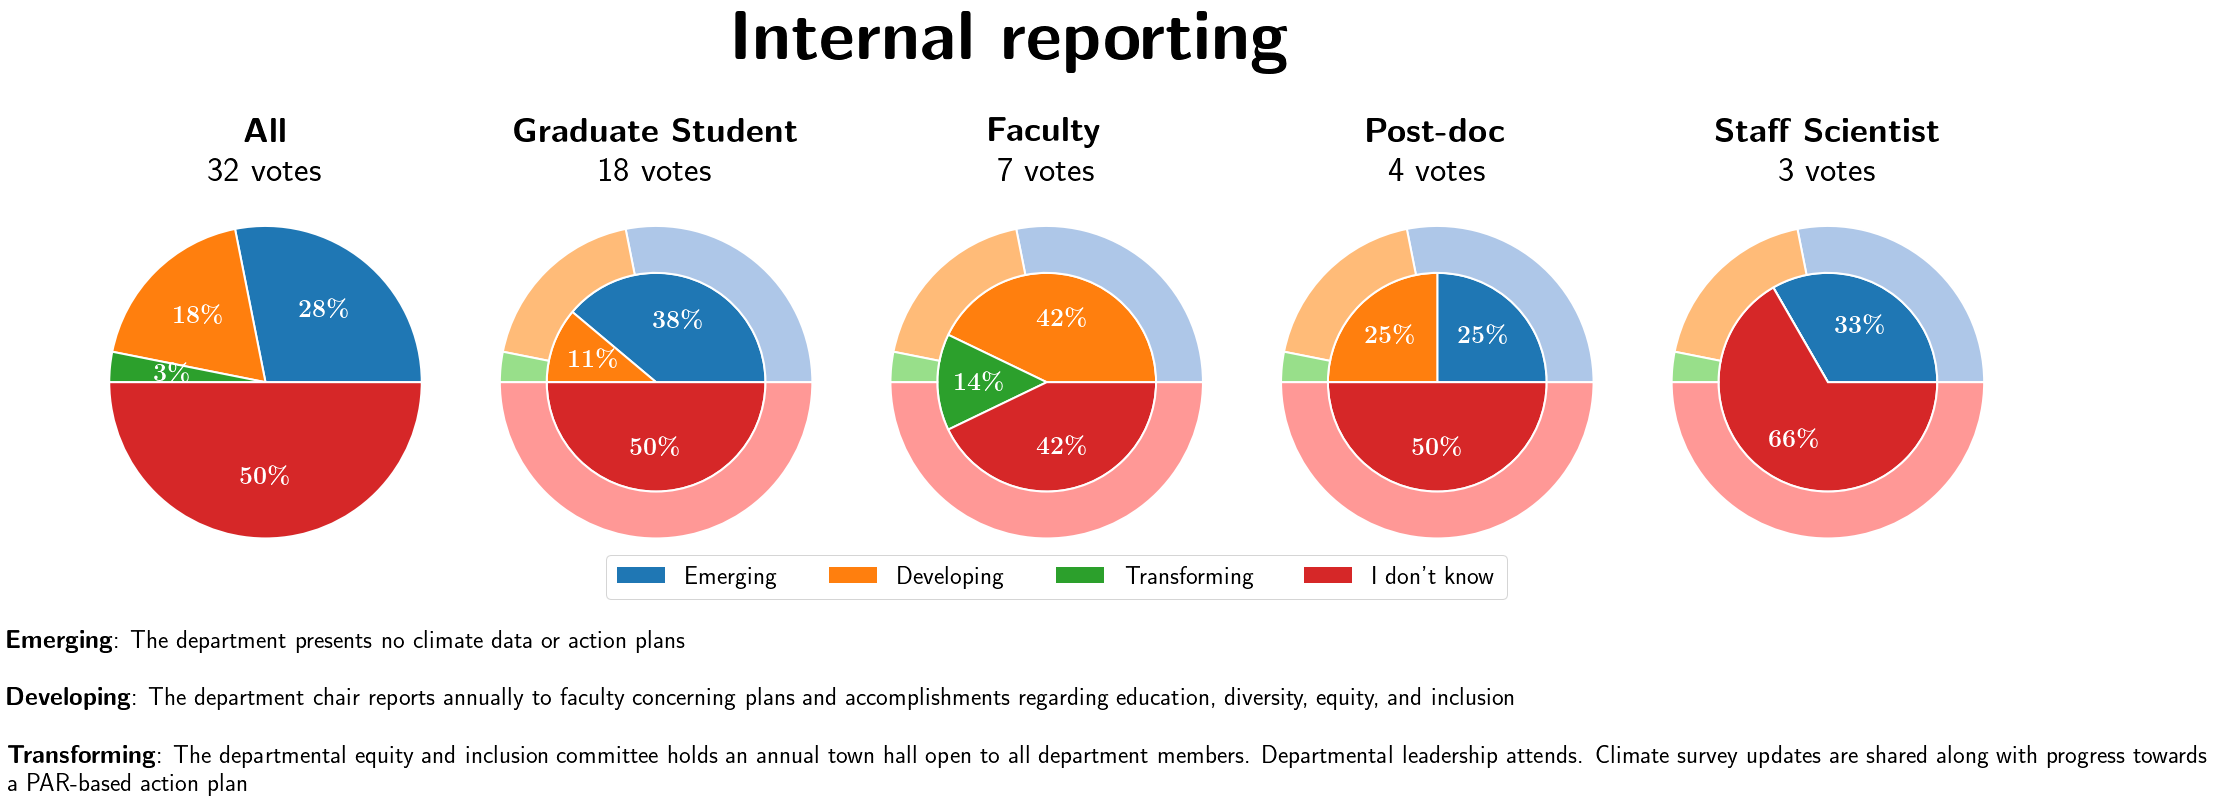

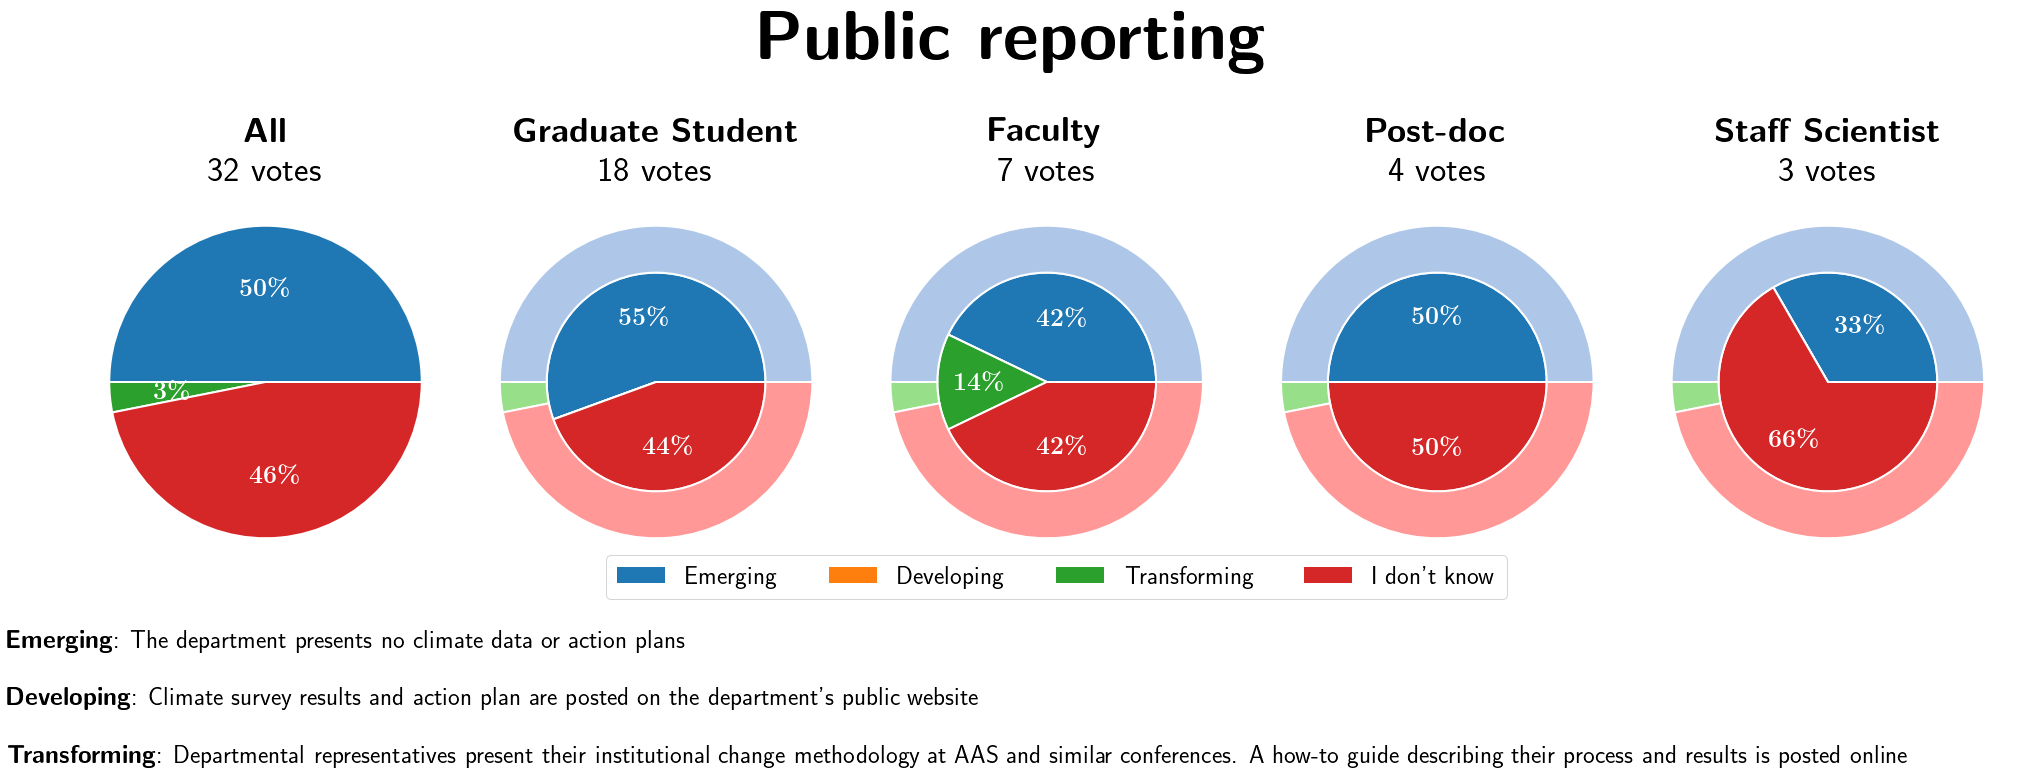

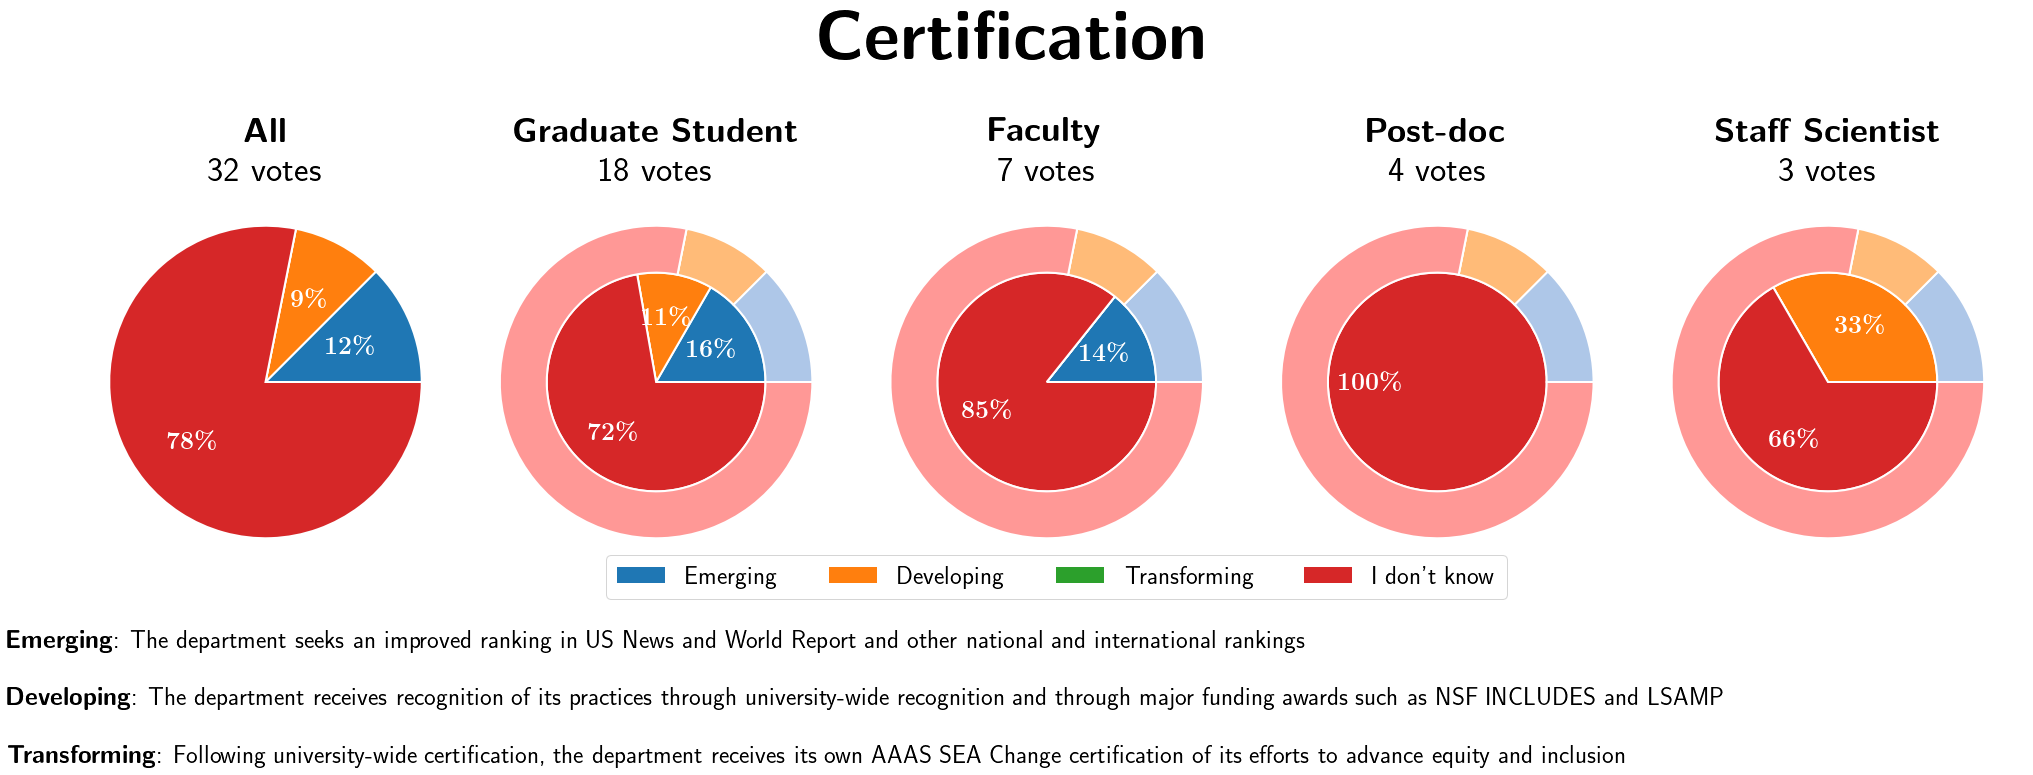

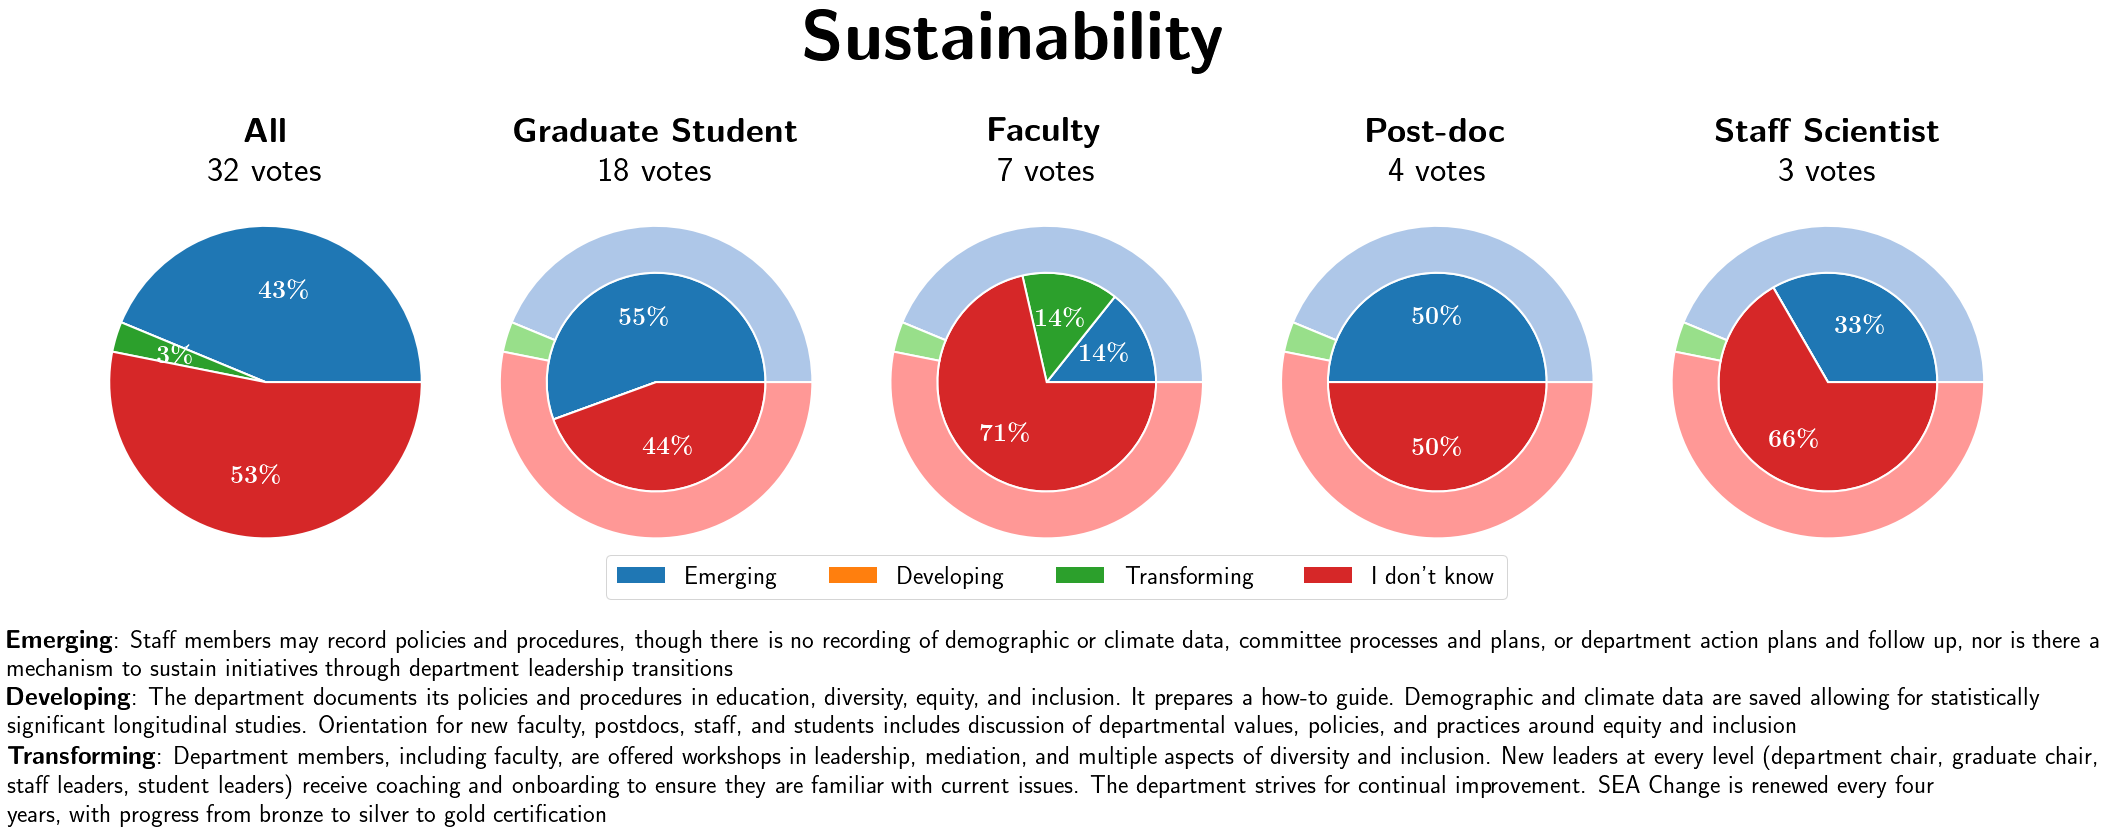

In [138]:
for question in questions:
# for question in[ 'Strategic planning and response']:
#     print(question)
    fig, axes = plt.subplots(1,5, figsize=[35,10], gridspec_kw=dict(wspace=0))
    plt.gcf().text(0.5,0.95, r"\textbf{"+question+'}', fontsize=70, horizontalalignment='center')

    for ax, label in zip(axes,['All', 'Graduate Student', 'Faculty', 'Post-doc', 'Staff Scientist']):

        if label == 'All':
            df_group = df
            df_values_all = dataframe_values(df_group)[question]

            df_values_all = labels_in_order(df_values_all)
            
            ax.pie(df_values_all.values(), autopct=lambda pct: func(pct, df_values_all.values()),
                radius=1, colors=inner_colors,
                wedgeprops=dict(edgecolor='w', linewidth=2),  textprops=dict(color="w", fontsize=25))
            ax.set(aspect="equal")
            ax.set_title(r"\textbf{"+label+'}'+'\n{0} votes'.format(sum(df_values_all.values())), fontsize=35, fontweight='bold')

        else:
            df_group = df.loc[label]

            df_group_values = dataframe_values(df_group)[question]
            df_group_values = labels_in_order(df_group_values)

            ax.pie(df_group_values.values(), autopct=lambda pct: func(pct, df_group_values.values()),
                radius=1-size, colors=inner_colors,
                wedgeprops=dict(edgecolor='w', linewidth=2), textprops=dict(color="w", fontsize=25))
            ax.pie(df_values_all.values(), radius=1, colors=outer_colors,
                   wedgeprops=dict(width=size, edgecolor='w', linewidth=2))
            ax.set(aspect="equal")
            ax.set_title(r"\textbf{"+label+'}'+' \n{0} votes'.format(sum(df_group_values.values())), fontsize=35, fontweight='bold')



    plt.legend(labels = ['Emerging', 'Developing', 'Transforming', "I don't know"], ncol=4,
                  bbox_to_anchor=(0.7, 0.28), bbox_transform=plt.gcf().transFigure, fontsize=25)
    # fig.tight_layout()
    
    ans =  answers[question]
    plt.gcf().text(0.1,0.16, r"\textbf{Emerging}"+": {0}".format(fill(ans['Emerging'],200)), fontsize=25,
                   horizontalalignment='left', verticalalignment='top', wrap=True)
    plt.gcf().text(0.1,0.08, r"\textbf{Developing}"+": {0}".format(fill(ans['Developing'],200)), fontsize=25,
                   horizontalalignment='left', verticalalignment='top', wrap=True)
    plt.gcf().text(0.1,0.0, r"\textbf{Transforming}"+": {0}".format(fill(ans['Transforming'],200)), fontsize=25,
                   horizontalalignment='left', verticalalignment='top', wrap=True)


    plt.savefig('plots/{0}.png'.format(question), bbox_inches='tight')

    plt.show()

    

# get totals for each section 

In [139]:
sections = ['Recruiting and Admissions', 'Mentoring', 'Doctoral Program and Process', 'Departmental Climate',
           'Assessment', 'Accountability']
question_indices = [0, 5, 11, 16, 21, 25,31]

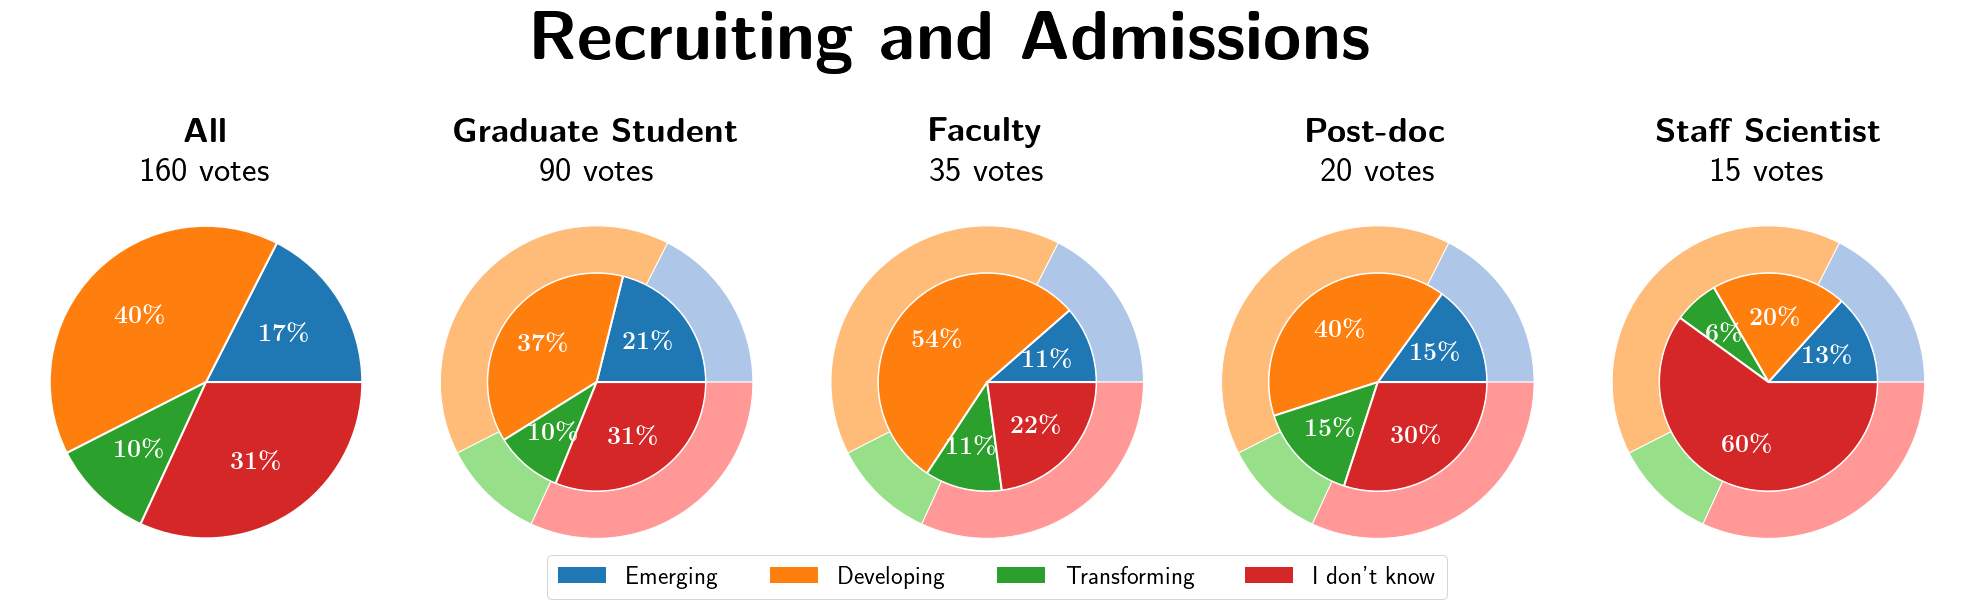

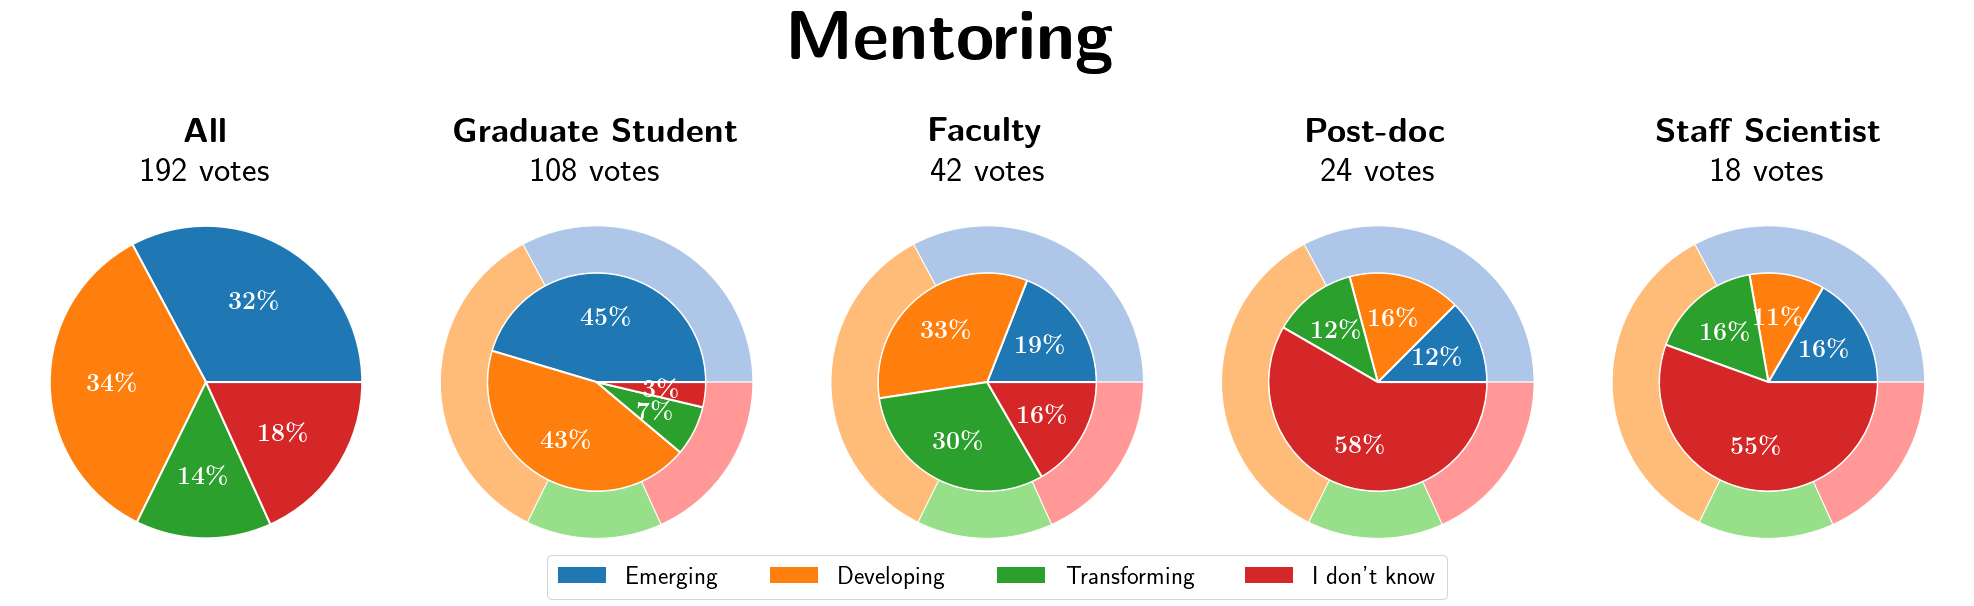

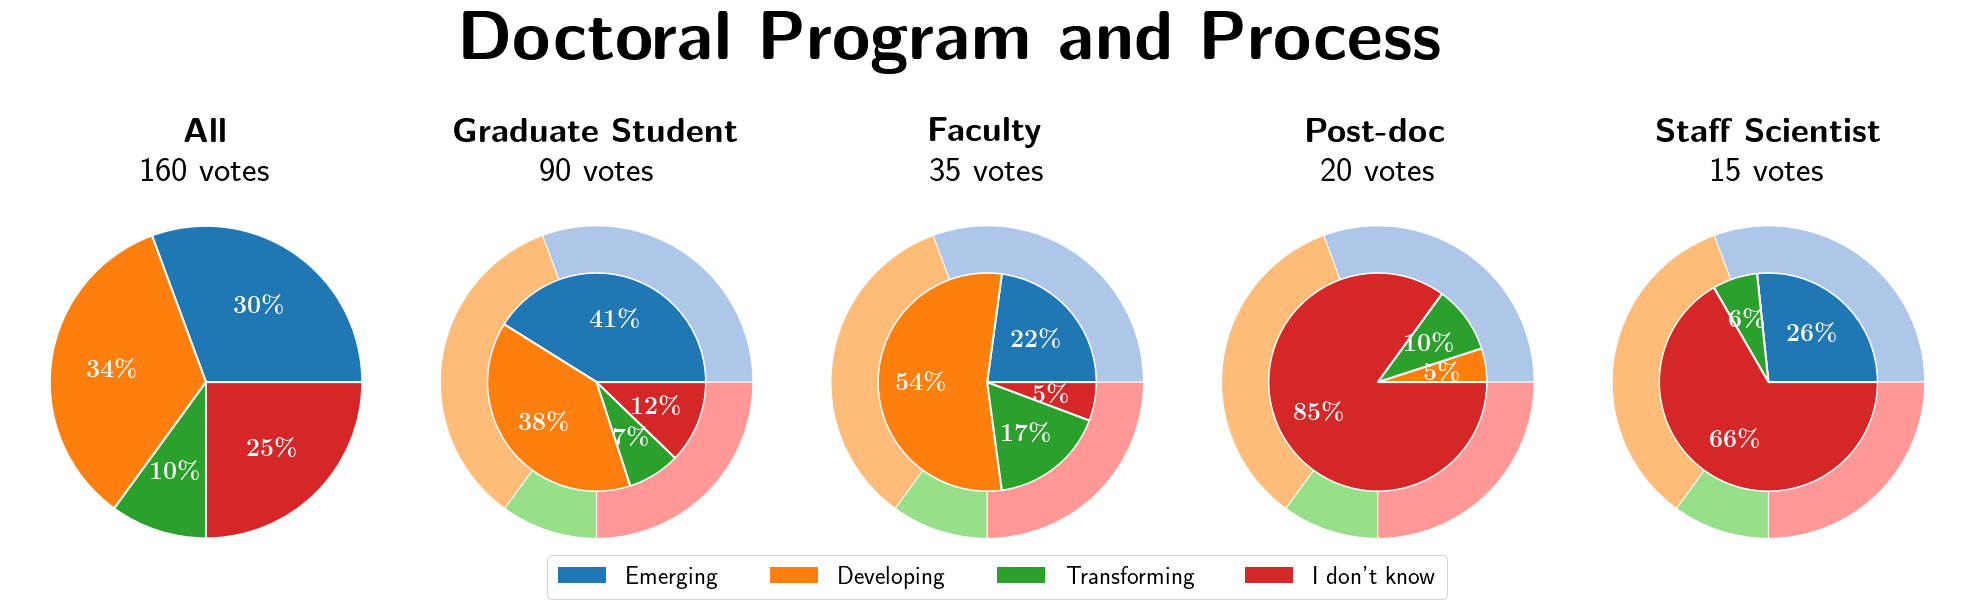

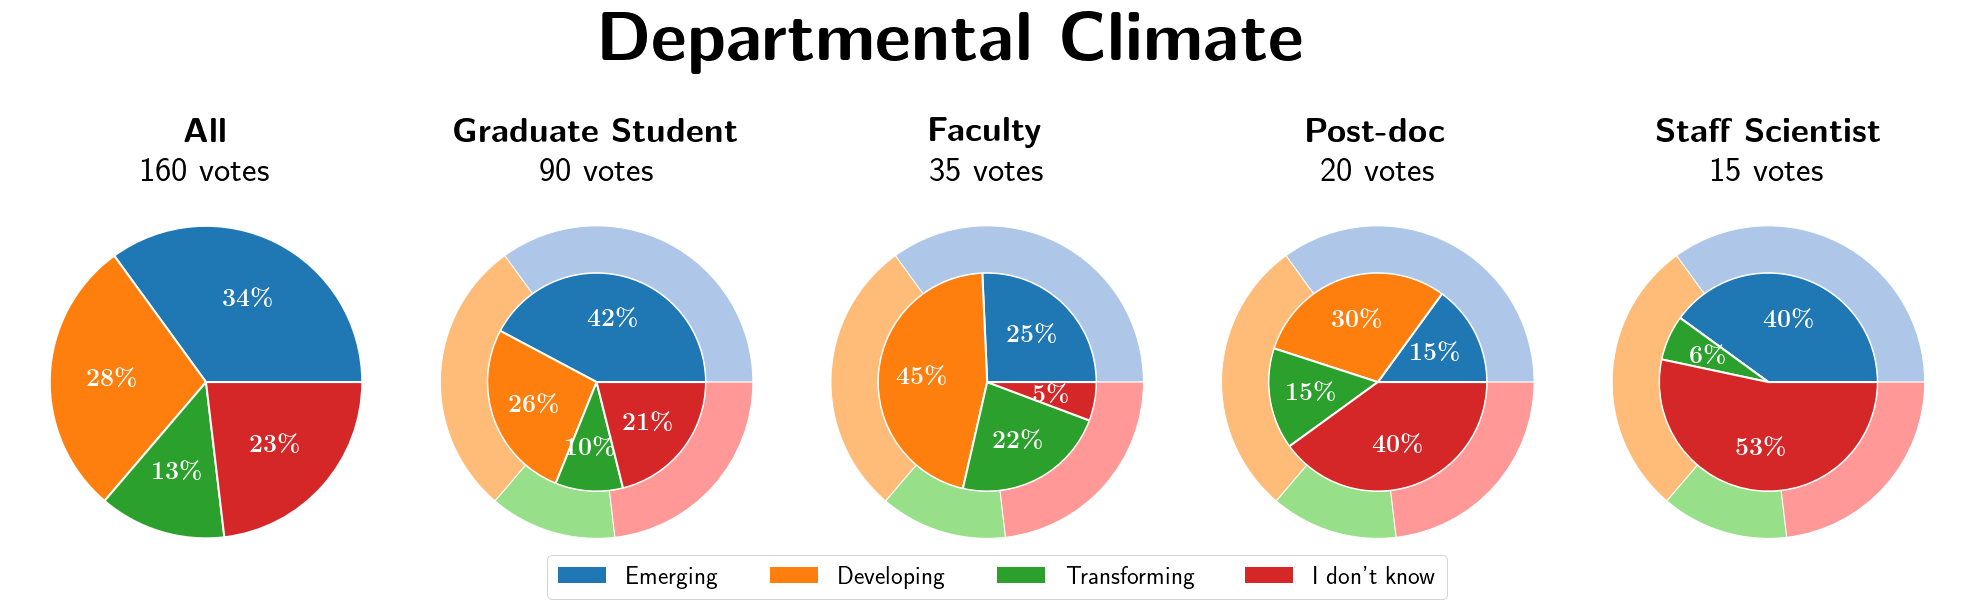

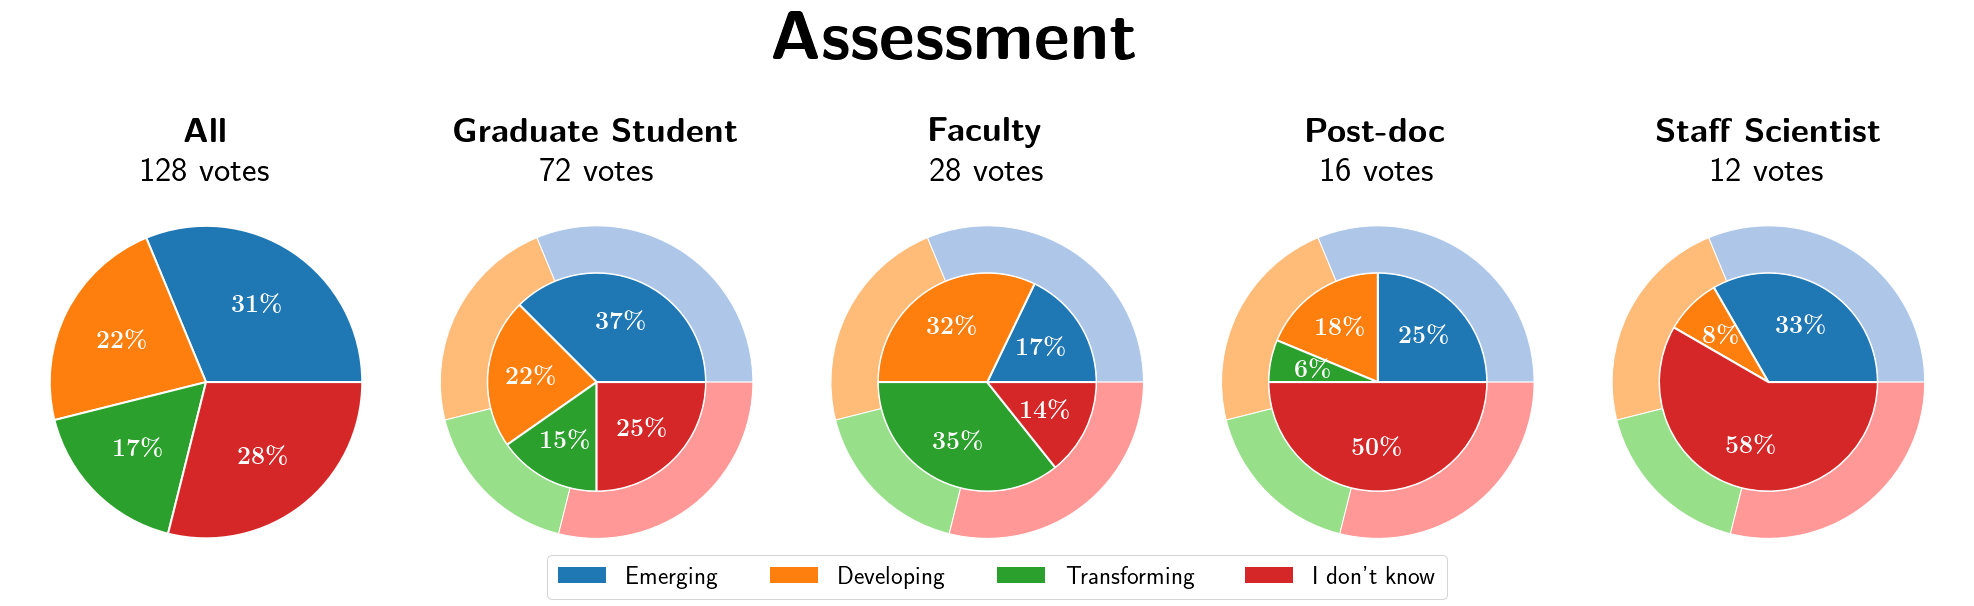

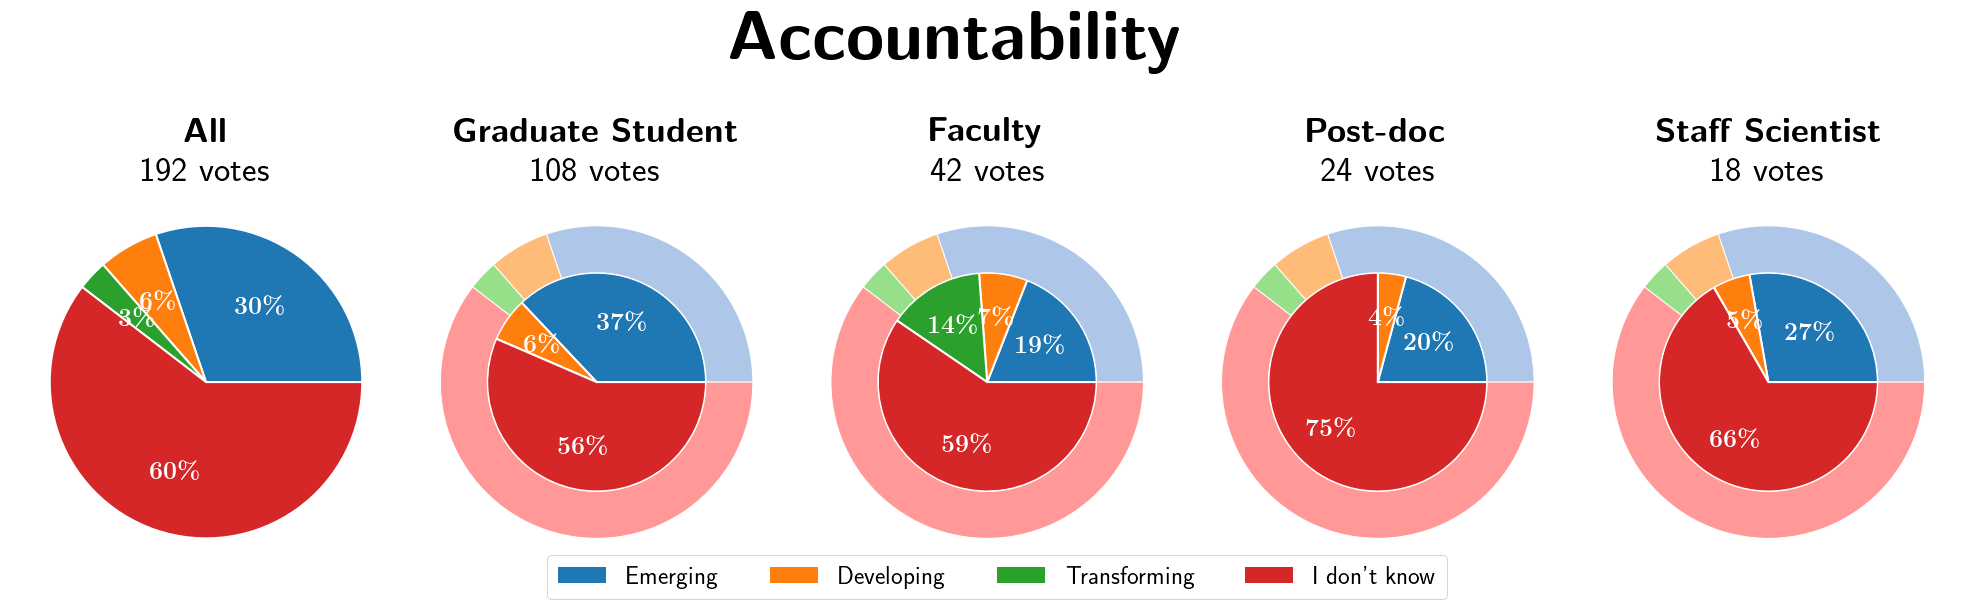

In [142]:
for i,section in enumerate(sections):

    start, stop =question_indices[i], question_indices[i+1]
    
    fig, axes = plt.subplots(1,5, figsize=[35,10], gridspec_kw=dict(wspace=0))
    plt.gcf().text(0.5,0.95, r"\textbf{"+section+'}', fontsize=70, horizontalalignment='center')

    for ax, label in zip(axes,['All', 'Graduate Student', 'Faculty', 'Post-doc', 'Staff Scientist']):

        if label == 'All':
            df_group = df
            counters = [Counter(dataframe_values(df_group)[questions[j]]) for j in np.arange(start, stop)]
            df_values_all = sum(counters, Counter()) #summed counters
            
            df_values_all = labels_in_order(df_values_all)

            ax.pie(df_values_all.values(), autopct=lambda pct: func(pct, df_values_all.values()),
                radius=1, colors=inner_colors,
                wedgeprops=dict(edgecolor='w', linewidth=2),  textprops=dict(color="w", fontsize=25))
            ax.set(aspect="equal")
            ax.set_title(r"\textbf{"+label+'}'+'\n{0} votes'.format(sum(df_values_all.values())), fontsize=35, fontweight='bold')

        else:
            df_group = df.loc[label]
            counters = [Counter(dataframe_values(df_group)[questions[j]]) for j in np.arange(start, stop)]
            df_group_values = sum(counters, Counter())
            
            df_group_values = labels_in_order(df_group_values)

            ax.pie(df_group_values.values(), autopct=lambda pct: func(pct, df_group_values.values()),
                radius=1-size, colors=inner_colors,
                wedgeprops=dict(edgecolor='w', linewidth=2), textprops=dict(color="w", fontsize=25))
            ax.pie(df_values_all.values(), radius=1, colors=outer_colors,
                   wedgeprops=dict(width=size, edgecolor='w'))
            ax.set(aspect="equal")
            ax.set_title(r"\textbf{"+label+'}'+'\n{0} votes'.format(sum(df_group_values.values())), fontsize=35, fontweight='bold')



    plt.legend(labels = ['Emerging', 'Developing', 'Transforming', "I don't know"], ncol=4,
                  bbox_to_anchor=(0.7, 0.28), bbox_transform=plt.gcf().transFigure, fontsize=25)
    # fig.tight_layout()

    plt.savefig('plots/{0}.png'.format(section), bbox_inches='tight')

    plt.show()
                        
                      

## get totals for all 

Counter({"I don't know": 316, 'Emerging': 294, 'Developing': 273, 'Transforming': 109})


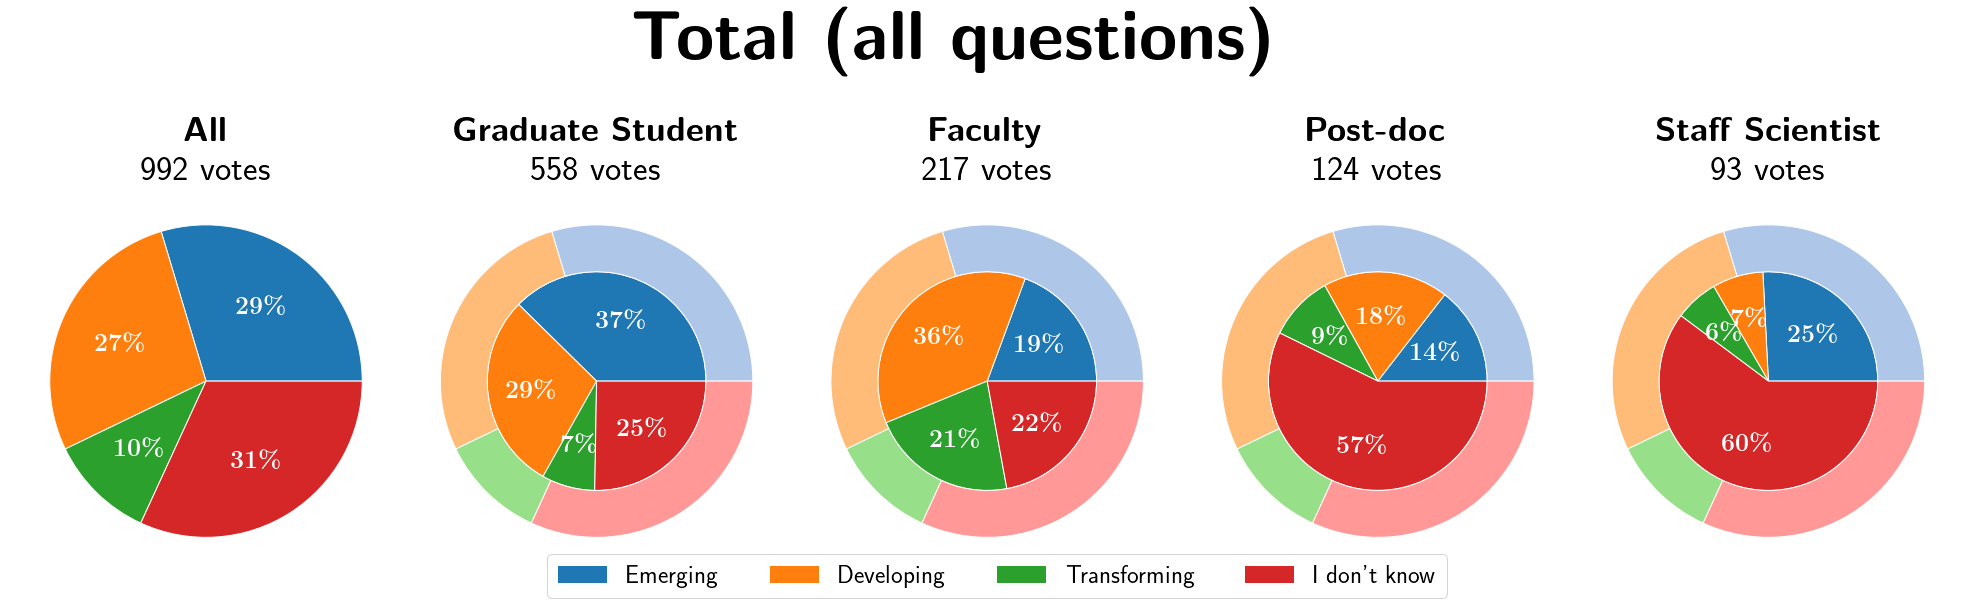

In [144]:
section = 'grand_total'

start, stop =question_indices[0], question_indices[-1]



fig, axes = plt.subplots(1,5, figsize=[35,10], gridspec_kw=dict(wspace=0))
plt.gcf().text(0.5,0.95, r"\textbf{Total (all questions)}", fontsize=70, horizontalalignment='center')

for ax, label in zip(axes,['All', 'Graduate Student', 'Faculty', 'Post-doc', 'Staff Scientist']):

    if label == 'All':
        df_group = df
        counters = [Counter(dataframe_values(df_group)[questions[j]]) for j in np.arange(start, stop)]
        df_values_all = sum(counters, Counter()) #summed counters
        print(df_values_all)
        df_values_all = labels_in_order(df_values_all)

        ax.pie(df_values_all.values(), autopct=lambda pct: func(pct, df_values_all.values()),
            radius=1, colors=inner_colors,
            wedgeprops=dict(edgecolor='w'),  textprops=dict(color="w", fontsize=25))
        ax.set(aspect="equal")
        ax.set_title(r"\textbf{"+label+'}'+'\n{0} votes'.format(sum(df_values_all.values())), fontsize=35, fontweight='bold')

    else:
        df_group = df.loc[label]
        counters = [Counter(dataframe_values(df_group)[questions[j]]) for j in np.arange(start, stop)]
        df_group_values = sum(counters, Counter())

        df_group_values = labels_in_order(df_group_values)

        ax.pie(df_group_values.values(), autopct=lambda pct: func(pct, df_group_values.values()),
            radius=1-size, colors=inner_colors,
            wedgeprops=dict(edgecolor='w'), textprops=dict(color="w", fontsize=25))
        ax.pie(df_values_all.values(), radius=1, colors=outer_colors,
               wedgeprops=dict(width=size, edgecolor='w'))
        ax.set(aspect="equal")
        ax.set_title(r"\textbf{"+label+'}'+'\n{0} votes'.format(sum(df_group_values.values())), fontsize=35, fontweight='bold')



plt.legend(labels = ['Emerging', 'Developing', 'Transforming', "I don't know"], ncol=4,
              bbox_to_anchor=(0.7, 0.28), bbox_transform=plt.gcf().transFigure, fontsize=25)
# fig.tight_layout()

plt.savefig('plots/{0}.png'.format(section), bbox_inches='tight')

plt.show()

                      

In [43]:
answers = {
"Recruiting members of underrepresented groups" :{
"Emerging": "Departmental website encourages women and underrepresented minorities apply",
"Developing": "Department members attend conferences like CUWiP, OSTEM, SACNAS, and NSBP",
"Transforming": "Department hosts or participates in a Bridge program, student affinity groups present at conferences. Department partners with HSI/MSI/HBCUs"
} ,
 
"Non-cognitive assessment" :{
"Emerging": "Faculty recognize the importance of motivation and perseverance",
"Developing": "Department interviews women and minorities, but leaves it up to individual faculty how they assess and report",
"Transforming": "Interviewers are trained in non-cognitive assessment and use a rubric. Promising candidates are invited to visit and form relationships before applying"
},
 
"Use of GRE":
{"Emerging": "General and Physics GRE are used with cutoffs for admission",
"Developing": "Physics GRE is optional, and committee members are aware of its effect in suppressing women and minorities",
"Transforming": "Department has studied predictive ability of GRE in the past and no longer uses it in its admissions decisions"
},
 
"Letters of recommendation":
{"Emerging": "Department takes letters at face value, especially those from faculty of highly ranked departments.",
"Developing": "Letter writers are requested to address specific issues pertaining to student preparation for graduate school; committee members recognize that bias exists",
"Transforming": "Admissions committee members use a rubric to evaluate recommendations fairly. They are aware of gendered language"
},
 
"Unconscious bias":
{"Emerging": "Evaluators are assumed to be objective",
"Developing": "Admissions committee members have attended a bias workshop",
"Transforming": "Committee members use an assessment rubric, a committee member is delegated to advocate for each member of an underrepresented group, and selection criteria are discussed in advance"
},
 
"Assignment":
{"Emerging": "Graduate students have no mentor besides their research advisor",
"Developing": "Faculty, postdocs, senior graduate students, new graduate students, and undergraduate students participate in a mentoring ladder",
"Transforming": "Mentoring committees are assigned to every graduate student, taking into account the student's background and social identities. The committee meets with the students at least three times per year"
},
 
"Guidelines and training":
{"Emerging": "No materials or workshops are provided. Mentors may attend workshops at their professional society",
"Developing": "Mentors are informed of materials or provided opportunities for training such as those provided by NRMN or CIMER",
"Transforming": "Both mentors and mentees take training aimed at optimizing their relationship(s) and discuss mentoring guidelines together. This may include a mentoring compact"
},
 
"Evaluation and feedback":
{"Emerging": "Research advisors give students feedback on writing and, when requested, on research performance",
"Developing": "Mentees fill out an annual review form including specific aspects of mentoring , which is read by the mentor and discussed together",
"Transforming": "Mentors help mentees develop an Individual Development Plan that helps students identify their goals and track progress and helps the mentor identify needs of their mentee(s). Mentees value feedback through a trusting relationship"},
 
"Students with marginalized identities":
{"Emerging": "The department has a culture to 'treat everyone the same' with the belief that everyone's struggles are equal",
"Developing": "The department recognizes that inclusion and equity are not the same. The department may host affinity groups for women and students of color, who support each other",
"Transforming": "The department has faculty and other mentors of color and from other marginalized groups. All faculty are committed to establishing a caring environment where all students can thrive. The department connects marginalized groups with external support networks"
},
 
"Professional development":
{"Emerging": "Students are expected to learn on their own or by engaging in opportunities 'on their own time'. Opportunities are not offered by the department.",
"Developing": "The research advisor provides opportunities for and feedback on giving research and public talks, writing proposals, and peer review, and supports engagement in professional development.",
"Transforming": "The department or partner on-campus offices offers professional development in many areas, including non-academic careers. Students are encouraged to consider multiple career options. Faculty recognize that success comes in many forms."
},
 
"Mentoring networks":
{"Emerging": "Students can seek advice from postdocs or senior graduate students in their research group",
"Developing": "Students from marginalized groups participate in peer/near peer support networks across STEM departments",
"Transforming": "Students and faculty participate in local chapters and national meetings of CUWiP/OSTEM/SACNAS/NSBP as well as other networks such as MentorNet"
},
 
"Financial support":
{"Emerging": "Students are responsible for finding a research advisor with funding",
"Developing": "The department provides a guarantee of transitional support for one or two semesters if a student changes research group",
"Transforming": "The department provides a guarantee of financial support for at least five years and states in advance how much of that comes from TA support. The department helps students apply for external fellowships"
},
 
"Teaching experience":
{"Emerging": "Students may or may not get TA experience and they receive little or no training for it",
"Developing": "All students receive a year of TA following a teaching workshop.",
"Transforming": "Students have the option to participate in a teaching practicum and to give public outreach talks. Such activities are valued as part of professional development"
},
 
"Fostering equitable teaching practice":
{"Emerging": "The department culture presumes that students learn mainly on their own, and that they must 'tough it out' because graduate school is difficult",
"Developing": "Faculty receive training in inclusive pedagogy and strive to create welcoming classrooms. They are aware of impostor syndrome, stereotype threat, social dynamics, and differential participation of privileged and marginalized groups",
"Transforming": "The department hosts colloquia and workshops on inclusive practices to facilitate implementation of evidence-based classroom techniques and has examined its qualifying exam and evaluation procedures to ensure that all students can thrive. All classroom environments meet or exceed ADA compliance"
},
 
"Conference participation":
{"Emerging": "Students attend conference when suggested and supported by their research advisor",
"Developing": "Research groups regularly attend conferences, all members prepare and practice giving talks, and they debrief afterwards",
"Transforming": "The department has funds set aside to support student travel when their supervisor lacks funding or the travel supports department activities such as recruiting"
},
 
"Family-friendly policies":
{"Emerging": "The department culture values long working hours. Graduate students are expected to work evenings and weekends.",
"Developing": "The department recognizes the demands of childbirth and child-rearing, eldercare, and other major personal commitments",
"Transforming": "Department culture supports flexible work schedules. When events are necessary during evenings or weekends, childcare is provided or subsidized for parents. All department members, including graduate students, receive paid maternity/paternity leave for childbirth or adoption, eldercare, or personal medical or other serious needs"},
 
"Communications":
{"Emerging": "Department website provides information on policies and procedures and points to university-wide resources. Departmental communications use minimal language around equity and inclusion",
"Developing": "Department chair communicates the importance of equity and inclusions in person and in writing shared with all department members. The department website provides details on family-friendly policies, mentorship, inclusive teaching, and responding to harassment and bullying",
"Transforming": "The department has adopted a values statement and a code of conduct. The department chair advises other departments on how to improve the climate for all people. The department chair periodically hosts colloquia on topics related to diversity, equity, and inclusion in academia"
},
 
"Training":
{"Emerging": "Department members participated in mandatory university trainings on lab safety, Title IX, etc.",
"Developing": "New faculty receive training on teaching, mentoring, and on university resources to support the success of all people. Faculty search committee members receive training on implicit bias and best practices for inclusive searches",
"Transforming": "Department chairs receive training on diversity, equity, and inclusion, and on mediation and conflict management. They receive regular coaching. The department hosts training for all members on topics such as 'being an ally', responding to microaggressions and harassment, and inclusive teaching practices. The majority of faculty attend these trainings."
},
 
"Ending workplace harassment and bullying":
{"Emerging": "The department refers complainants to HR",
"Developing": "The department chair communicates university policies aimed at ending harassment and bullying and offering multiple reporting options. University ombuds are engaged with the department. Faculty are knowledgeable about mandatory reporting requirements",
"Transforming": "Sexual harassment claims are promptly reported to university authorities. The department chair actively engages faculty accused of bullying recognizing the large power imbalance present in many situations. Outside help is utilized when needed, including climate site visits and use of mental health experts. The department has faculty, staff, postdoc, and student advocates identified to support a harassment-free environment"
},
 
"Creating welcoming environments":
{"Emerging": "Department website includes a letter of welcome by the Chair, but no specific welcome to members of marginalized groups",
"Developing": "The department has an equity and inclusion committee that meets monthly and includes members of multiple roles and social identities. The committee advises the department chair",
"Transforming": "The department hosts conferences like CUWiP and hosts a Bridge Program. The chair convenes a monthly equity and inclusion luncheon open to everyone in the department. Community members are nominated for and receive university and national awards for their work advancing equity and inclusion. The department utilizes climate surveys and input from student groups to identify and resolve concerns"
},
 
"Community dialogues":
{"Emerging": "The department holds an annual picnic to which all members and their families are invited",
"Developing": "The department chair hosts ad hoc informational meetings for faculty and students on matters of importance, for example building and renovation plans, other major initiatives, and healing from tragedies",
"Transforming": "The department hosts annual department-wide dialogues planned collaboratively by faculty, staff, and students, on topics such as steps to improve departmental climate, the impact of national events and social movements, or other issues raised by the equity and inclusion committee. A trained social justice facilitator presides"
},
 
"Faculty hiring":
{"Emerging": "Assessment of new faculty teaching and mentoring abilities is based on a job talk",
"Developing": "Faculty applicants are requested to provide a statement of diversity and inclusion. Interviewees meet with students and members of specific groups: women, people of color, LGBTIQA+, etc.",
"Transforming": "Graduate students and postdocs select their own representatives to participate in faculty search committees. Committee members all receive the same training and follow a committee-designed rubric for evaluating contributions to and promise in research, teaching, mentoring, and supporting a diverse and inclusive environment"
},
 
"Department internal review":
{"Emerging": "The department contributes to university accreditation or other top-level processes",
"Developing": "The department has standing committees on education, diversity and inclusion, etc., that constantly seek feedback and advise leadership on ways to improve",
"Transforming": "Department leadership performs annual self-audits on equity, inclusion, and accessibility as well as education, recruitment, and other processes, using self-assessment rubrics similar to this one. Assessment is built into administrative roles in the department"
},
 
"Department external review":
{"Emerging": "The department participates in program reviews or visiting committees dictated by the university. The scope of the review is interpreted narrowly and generally does not include diversity, equity, or inclusion",
"Developing": "Departmental academic program review and/or visiting committees include assessment of diversity, equity, and inclusion. If such reviews are not a regular university practice, the department requests support of the Dean to hold one every five years",
"Transforming": "The department requests and obtains an external climate visit organized by the AAS or APS. Reviewers are asked to assess the climate regarding multiple social identities and intersectionality."
},
 
"Individual performance review":
{"Emerging": "Faculty are review for promotion and tenure; staff and postdocs receive reviews are required by HR; students receive only classroom grades",
"Developing": "Faculty annual performance review includes tabulation of efforts to advance diversity, equity, and inclusion in addition to teaching and research",
"Transforming": "Faculty annual performance review considers committee work, mentoring, recruitment efforts, public outreach, and other efforts supporting an inclusive and welcoming environment. These factors play a role in merit raises. Graduate students and postdocs prepare an annual performance review that is shared with mentors and research supervisors and discussed together with an Individual Development Plan"
},

"Data collection":
{"Emerging": "Department collects basic demographical data for every enrolled student, postdoc, and employee: binary gender, race/ethnicity, citizenship/visa status, educational history",
"Developing": "Department requests additional optional data on additional social identities as appropriate. Climate data are held by confidential groups to ensure safety and anonymity of participants",
"Transforming": "Data collection forms and records are reviewed annually to determine when demographic information is needed and to ensure appropriate and inclusive language is used. Progress reports are issues describing successes, setbacks, challenges, new opportunities, and next steps. These documents are archived on the department website."
},
 
"Strategic planning and response":
{"Emerging": "The department prepares a strategic plan when called upon for external reviews. The plan is narrowly tailored and generally does not discuss the goals mentioned in Section 2.2.1 (harassment and bullying; accessibility; healthy, family-friendly policies; mentoring; inclusive learning environments)",
"Developing": "Departmental equity and inclusion committee uses a Participatory Action Research (PAR) framework to creating a departmental plan with measurable outcomes that address the goals mentioned in Section 2.2.1. The plan is presented to faculty",
"Transforming": "Before the departmental plan is written, the department holds a series of meetings including staff, postdocs, students, and faculty for dialogue and reflection on department values and vision. Input from this process feeds into a PAR-based committee process to construction an action plan. The department chair takes responsibility for implementation of the plan, with progress monitored by the equity and inclusion committee. The plan and its implementation status are shared with external assessment bodies"
},
 
"Internal reporting":
{"Emerging": "The department presents no climate data or action plans",
"Developing": "The department chair reports annually to faculty concerning plans and accomplishments regarding education, diversity, equity, and inclusion",
"Transforming": "The departmental equity and inclusion committee holds an annual town hall open to all department members. Departmental leadership attends. Climate survey updates are shared along with progress towards a PAR-based action plan"
},
 
"Public reporting":
{"Emerging": "The department presents no climate data or action plans",
"Developing": "Climate survey results and action plan are posted on the department’s public website",
"Transforming": "Departmental representatives present their institutional change methodology at AAS and similar conferences. A how-to guide describing their process and results is posted online"
},
 
"Certification":
{"Emerging": "The department seeks an improved ranking in US News and World Report and other national and international rankings",
"Developing": "The department receives recognition of its practices through university-wide recognition and through major funding awards such as NSF INCLUDES and LSAMP",
"Transforming": "Following university-wide certification, the department receives its own AAAS SEA Change certification of its efforts to advance equity and inclusion"
},
 
"Sustainability":
{"Emerging": "Staff members may record policies and procedures, though there is no recording of demographic or climate data, committee processes and plans, or department action plans and follow up, nor is there a mechanism to sustain initiatives through department leadership transitions",
"Developing": "The department documents its policies and procedures in education, diversity, equity, and inclusion. It prepares a how-to guide. Demographic and climate data are saved allowing for statistically significant longitudinal studies. Orientation for new faculty, postdocs, staff, and students includes discussion of departmental values, policies, and practices around equity and inclusion",
"Transforming": "Department members, including faculty, are offered workshops in leadership, mediation, and multiple aspects of diversity and inclusion. New leaders at every level (department chair, graduate chair, staff leaders, student leaders) receive coaching and onboarding to ensure they are familiar with current issues. The department strives for continual improvement. SEA Change is renewed every four years, with progress from bronze to silver to gold certification"
}
}
